## Group 1: Wine Quality Project

## Dataset Links:
https://archive.ics.uci.edu/dataset/186/wine+quality

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009


##Introduction

This project seeks to unravel the complex relationships between the physicochemical properties of wine and its perceived quality. Utilizing comprehensive datasets from the UCI Machine Learning Repository and Kaggle, this research focuses on red and white variants of the Portuguese "Vinho Verde" wine, catalogued from the 2009 vintage. The datasets contain detailed assessments of 1,599 red and 4,898 white wine samples, each evaluated by wine experts whose sensory ratings provide a robust basis for our analysis.

The analytical foundation of this study rests on the physicochemical and sensory data provided by these datasets. Each sample's quality was determined through the median of at least three evaluations by wine experts, with ratings ranging from 0 (very poor) to 10 (excellent). This extensive data collection encompasses various physicochemical properties, including acidity levels, sugar content, alcohol percentage, density, pH, chloride, sulfate and sulfur dioxide levels, allowing for a comprehensive exploration of their impact on wine quality.

This dataset is essential for both scientific research and educational purposes, offering a foundational framework for the application of advanced analytical methods in the fields of machine learning, data science, and statistics. The data supports a broad range of research activities, including predictive modeling, regression analysis, and complex classification tasks, aiming to uncover the quantitative relationships that influence wine quality. The objectives of this study are meticulously designed to advance our understanding of wine classification and quality prediction:

Sweetness Classification: This involves the classification of wine as either sweet or dry, based on its residual sugar levels and other correlating physicochemical properties.

Body Classification: This task classifies wines into categories of light-bodied or full-bodied, dependent on their alcohol content and its interaction with sensory attributes.

Quality Determination: The project seeks to classify wines as good or bad by predicting these categories through measurable chemical properties.

Predictive Feature Analysis: Identifying the physicochemical properties that most significantly predict wine quality, thereby providing actionable insights for viticulturists and winemakers.

This research applies rigorous data analytics to uncover scientifically valid insights into what often appears to be a subjective appreciation of wine. By constructing predictive models and detailed analyses, this study aims to contribute valuable knowledge to the fields of oenology and wine production, benefiting academic researchers, industry practitioners, and enthusiasts alike.

##Goals of Project:

1. Goal 1: Classify Wine by Sugar Content - Sweet or Dry

2. Goal 2: Classify Wine by Alcohol Level - Light-Bodied and Full-Bodied
    
3. Goal 3: Classify Wine by Quality - Good and Bad

4. Goal 4: Identify the best predictive features to predict quality of wine

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#nbdir = "/content/drive/MyDrive/DSCI631_Groups/Project B"
#%cd /content/drive/MyDrive/DSCI631_Groups/Project\ B/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
np.random.seed(42)
import warnings
import matplotlib as mpl
from sklearn.metrics import make_scorer, accuracy_score, classification_report, ConfusionMatrixDisplay,confusion_matrix,roc_curve,roc_auc_score,auc, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


##EDA, Pre Processing, Feature Engineering and Feature Selection

## Red Wine

In [ ]:
file_path_red = "data/winequality_red.csv"

df_red = pd.read_csv(file_path_red, sep=';')
print(df_red.head(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [ ]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#summary of statistics
print(df_red.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [ ]:
#Missing values
print(df_red.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
#Correlation Matrix
corr_matrix_red = df_red.corr()

corr_with_quality_red = corr_matrix_red["quality"].sort_values(ascending=False)
print(corr_with_quality_red)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


<Axes: >

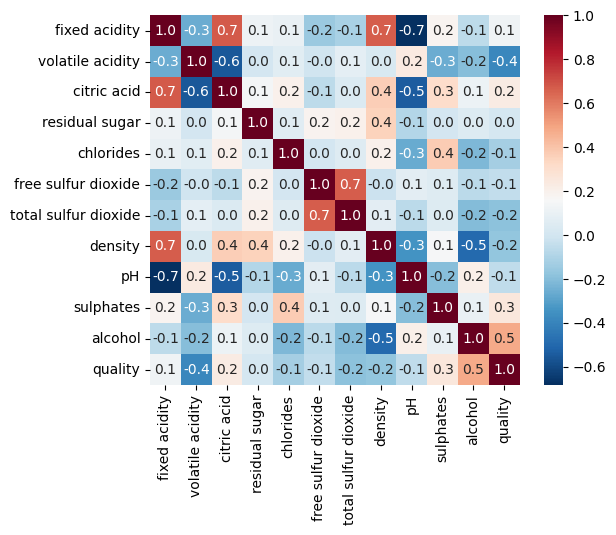

In [ ]:
#Correlation Heat Map
correlation=df_red.corr()
sns.heatmap(correlation,annot=True,cbar=True,square=True,fmt='.1f',cmap="RdBu_r")

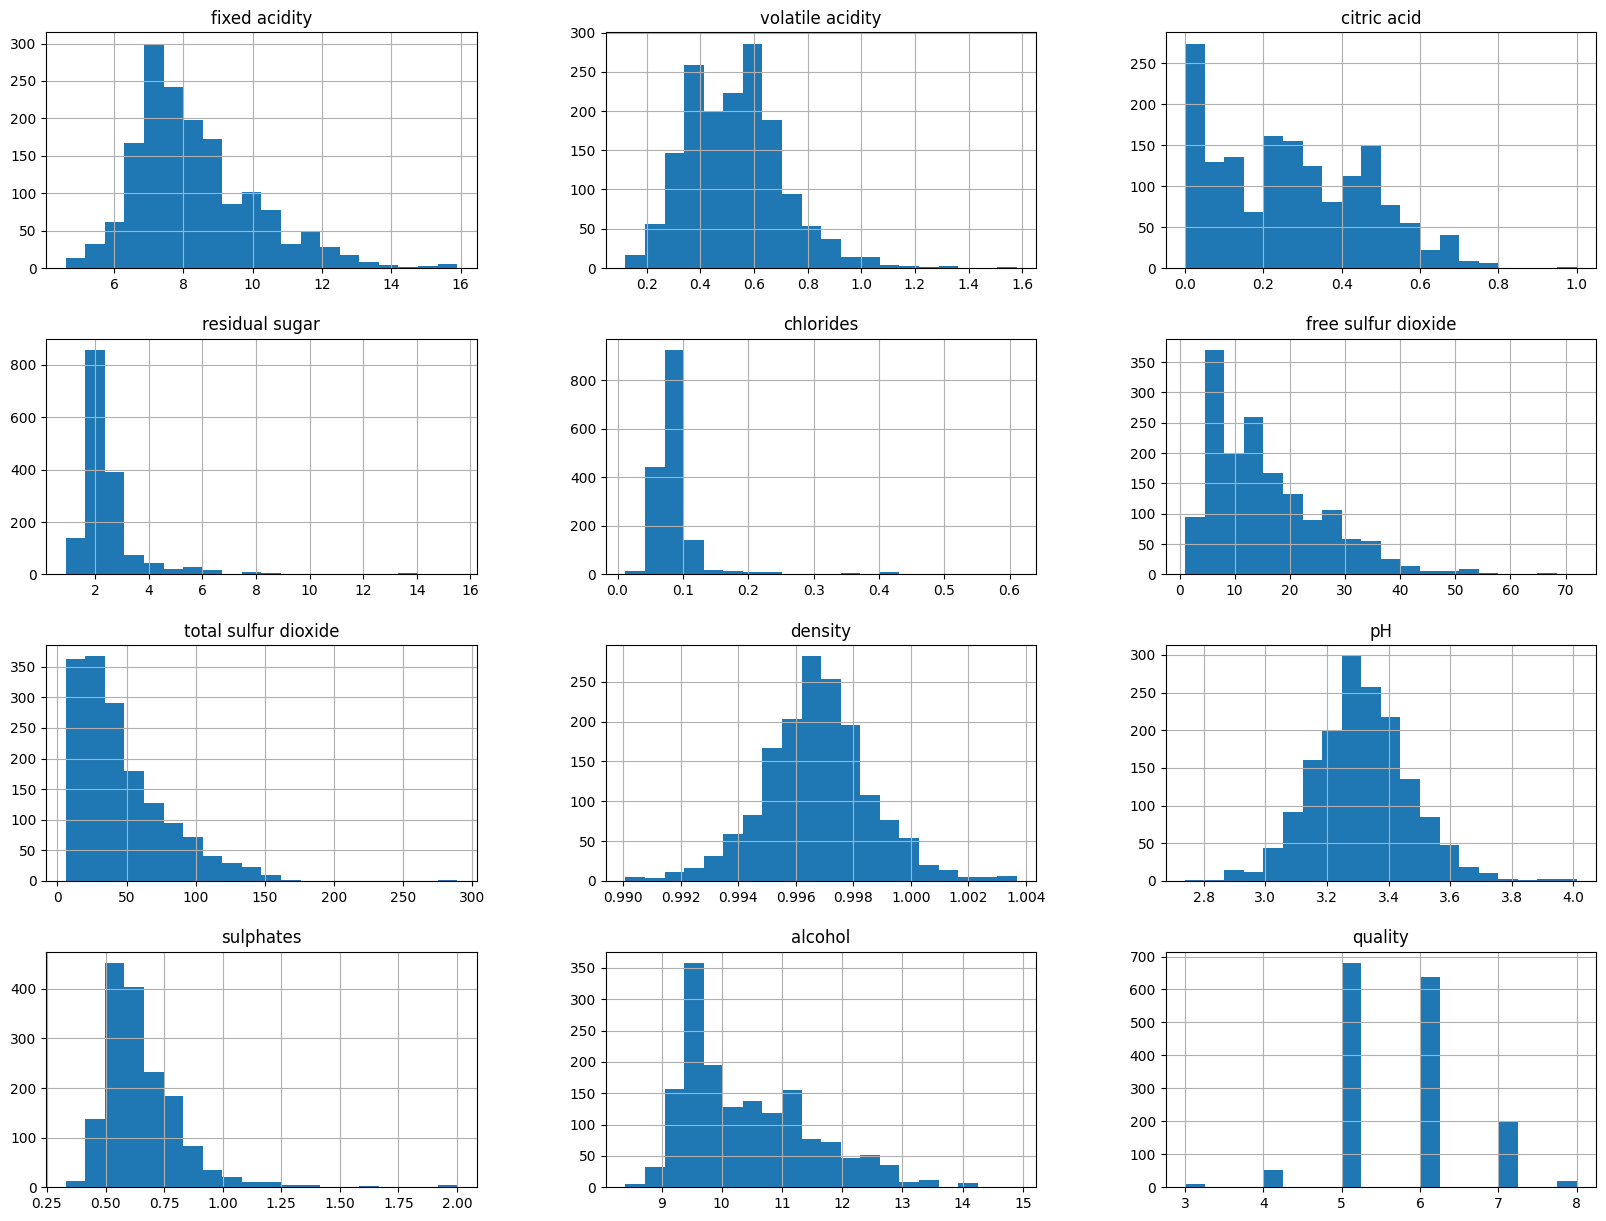

In [ ]:
# plot a histogram for each numerical attribute to get a feel of data
%matplotlib inline
import matplotlib.pyplot as plt
df_red.hist(bins=20, figsize=(20,15))
plt.show()

C:\Users\ck976\AppData\Local\Temp\ipykernel_8304\4137513424.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_red['quality'])


<Axes: ylabel='Density'>

<Figure size 500x600 with 0 Axes>

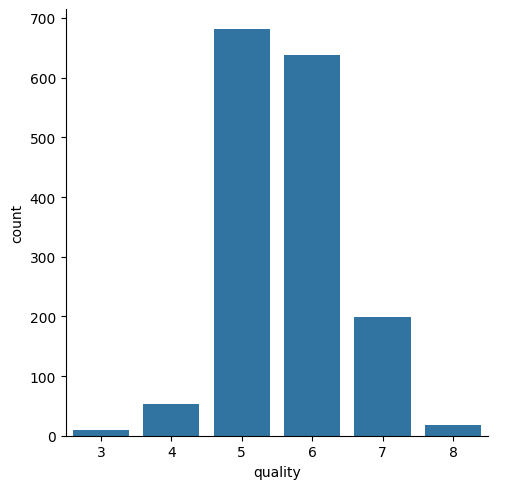

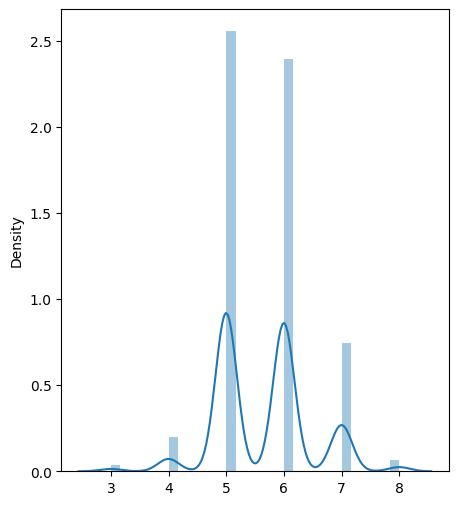

In [ ]:
# mostly wines are having quality of 5,6
plt.figure(figsize=(5,6))
sns.catplot(x='quality',data=df_red,kind='count')

plt.figure(figsize=(5,6))
sns.distplot(x=df_red['quality'])

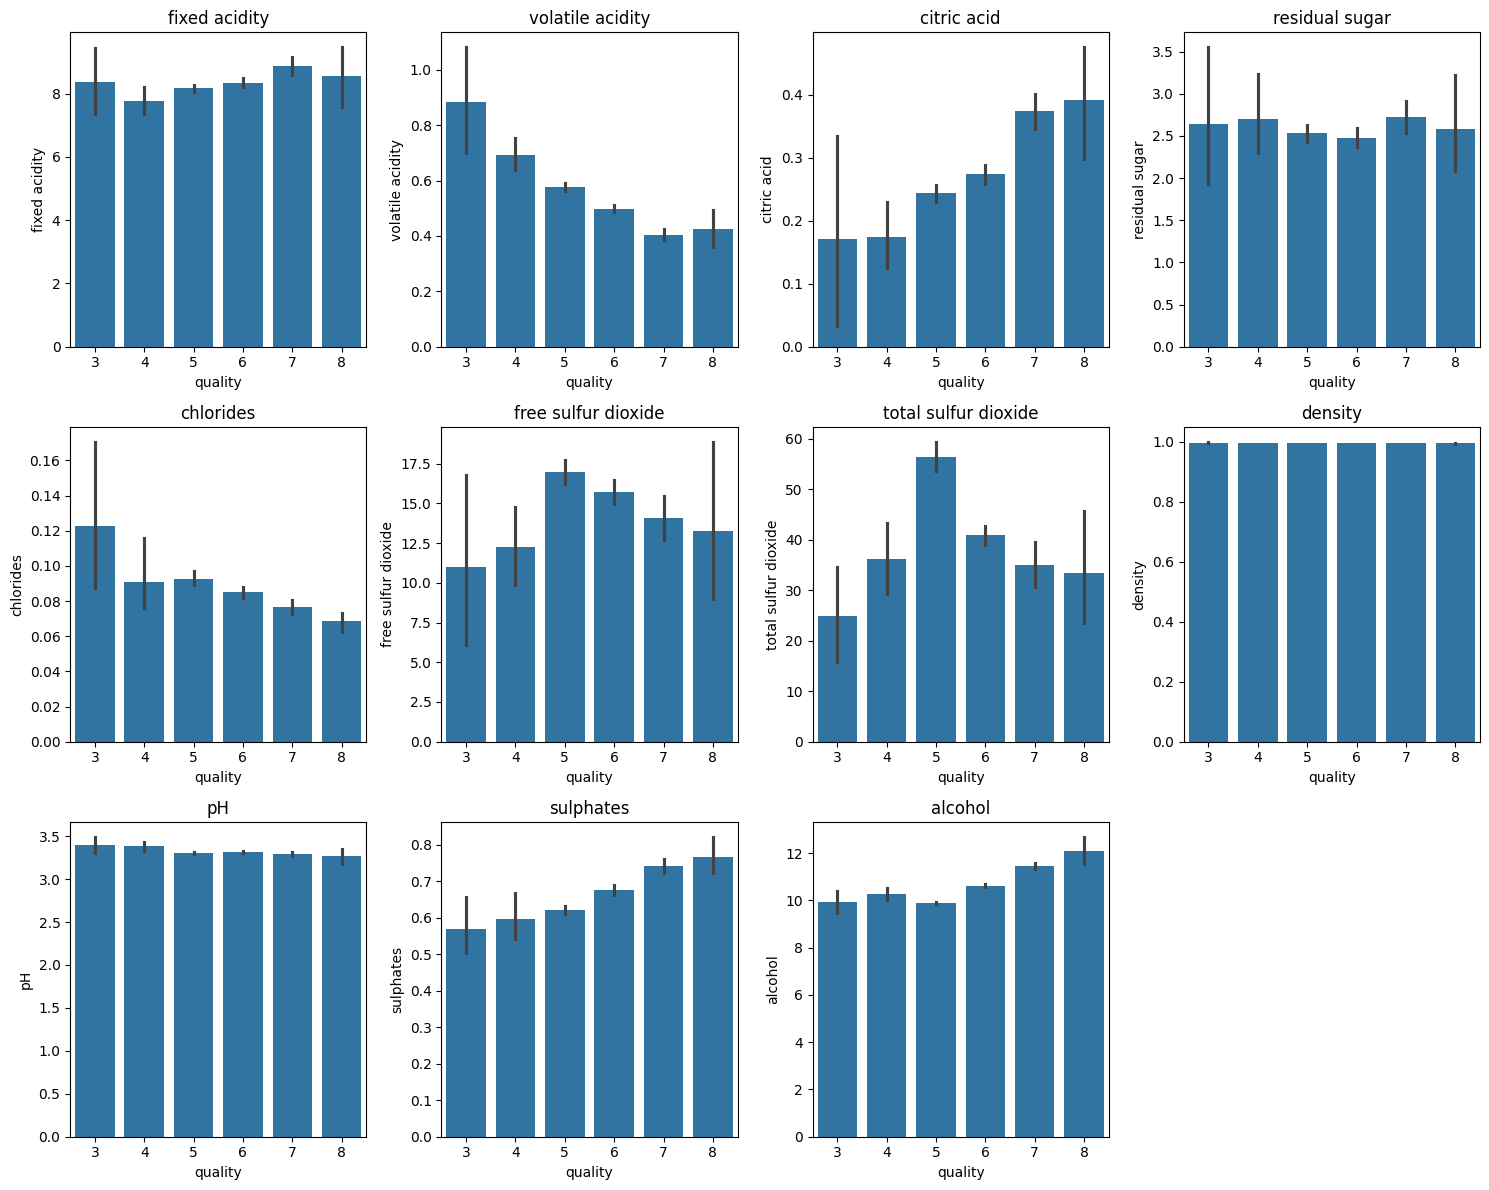

In [ ]:
# graph according to wine quality
columns = df_red.columns.drop('quality')

num_cols = 4
num_rows = (len(columns) - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    sns.barplot(x='quality', y=column, data=df_red, ax=axes[row, col])
    axes[row, col].set_title(column)

for i in range(len(columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Boxplot Distribution of All Collumns')

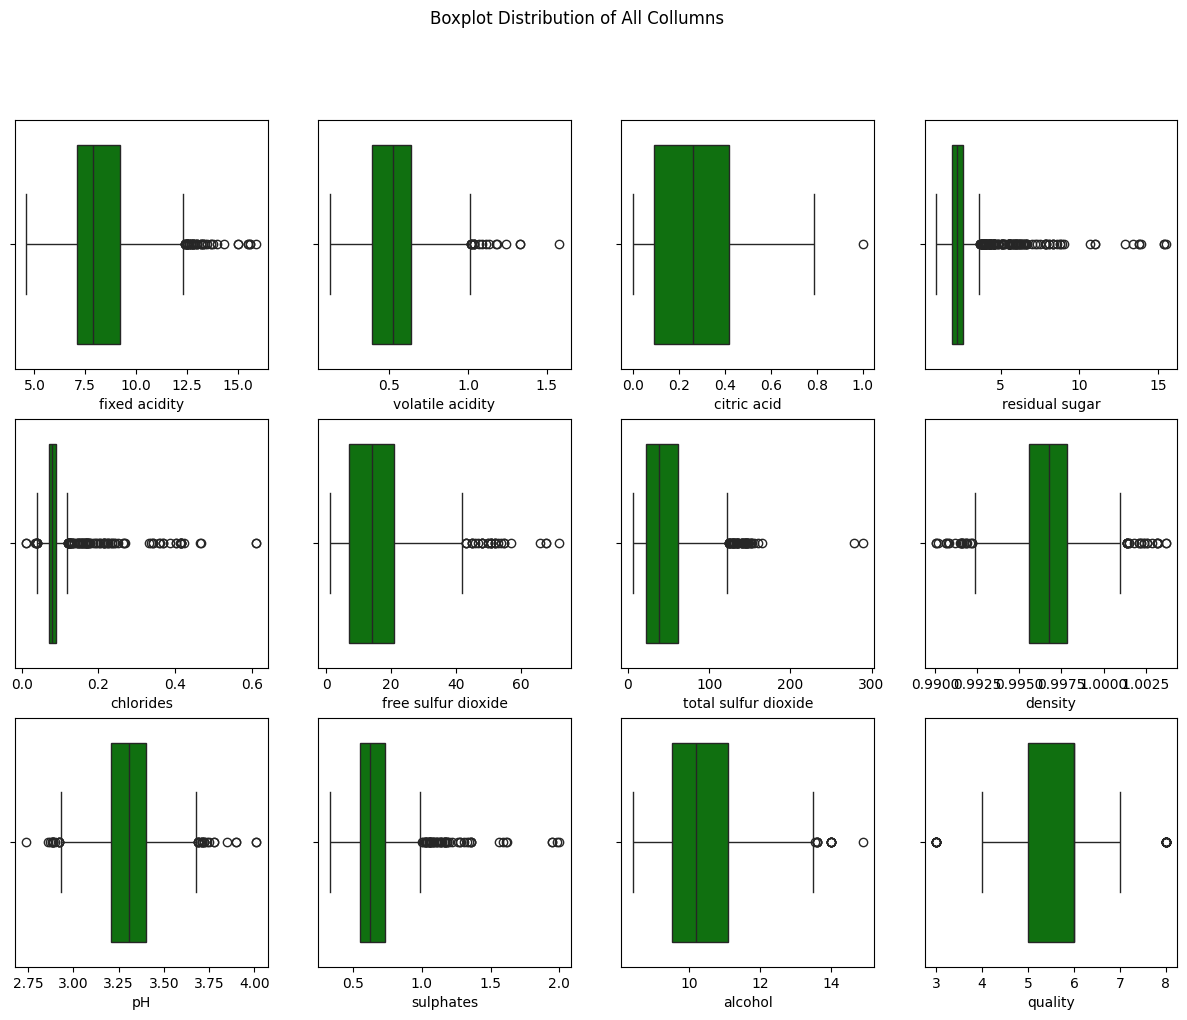

In [ ]:
#Boxplot distribution to visualize outliers
features = df_red.columns.tolist()
plt.figure(figsize=(15,11))
for i in range(0, len(features)):
  plt.subplot(3, 4, i+1)
  sns.boxplot(x=df_red[features[i]], color='green', orient='h')
plt.suptitle('Boxplot Distribution of All Collumns')

In [ ]:
#D'Agostino-Pearson Normality Test to determine data normality

import scipy.stats as st

no_target = ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol']

for i in range(len(no_target)):
  norm = st.normaltest(np.array(df_red[no_target[i]]))
  if norm.pvalue > 0.05:
    print('p-Value of', no_target[i], 'is :', norm.pvalue, 'can be categorized as Normal')
  else:
    print('p-Value of', no_target[i], 'is :', norm.pvalue, 'can be categorized as Not Normal')

p-Value of fixed acidity is : 1.7528277735470432e-49 can be categorized as Not Normal
p-Value of volatile acidity is : 7.192589039756692e-32 can be categorized as Not Normal
p-Value of citric acid is : 9.662822259281016e-34 can be categorized as Not Normal
p-Value of residual sugar is : 0.0 can be categorized as Not Normal
p-Value of chlorides is : 0.0 can be categorized as Not Normal
p-Value of free sulfur dioxide is : 4.779365332171477e-75 can be categorized as Not Normal
p-Value of total sulfur dioxide is : 1.433890834343538e-106 can be categorized as Not Normal
p-Value of density is : 2.1473202738102222e-07 can be categorized as Not Normal
p-Value of pH is : 4.8468645347727716e-08 can be categorized as Not Normal
p-Value of sulphates is : 1.1759065222978855e-197 can be categorized as Not Normal
p-Value of alcohol is : 3.3163288473185488e-34 can be categorized as Not Normal


In [ ]:
# Handling outliers with z_score

print('Data observations before removing outliers:', df_red.shape[0])

# Calculate Z-scores for all columns
z_scores = np.abs(stats.zscore(df_red))

# Create a boolean mask where any element's absolute Z-score is greater than 3
outlier_mask = (z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)

# Apply the mask to filter the DataFrame
df_red_filtered = df_red[~outlier_mask]

print('Data after treating with Z-score:', df_red_filtered.shape[0])

Data observations before removing outliers: 1599
Data after treating with Z-score: 1451


Text(0.5, 0.98, 'Boxplot Distribution of All Collumns after Removing Outliers')

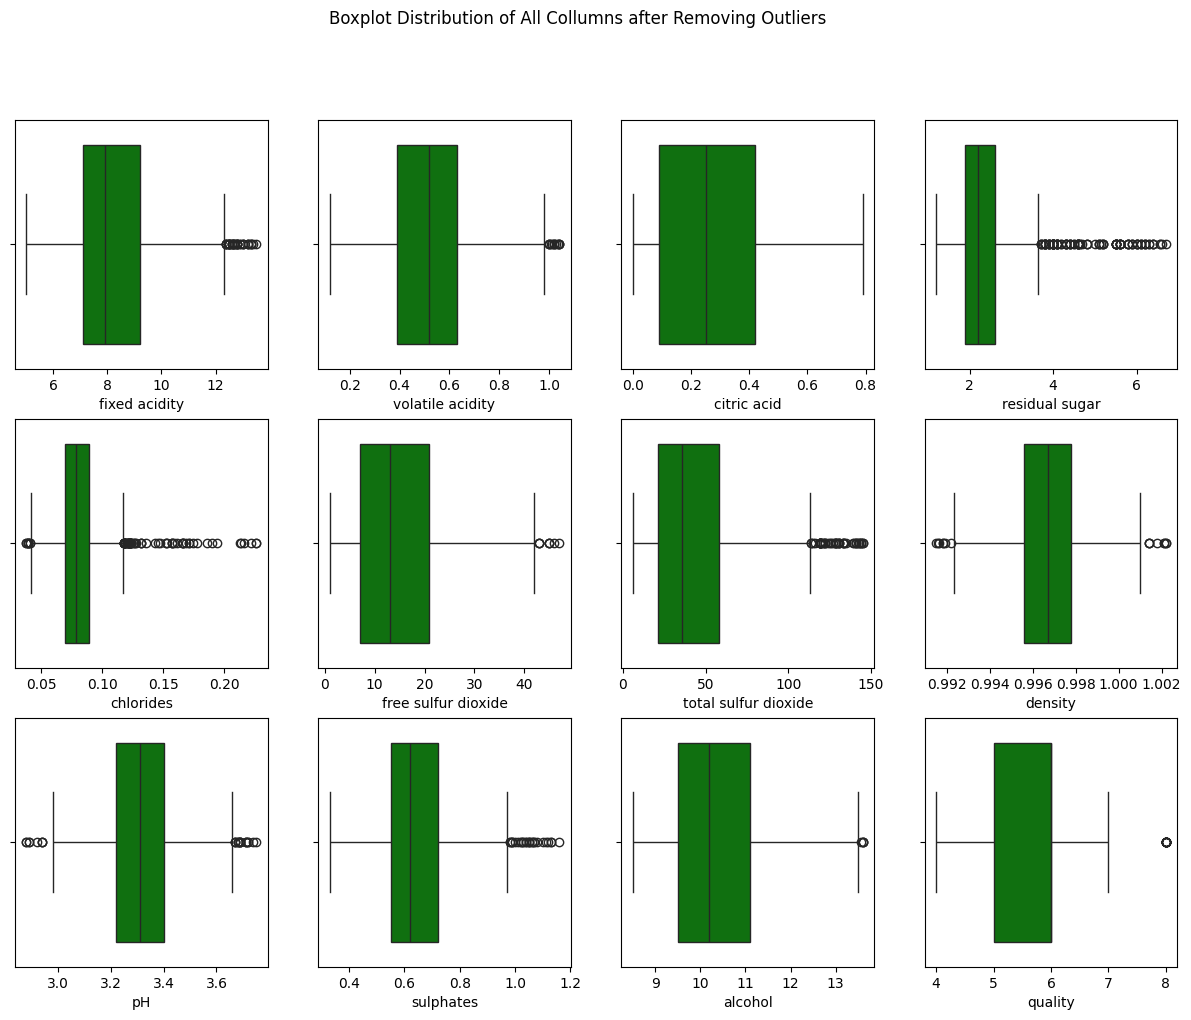

In [ ]:
#Boxplot distribution to visualize data after removing outliers

features = df_red_filtered.columns.tolist()
plt.figure(figsize=(15,11))
for i in range(0, len(features)):
  plt.subplot(3, 4, i+1)
  sns.boxplot(x=df_red_filtered[features[i]], color='green', orient='h')
plt.suptitle('Boxplot Distribution of All Collumns after Removing Outliers')

**Goal 1 RED: Classify Wine by Sugar Content - Sweet or Dry**

C:\Users\ck976\AppData\Local\Temp\ipykernel_8304\3905036733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red_filtered['Sweetness'] = df_red_filtered['residual sugar'].apply(classify_wine_by_sugar)
C:\Users\ck976\AppData\Local\Temp\ipykernel_8304\3905036733.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sweetness', y='residual sugar', data=df_red_filtered, palette='light:#5A9')


    residual sugar  Sweetness
0              1.9          0
1              2.6          1
2              2.3          0
3              1.9          0
4              1.9          0
5              1.8          0
6              1.6          0
7              1.2          0
8              2.0          0
9              6.1          1
10             1.8          0
11             6.1          1
12             1.6          0
16             1.8          0
18             4.4          1
20             1.8          0
21             2.3          0
22             1.6          0
23             2.3          0
24             2.4          0


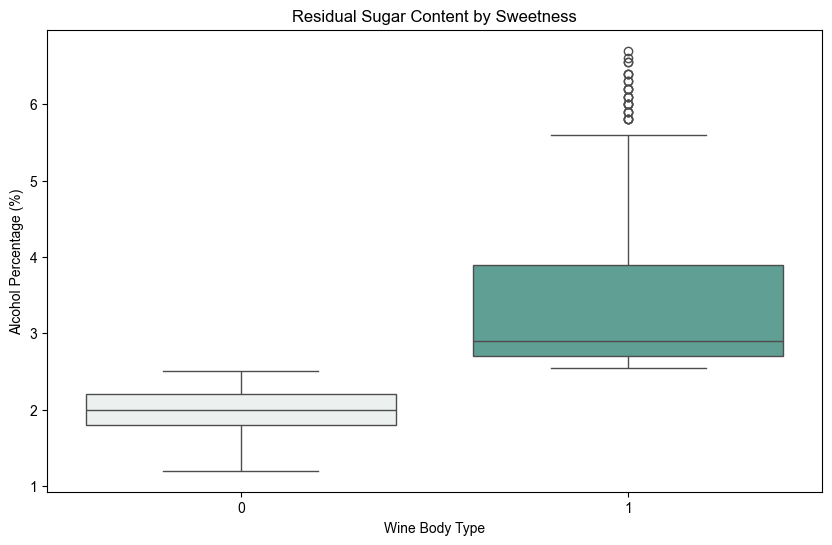

In [ ]:
# The residual sugar threshold for dry and sweet wines needs to be set,
# commonly wines with more than 5 grams per liter are considered sweet.
def classify_wine_by_sugar(content):
    #return "Sweet" if content > 5 else "Dry"
    return 1 if content > 2.5 else 0

# Apply classification to the 'residual sugar' column
df_red_filtered['Sweetness'] = df_red_filtered['residual sugar'].apply(classify_wine_by_sugar)

# Show the updated DataFrame with the new 'Classification' column
print(df_red_filtered[['residual sugar', 'Sweetness']].head(20))

#Plotting the distribution of wine body types with potential outliers
plt.figure(figsize=(10, 6))

#Create a boxplot to visualize the outliers in alcohol content for each body type
sns.boxplot(x='Sweetness', y='residual sugar', data=df_red_filtered, palette='light:#5A9')
plt.title('Residual Sugar Content by Sweetness')
plt.ylabel('Alcohol Percentage (%)')
plt.xlabel('Wine Body Type')

sns.set_style("whitegrid")
plt.show()



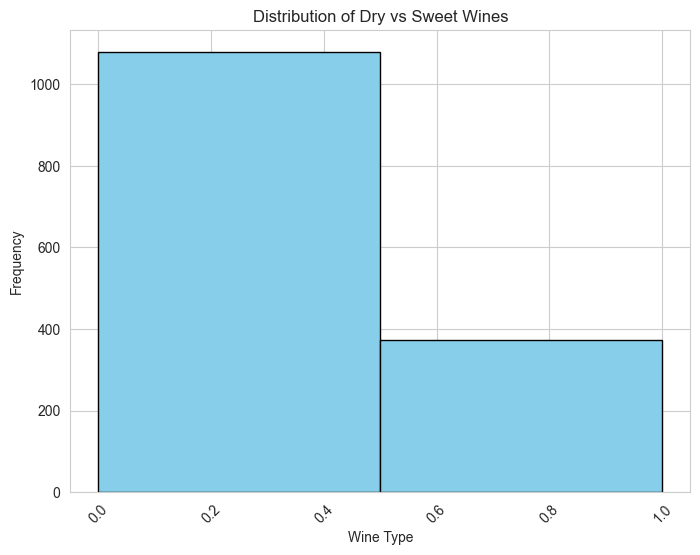

In [ ]:
# Create a histogram for this distribution
plt.figure(figsize=(8, 6))
plt.hist(df_red_filtered['Sweetness'], bins=2, color=['skyblue'], edgecolor='black')
plt.title('Distribution of Dry vs Sweet Wines')
plt.xlabel('Wine Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better visibility
plt.show()

In [ ]:
# Drop residual sugar from the dataset since we have a new binary column to use for prediction

df_red_filtered.drop('residual sugar', axis=1)

fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
4               7.4             0.700         0.00      0.076   
...             ...               ...          ...        ...   
1594            6.2             0.600         0.08      0.090   
1595            5.9             0.550         0.10      0.062   
1596            6.3             0.510         0.13      0.076   
1597            5.9             0.645         0.12      0.075   
1598            6.0             0.310         0.47      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  Sweetness  
0         9.4        5          0  
1         9.8        5          1  
2         9.8        5          0  
3         9.8        6          0  
4         9.4        5          0  
...       ...      ...        ...  
1594     10.5        5          0  
1595     11.2        6          0  
1596     11.0        6          0  
1597     10.2        5          0  
1598     11.0        6          1  

[1451 rows x 12 columns]

**Goal 2 RED: Classify Wine by Alcohol Level - Light-Bodied and Full-Bodied**

   alcohol  Body_Type
0      9.4          0
1      9.8          0
2      9.8          0
3      9.8          0
4      9.4          0
5      9.4          0
6      9.4          0
7     10.0          1
8      9.5          0
9     10.5          1


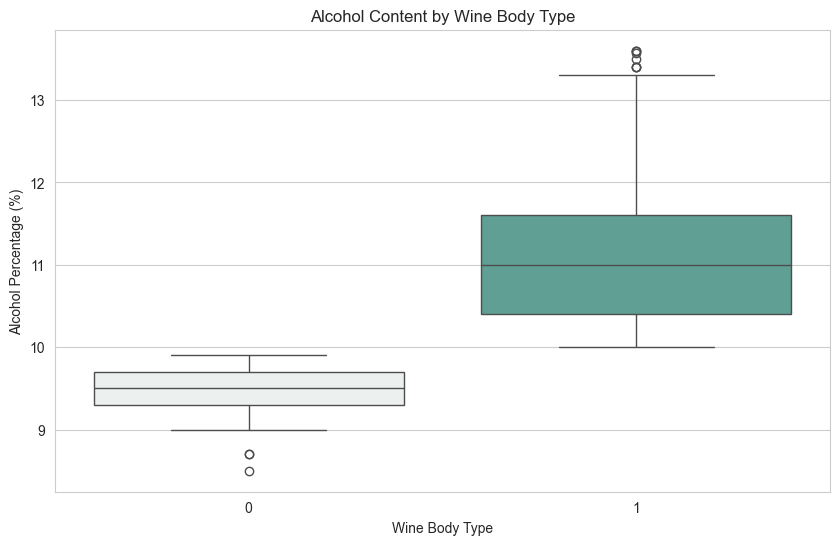

In [ ]:
# Define the classification function based on alcohol content
def classify_wine_by_alcohol(alcohol):
    #if alcohol < 12.5:
        #return 'Light-bodied'
    #elif 12.5 <= alcohol <= 14:
        #return 'Medium-bodied'
    #else:
        #return 'Full-bodied'

    #if alcohol < 12.5:
        #return 0
    #elif 12.5 <= alcohol <= 14:
        #return 1
    #else:
        #return 2
    if alcohol < 10:
        return 0
    else:
        return 1

df_red_filtered['Body_Type'] = df_red_filtered['alcohol'].apply(classify_wine_by_alcohol)

# updated DataFrame to verify the classification
print(df_red_filtered[['alcohol', 'Body_Type']].head(10))

#Plotting the distribution of wine body types with potential outliers
plt.figure(figsize=(10, 6))

#Create a boxplot to visualize the outliers in alcohol content for each body type
sns.boxplot(x='Body_Type', y='alcohol', data=df_red_filtered, palette='light:#5A9')
plt.title('Alcohol Content by Wine Body Type')
plt.ylabel('Alcohol Percentage (%)')
plt.xlabel('Wine Body Type')

sns.set_style("whitegrid")
plt.show()
#df_red_filtered.drop(['alcohol'], axis=1, inplace=True)

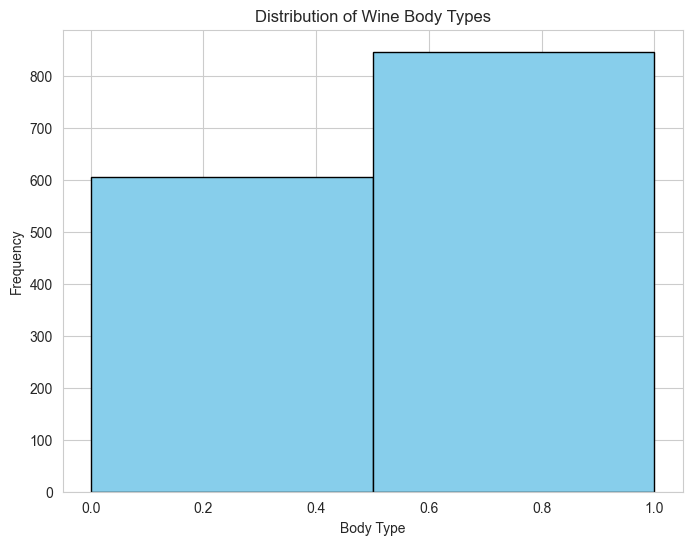

In [ ]:
#classification distribution of body types

plt.figure(figsize=(8, 6))
plt.hist(df_red_filtered['Body_Type'], bins=2, color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Body Types')
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Drop alcohol from the dataset since we have a new binary column to use for prediction

df_red_filtered.drop('alcohol', axis=1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      Sweetness  Body_Type  quality_good_bad  
0             0          0                 0  
1             1          0                 0  
2             0          0                 0  
3             0          0                 1  
4             0          0                 0  
...         ...        ...               ...  
1594          0          1                 0  
1595          0          1                 1  
1596          0          1                 1  
1597          0          1                 0  
1598          1          1                 1  

[1451 rows x 13 columns]

**Goal 3 RED: Classify Wine by Quality - Good and Bad**

In [ ]:
# Determine quality of wine by being good or bad

def classify_wine_by_quality(quality):
    #return "good" if quality > 5 else "bad"
    return 1 if quality > 5 else 0

# Apply classification to the 'quality' column
df_red_filtered['quality_good_bad'] = df_red_filtered['quality'].apply(classify_wine_by_quality)

# Show the updated DataFrame with the new 'quality_binary' column
print(df_red_filtered[['quality', 'quality_good_bad']].head(20))
print(df_red_filtered['quality_good_bad'].value_counts())

    quality  quality_good_bad
0         5                 0
1         5                 0
2         5                 0
3         6                 1
4         5                 0
5         5                 0
6         5                 0
7         7                 1
8         7                 1
9         5                 0
10        5                 0
11        5                 0
12        5                 0
16        7                 1
18        4                 0
20        6                 1
21        5                 0
22        5                 0
23        5                 0
24        6                 1
quality_good_bad
1    787
0    664
Name: count, dtype: int64


C:\Users\ck976\AppData\Local\Temp\ipykernel_8304\3801732870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_red_filtered['quality_good_bad'] = df_red_filtered['quality'].apply(classify_wine_by_quality)


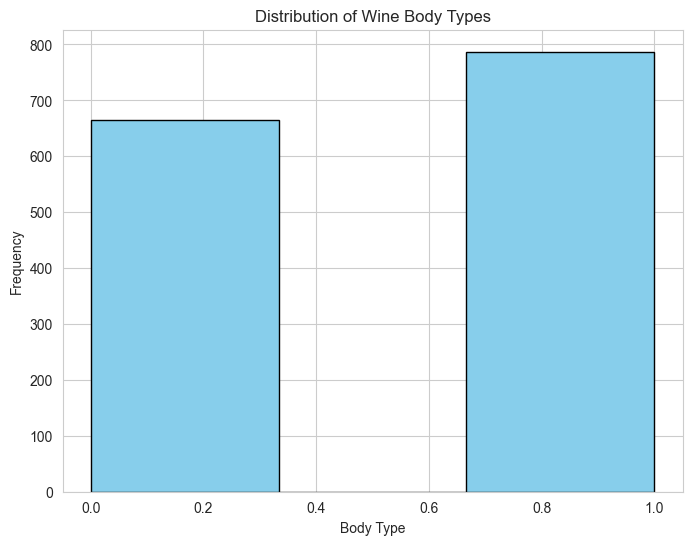

In [ ]:
#classification distribution of body types

plt.figure(figsize=(8, 6))
plt.hist(df_red_filtered['quality_good_bad'], bins=3, color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Body Types')
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Drop quality from the dataset since we have a new binary column to use for prediction

df_red_filtered = df_red_filtered.drop('quality', axis=1)

In [ ]:
df_red_filtered.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Sweetness  Body_Type  quality_good_bad  
0      9.4          0          0                 0  
1      9.8          1          0                 0  
2      9.8          0          0                 0  
3      9.8          0          0                 1  
4      9.4          0          0                 0

Text(0.5, 0.98, 'Train Data Distribution after Yeo-Johnson Transformation ')

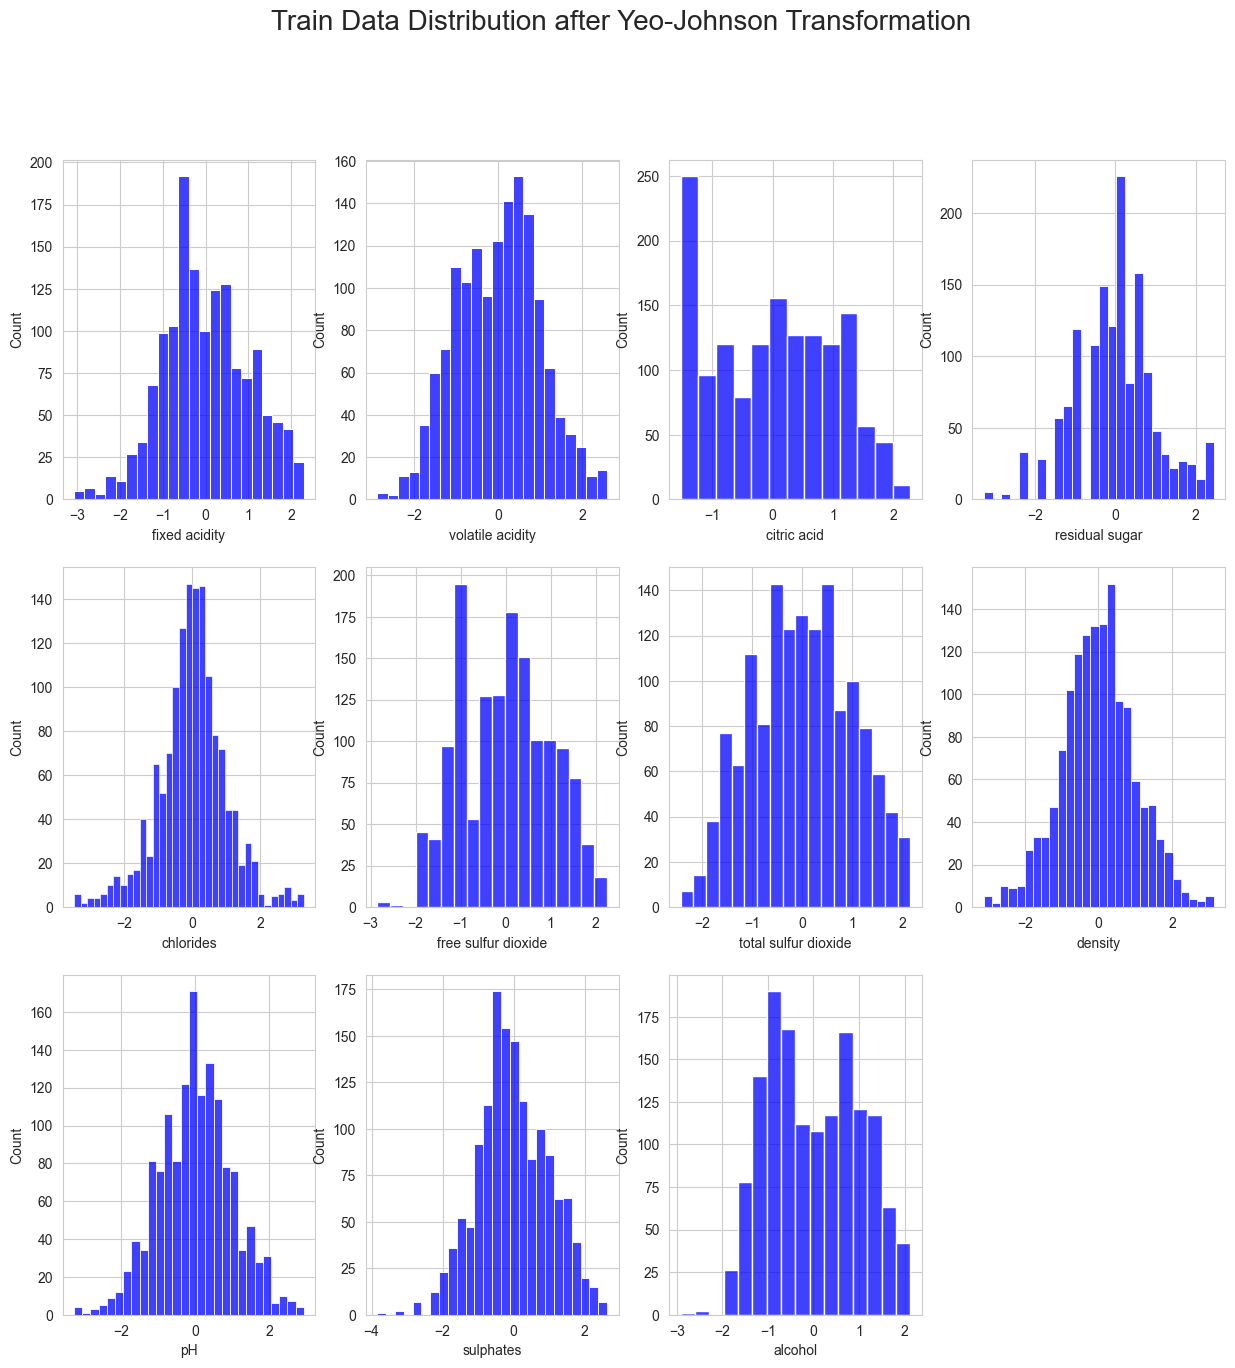

In [ ]:
#Show Yeo-Johnson Transformation distribution to improve skewness in the distribution

from sklearn.preprocessing import PowerTransformer

df_red_transformed = df_red_filtered.drop(['quality_good_bad', 'Sweetness', 'Body_Type'], axis=1)

for i in df_red_transformed.columns:
  power = PowerTransformer(method='yeo-johnson')
  power.fit(df_red_transformed[[i]])
  df_red_transformed[i] = power.transform(df_red_transformed[[i]]).ravel()


#Check the Histogram Distribution
plt.figure(figsize=(15,15))
for i in range(0, len(no_target)):
  plt.subplot(3, 4, i+1)
  ax = sns.histplot(df_red_transformed[no_target[i]], color='blue')
plt.suptitle('Train Data Distribution after Yeo-Johnson Transformation ', fontsize = 20)

In [ ]:
# Concatenate Data Frames to include Sweetness, Body Type, and Quality and transformed data

Sweetness = df_red_filtered['Sweetness']
Body_Type = df_red_filtered['Body_Type']
quality_good_bad = df_red_filtered['quality_good_bad']


# Create a DataFrame for each column
Sweetness_df = pd.DataFrame(Sweetness, columns=['Sweetness'])
Body_Type_df = pd.DataFrame(Body_Type, columns=['Body_Type'])
quality_good_bad_df = pd.DataFrame(quality_good_bad, columns=['quality_good_bad'])

# Concatenate the three columns onto the large DataFrame
df_red_prepped = pd.concat([df_red_transformed, Sweetness_df, Body_Type_df, quality_good_bad_df], axis=1)

# Show the updated DataFrame
df_red_prepped.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.467878          1.055740    -1.524506       -0.610683  -0.145035   
1      -0.170805          1.919750    -1.524506        0.649155   0.986838   
2      -0.170805          1.357067    -1.245434        0.207601   0.718578   
3       1.573404         -1.556675     1.444056       -0.610683  -0.207213   
4      -0.467878          1.055740    -1.524506       -0.610683  -0.145035   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.241492             -0.066536  0.640791  1.360860  -0.589657   
1             1.091561              0.952517  0.061011 -0.816507   0.451524   
2             0.238587              0.624244  0.177435 -0.380977   0.220005   
3             0.440493              0.784119  0.756049 -1.110847  -0.393177   
4            -0.241492             -0.066536  0.640791  1.360860  -0.589657   

    alcohol  Sweetness  Body_Type  quality_good_bad  
0 -1.120424          0          0                 0  
1 -0.530340          1          0                 0  
2 -0.530340          0          0                 0  
3 -0.530340          0          0                 1  
4 -1.120424          0          0                 0

In [ ]:
# Determine Multicollinearity using Variance Inflation Factor (VIF)

#A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.
#Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce
#the statistical significance of the independent variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def Calculate_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

In [ ]:
# Calculate VIF

#A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in
#the structure of the model and selection of independent variables. In this case there are no high VIF scores, meaning we can keep all independent variables.

vif_score = Calculate_vif(X=df_red_prepped.drop(['quality_good_bad', 'Sweetness', 'Body_Type'], axis=1))
print(vif_score)
more_vif = vif_score[vif_score['VIF'] > 5].sort_values(by='VIF', ascending=False)
print(more_vif)

               variables       VIF
0          fixed acidity  6.842529
1       volatile acidity  1.954695
2            citric acid  3.021657
3         residual sugar  1.682001
4              chlorides  1.268358
5    free sulfur dioxide  2.834789
6   total sulfur dioxide  3.206537
7                density  5.604720
8                     pH  3.156627
9              sulphates  1.376937
10               alcohol  2.853966
       variables       VIF
0  fixed acidity  6.842529
7        density  5.604720


## White Wine

In [ ]:
file_path_white = "data/winequality_white.csv"

df_white = pd.read_csv(file_path_white, sep=';')
print(df_white.head(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0

In [ ]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
#summary of statistics
print(df_white.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [ ]:
#Missing values

print(df_white.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
corr_matrix_white = df_white.corr()

corr_with_quality_white = corr_matrix_white["quality"].sort_values(ascending=False)
print(corr_with_quality_white)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


<Axes: >

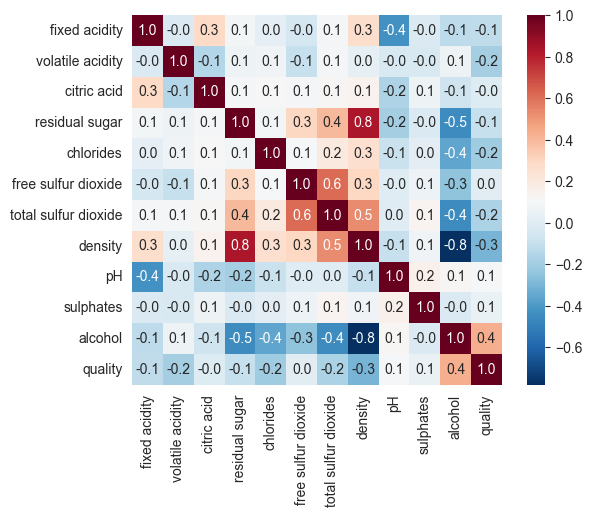

In [ ]:
#Correlation Heat Map
correlation=df_white.corr()
sns.heatmap(correlation,annot=True,cbar=True,square=True,fmt='.1f',cmap="RdBu_r")

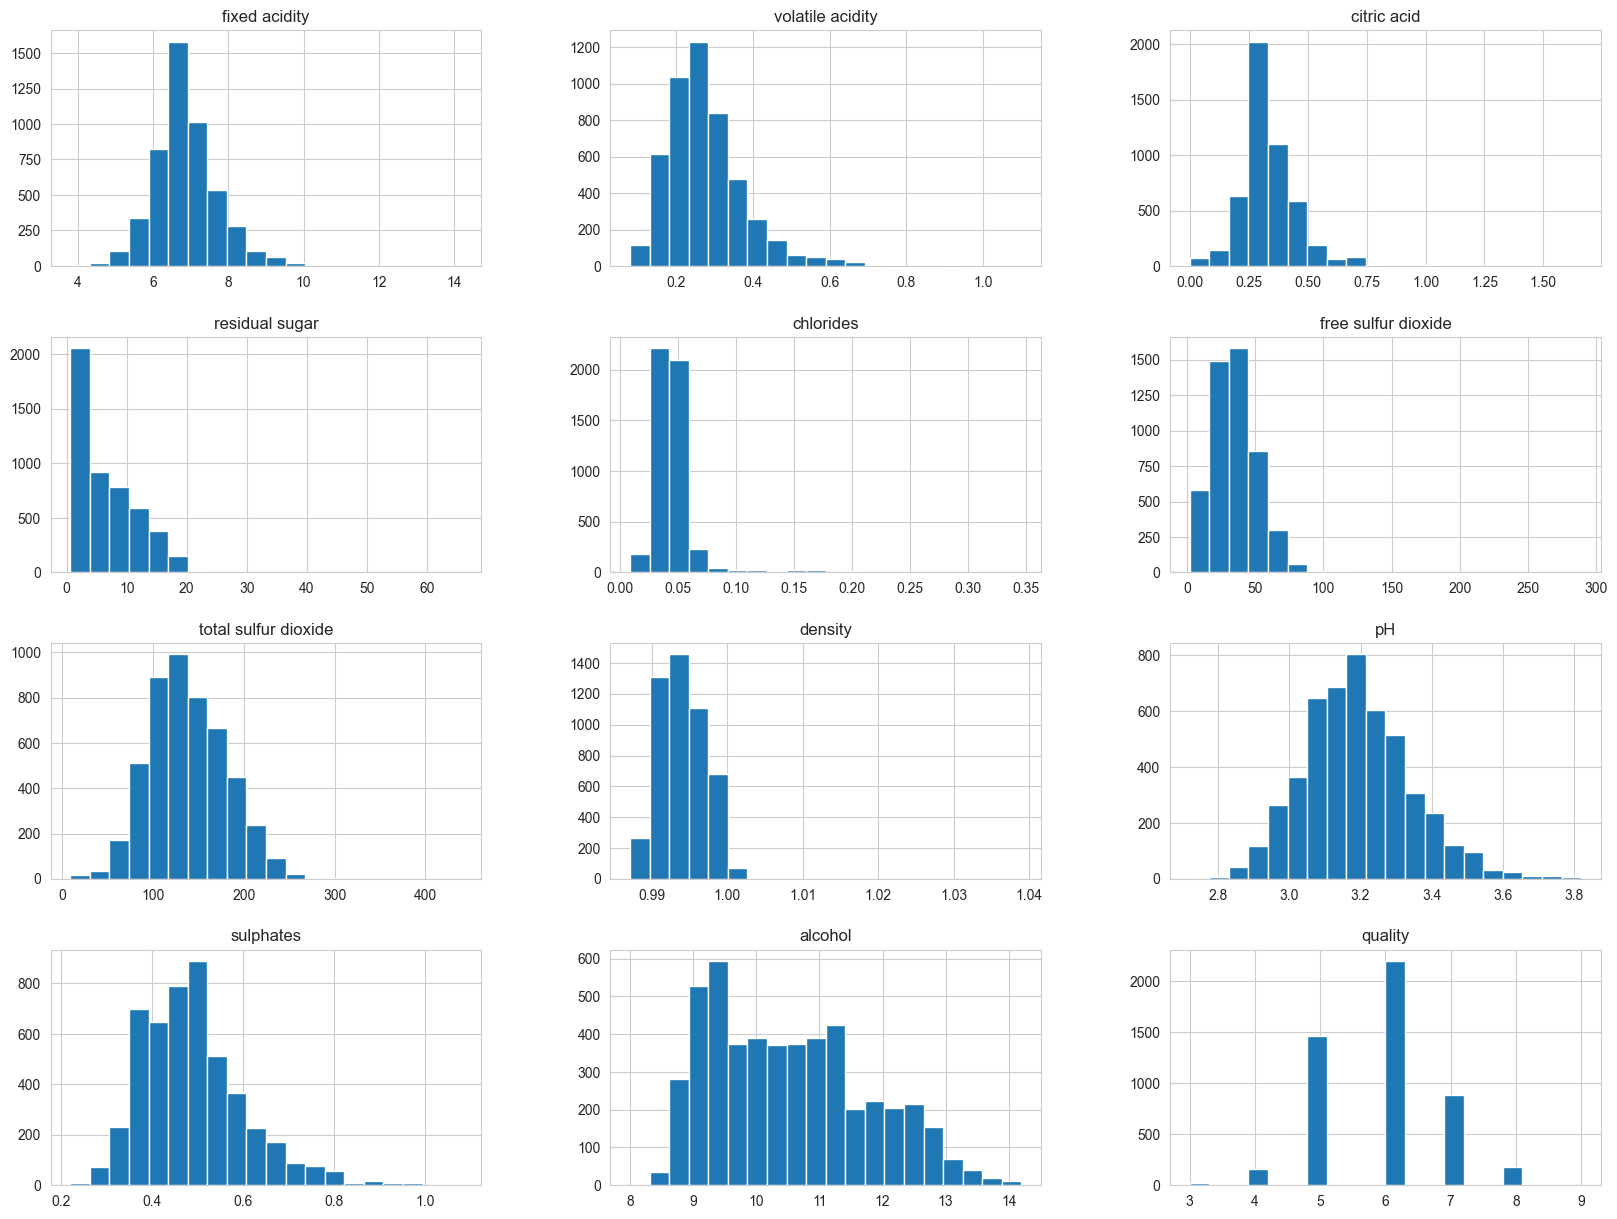

In [ ]:
# plot a histogram for each numerical attribute to get a feel of data
%matplotlib inline
import matplotlib.pyplot as plt
df_white.hist(bins=20, figsize=(20,15))
plt.show()

C:\Users\ck976\AppData\Local\Temp\ipykernel_8304\1326874849.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_white['quality'])


<Axes: ylabel='Density'>

<Figure size 500x600 with 0 Axes>

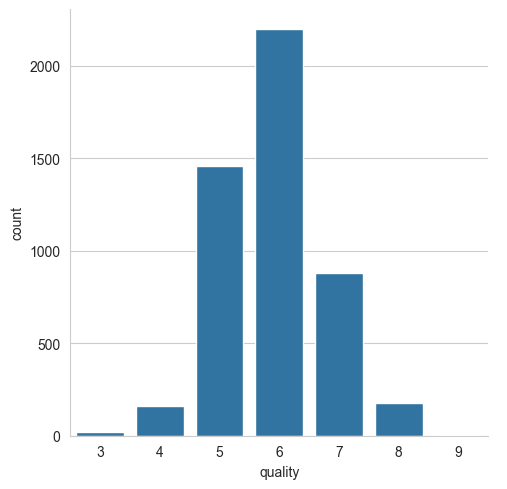

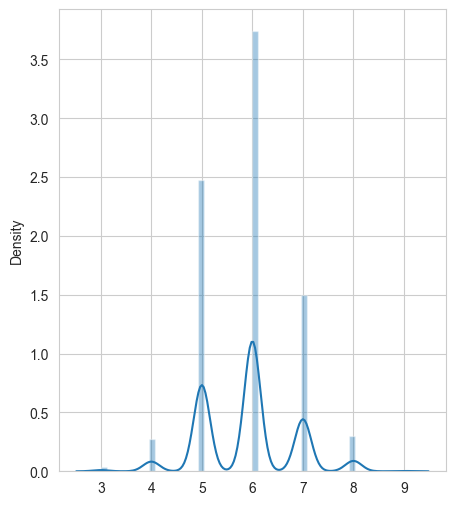

In [ ]:
# mostly wines are having quality of 5,6
plt.figure(figsize=(5,6))
sns.catplot(x='quality',data=df_white,kind='count')

plt.figure(figsize=(5,6))
sns.distplot(x=df_white['quality'])

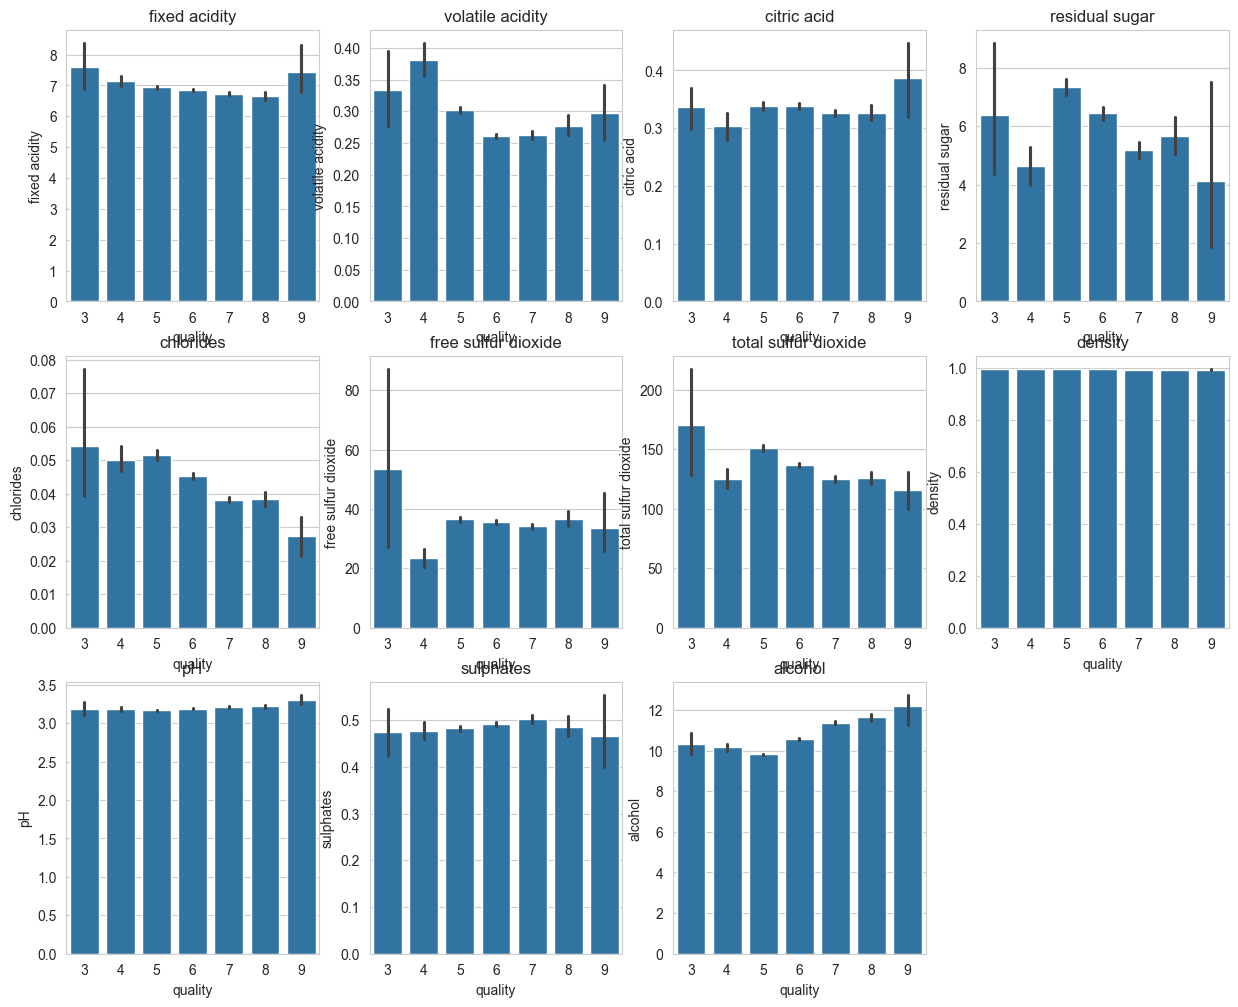

In [ ]:
# graph according to wine quality
columns = df_white.columns.drop('quality')

num_cols = 4
num_rows = (len(columns) - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    sns.barplot(x='quality', y=column, data=df_white, ax=axes[row, col])
    axes[row, col].set_title(column)

for i in range(len(columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])


Text(0.5, 0.98, 'Boxplot Distribution of All Collumns')

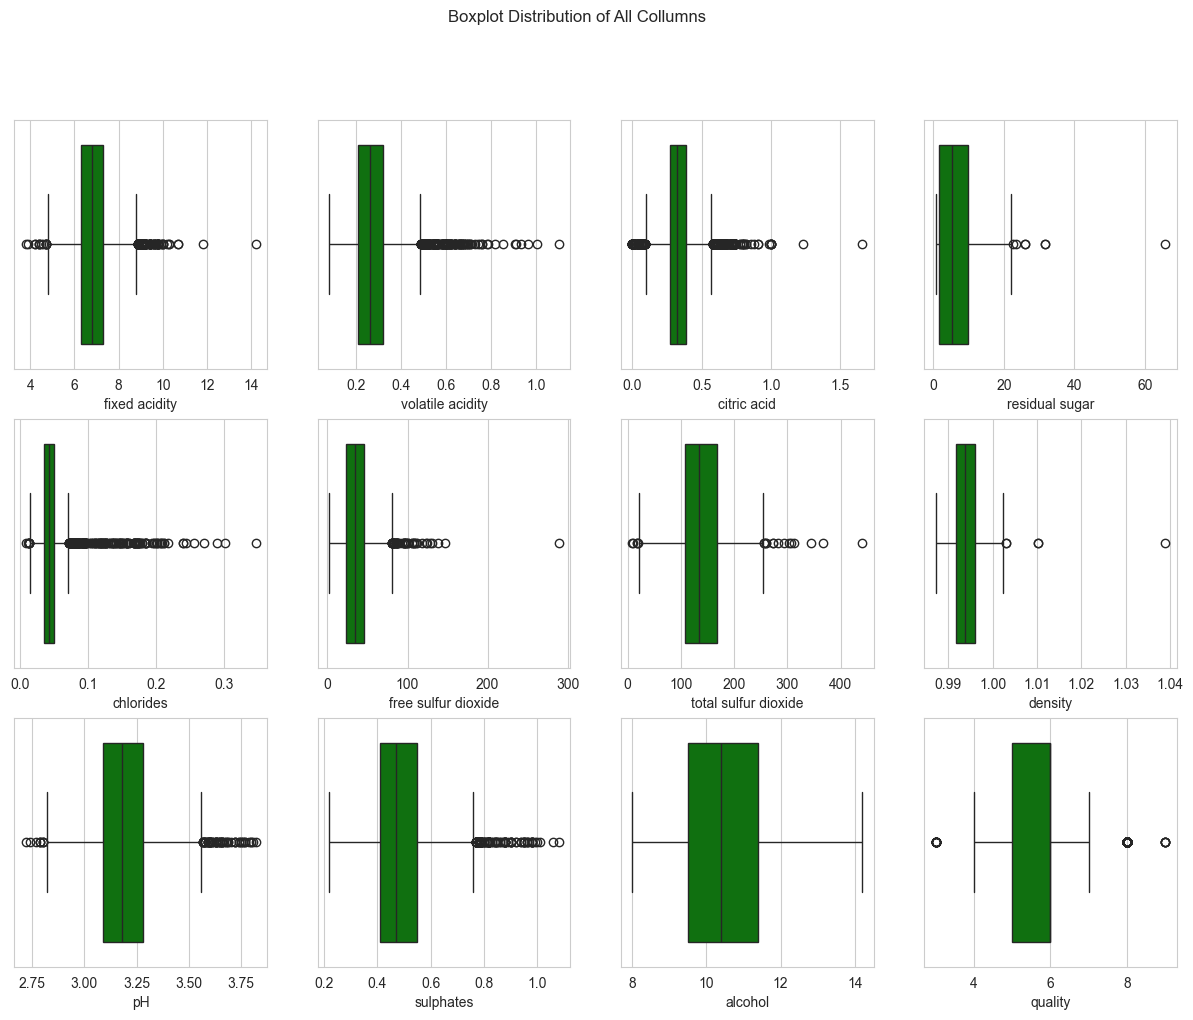

In [ ]:
#Boxplot distribution to visualize outliers
features = df_white.columns.tolist()
plt.figure(figsize=(15,11))
for i in range(0, len(features)):
  plt.subplot(3, 4, i+1)
  sns.boxplot(x=df_white[features[i]], color='green', orient='h')
plt.suptitle('Boxplot Distribution of All Collumns')

In [ ]:
#D'Agostino-Pearson Normality Test to determine data normality

import scipy.stats as st

no_target_white = ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol']

for i in range(len(no_target)):
  norm = st.normaltest(np.array(df_white[no_target[i]]))
  if norm.pvalue > 0.05:
    print('p-Value of', no_target[i], 'is :', norm.pvalue, 'can be categorized as Normal')
  else:
    print('p-Value of', no_target[i], 'is :', norm.pvalue, 'can be categorized as Not Normal')

p-Value of fixed acidity is : 5.192296946299217e-118 can be categorized as Not Normal
p-Value of volatile acidity is : 0.0 can be categorized as Not Normal
p-Value of citric acid is : 0.0 can be categorized as Not Normal
p-Value of residual sugar is : 1.3781731594418585e-228 can be categorized as Not Normal
p-Value of chlorides is : 0.0 can be categorized as Not Normal
p-Value of free sulfur dioxide is : 0.0 can be categorized as Not Normal
p-Value of total sulfur dioxide is : 4.330752711423771e-35 can be categorized as Not Normal
p-Value of density is : 1.0995470514104443e-307 can be categorized as Not Normal
p-Value of pH is : 1.0892373353367272e-42 can be categorized as Not Normal
p-Value of sulphates is : 8.19207367045622e-161 can be categorized as Not Normal
p-Value of alcohol is : 3.6093322661783645e-94 can be categorized as Not Normal


In [ ]:
# Handling outliers with z_score

from scipy import stats

print('Data observations before removing outliers:', df_white.shape[0])

# Calculate Z-scores for all columns
z_scores_white = np.abs(stats.zscore(df_white))

# Create a boolean mask where any element's absolute Z-score is greater than 3
outlier_mask_white = (z_scores_white > 3).any(axis=1) | (z_scores_white < -3).any(axis=1)

# Apply the mask to filter the DataFrame
df_white_filtered = df_white[~outlier_mask_white]

print('Data after treating with Z-score:', df_white_filtered.shape[0])

Data observations before removing outliers: 4898
Data after treating with Z-score: 4487


Text(0.5, 0.98, 'Boxplot Distribution of All Collumns after Removing Outliers')

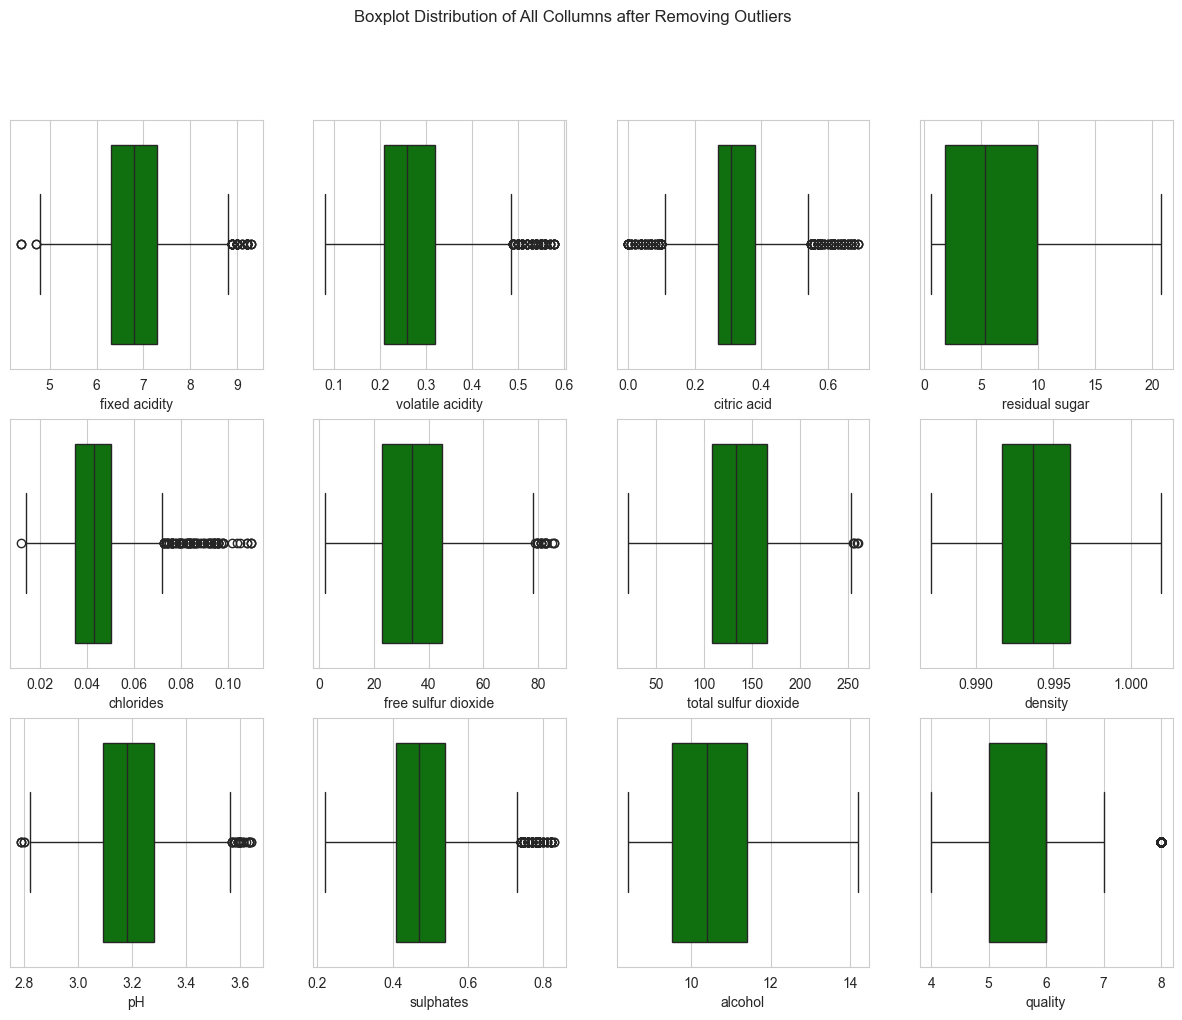

In [ ]:
#Boxplot distribution to visualize data after removing outliers

features = df_white_filtered.columns.tolist()
plt.figure(figsize=(15,11))
for i in range(0, len(features)):
  plt.subplot(3, 4, i+1)
  sns.boxplot(x=df_white_filtered[features[i]], color='green', orient='h')
plt.suptitle('Boxplot Distribution of All Collumns after Removing Outliers')

**Goal 1 WHITE: Classify Wine by Sugar Content - Sweet or Dry**

C:\Users\ck976\AppData\Local\Temp\ipykernel_8304\562648835.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white_filtered['Sweetness'] = df_white_filtered['residual sugar'].apply(classify_wine_by_sugar)
C:\Users\ck976\AppData\Local\Temp\ipykernel_8304\562648835.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sweetness', y='residual sugar', data=df_white_filtered, palette='light:#5A9')


    residual sugar  Sweetness
0            20.70          1
1             1.60          0
2             6.90          1
3             8.50          1
4             8.50          1
5             6.90          1
6             7.00          1
7            20.70          1
8             1.60          0
9             1.50          0
10            1.45          0
11            4.20          0
12            1.20          0
13            1.50          0
14           19.25          1
15            1.50          0
16            1.10          0
18            1.10          0
19            7.50          1
21            2.90          0


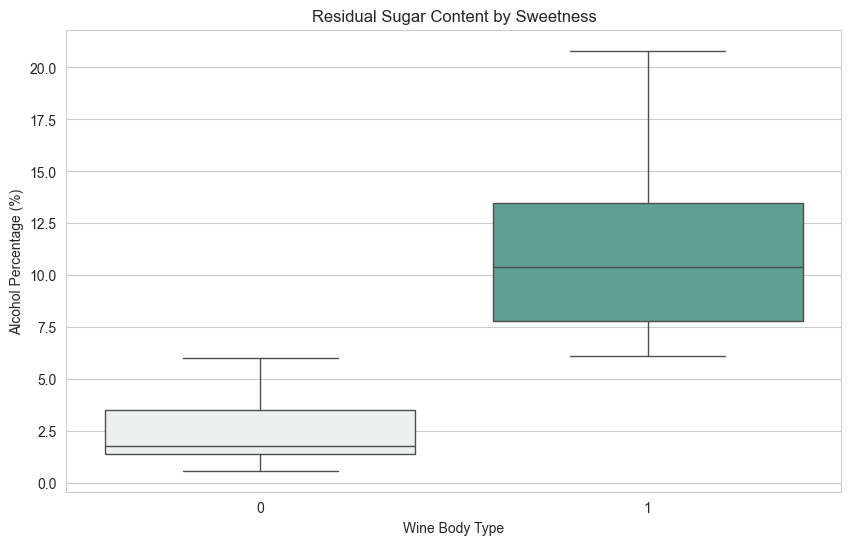

In [ ]:
# The residual sugar threshold for dry and sweet wines needs to be set,
# commonly wines with more than 5 grams per liter are considered sweet.
def classify_wine_by_sugar(content):
    #return "Sweet" if content > 5 else "Dry"
    return 1 if content > 6 else 0

# Apply classification to the 'residual sugar' column
df_white_filtered['Sweetness'] = df_white_filtered['residual sugar'].apply(classify_wine_by_sugar)

# Show the updated DataFrame with the new 'Classification' column
print(df_white_filtered[['residual sugar', 'Sweetness']].head(20))

#Plotting the distribution of wine body types with potential outliers
plt.figure(figsize=(10, 6))

#Create a boxplot to visualize the outliers in alcohol content for each body type
sns.boxplot(x='Sweetness', y='residual sugar', data=df_white_filtered, palette='light:#5A9')
plt.title('Residual Sugar Content by Sweetness')
plt.ylabel('Alcohol Percentage (%)')
plt.xlabel('Wine Body Type')

sns.set_style("whitegrid")
plt.show()

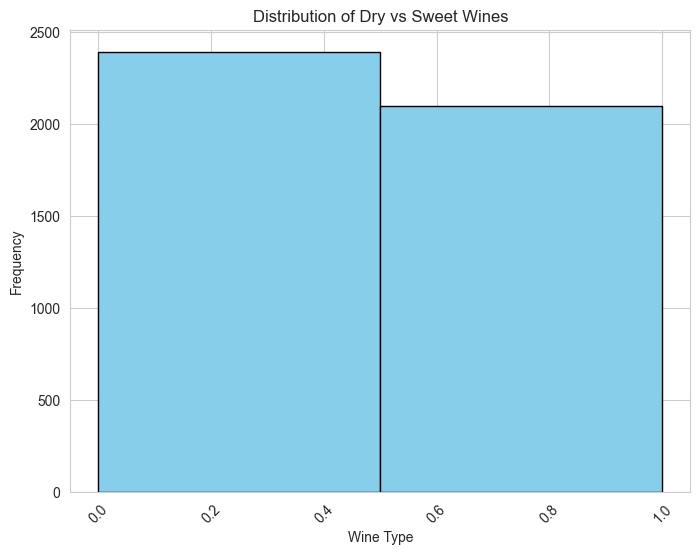

In [ ]:
# Create a histogram for this distribution
plt.figure(figsize=(8, 6))
plt.hist(df_white_filtered['Sweetness'], bins=2, color=['skyblue'], edgecolor='black')
plt.title('Distribution of Dry vs Sweet Wines')
plt.xlabel('Wine Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better visibility
plt.show()

In [ ]:
# Drop residual sugar from the dataset since we have a new binary column to use for prediction

df_white_filtered.drop('residual sugar', axis=1)

fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.0              0.27         0.36      0.045   
1               6.3              0.30         0.34      0.049   
2               8.1              0.28         0.40      0.050   
3               7.2              0.23         0.32      0.058   
4               7.2              0.23         0.32      0.058   
...             ...               ...          ...        ...   
4893            6.2              0.21         0.29      0.039   
4894            6.6              0.32         0.36      0.047   
4895            6.5              0.24         0.19      0.041   
4896            5.5              0.29         0.30      0.022   
4897            6.0              0.21         0.38      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  Sweetness  Body_Type  quality_good_bad  
0         8.8          1          0                 1  
1         9.5          0          0                 1  
2        10.1          1          0                 1  
3         9.9          1          0                 1  
4         9.9          1          0                 1  
...       ...        ...        ...               ...  
4893     11.2          0          1                 1  
4894      9.6          1          0                 0  
4895      9.4          0          0                 1  
4896     12.8          0          2                 1  
4897     11.8          0          1                 1  

[4487 rows x 13 columns]

**Goal 2 WHITE: Classify Wine by Alcohol Level - Light-Bodied, and Full-Bodied**

   alcohol  Body_Type
0      8.8          0
1      9.5          0
2     10.1          0
3      9.9          0
4      9.9          0
5     10.1          0
6      9.6          0
7      8.8          0
8      9.5          0
9     11.0          1


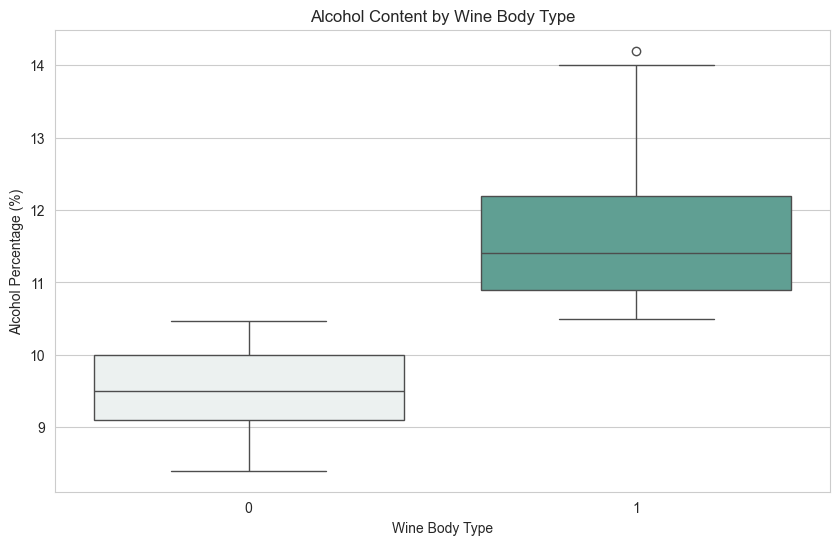

In [ ]:
# Define the classification function based on alcohol content
def classify_wine_by_alcohol(alcohol):

    if alcohol < 10.5: #Light_bodied
        return 0
    else: #Medium_bodied and Full_Bodied
        return 1

df_white_filtered['Body_Type'] = df_white_filtered['alcohol'].apply(classify_wine_by_alcohol)

# updated DataFrame to verify the classification
print(df_white_filtered[['alcohol', 'Body_Type']].head(10))

#Plotting the distribution of wine body types with potential outliers
plt.figure(figsize=(10, 6))

#Create a boxplot to visualize the outliers in alcohol content for each body type
sns.boxplot(x='Body_Type', y='alcohol', data=df_white_filtered, palette='light:#5A9')
plt.title('Alcohol Content by Wine Body Type')
plt.ylabel('Alcohol Percentage (%)')
plt.xlabel('Wine Body Type')

sns.set_style("whitegrid")
plt.show()

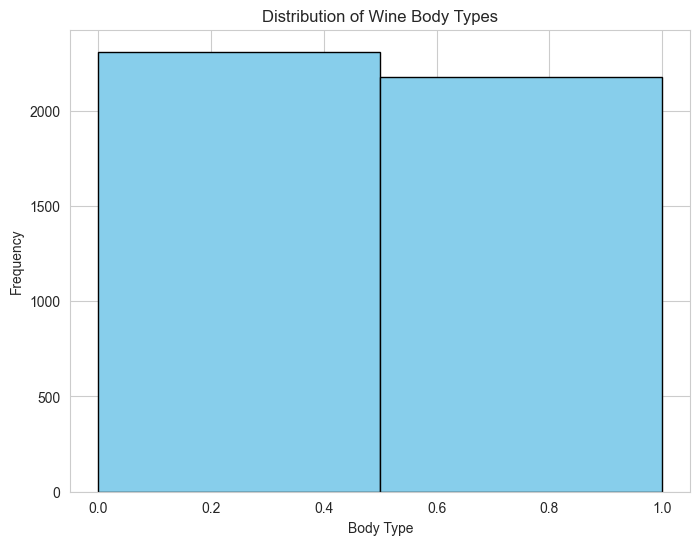

In [ ]:
#classification distribution of body types

plt.figure(figsize=(8, 6))
plt.hist(df_white_filtered['Body_Type'], bins=2, color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Body Types')
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Drop alcohol from the dataset since we have a new binary column to use for prediction

df_red_filtered.drop('alcohol', axis=1)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      Sweetness  Body_Type  quality_good_bad  
0             0          0                 0  
1             1          0                 0  
2             0          0                 0  
3             0          0                 1  
4             0          0                 0  
...         ...        ...               ...  
1594          0          1                 0  
1595          0          1                 1  
1596          0          1                 1  
1597          0          1                 0  
1598          1          1                 1  

[1451 rows x 13 columns]

**Goal 3 WHITE: Classify Wine by Quality - Good and Bad**

In [ ]:
# Determine quality of wine by being good or bad

def classify_wine_by_quality(quality):
    #return "good" if quality > 5 else "bad"
    return 1 if quality > 5 else 0

# Apply classification to the 'quality' column
df_white_filtered['quality_good_bad'] = df_white_filtered['quality'].apply(classify_wine_by_quality)

# Show the updated DataFrame with the new 'quality_binary' column
print(df_white_filtered[['quality', 'quality_good_bad']].head(20))
print(df_white_filtered['quality_good_bad'].value_counts())

    quality  quality_good_bad
0         6                 1
1         6                 1
2         6                 1
3         6                 1
4         6                 1
5         6                 1
6         6                 1
7         6                 1
8         6                 1
9         6                 1
10        5                 0
11        5                 0
12        5                 0
13        7                 1
14        5                 0
15        7                 1
16        6                 1
18        6                 1
19        5                 0
21        7                 1
quality_good_bad
1    3054
0    1433
Name: count, dtype: int64


C:\Users\ck976\AppData\Local\Temp\ipykernel_8304\2982501796.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white_filtered['quality_good_bad'] = df_white_filtered['quality'].apply(classify_wine_by_quality)


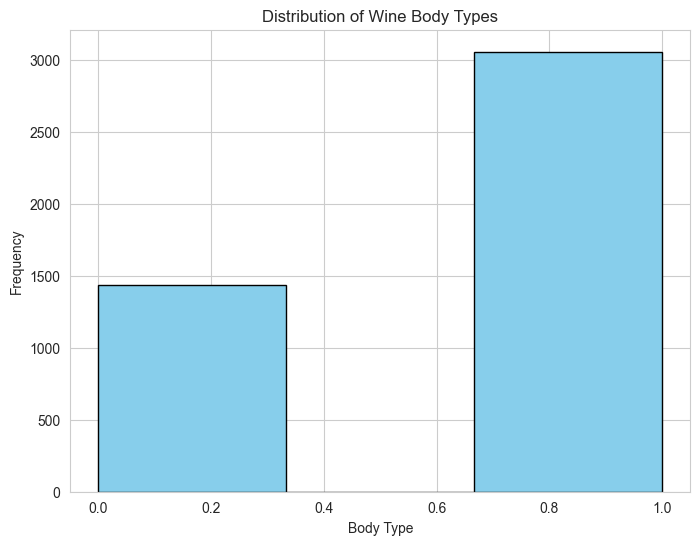

In [ ]:
#classification distribution of body types

plt.figure(figsize=(8, 6))
plt.hist(df_white_filtered['quality_good_bad'], bins=3, color='skyblue', edgecolor='black')
plt.title('Distribution of Wine Body Types')
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Drop quality from the dataset since we have a new binary column to use for prediction

df_white_filtered = df_white_filtered.drop('quality', axis=1)

In [ ]:
df_white_filtered.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  Sweetness  Body_Type  quality_good_bad  
0      8.8          1          0                 1  
1      9.5          0          0                 1  
2     10.1          1          0                 1  
3      9.9          1          0                 1  
4      9.9          1          0                 1

Text(0.5, 0.98, 'Train Data Distribution after Yeo-Johnson Transformation ')

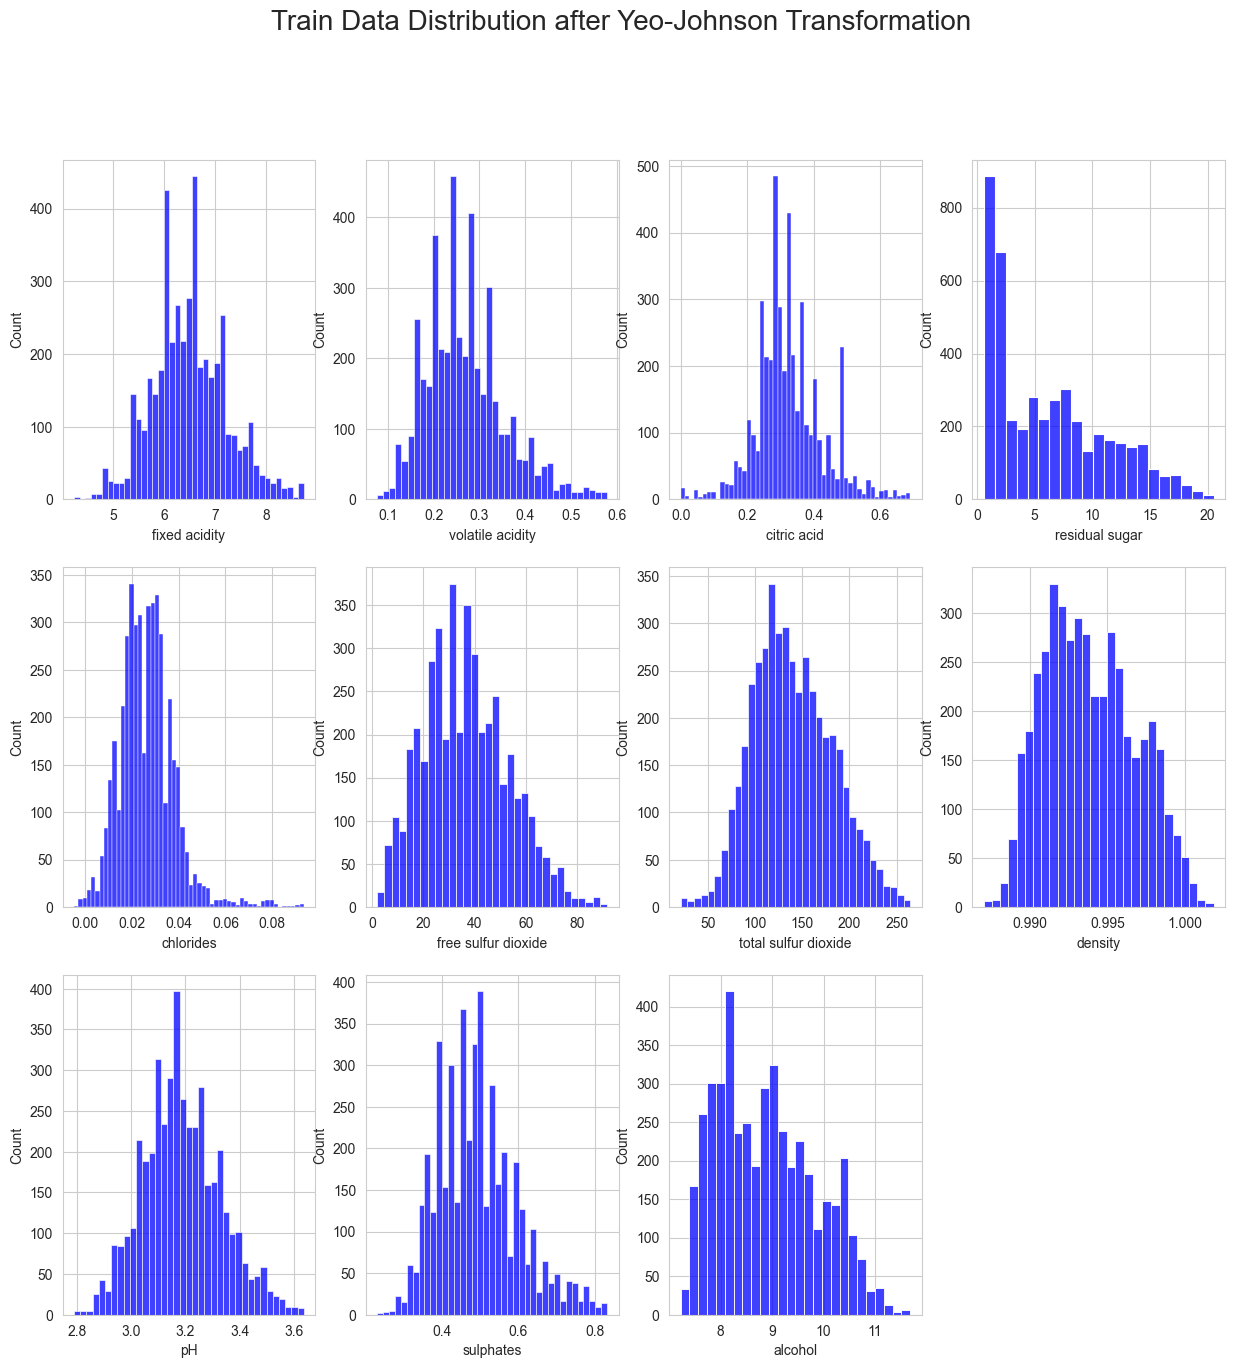

In [ ]:
#Show Yeo-Johnson Transformation distribution to improve skewness in the distribution

from sklearn.preprocessing import PowerTransformer

df_white_transformed = df_white_filtered.drop(['quality_good_bad', 'Sweetness', 'Body_Type'], axis=1)

for i in df_white_transformed.columns:
  power = PowerTransformer(method='yeo-johnson')
  power.fit(df_red_transformed[[i]])
  df_white_transformed[i] = power.transform(df_white_transformed[[i]]).ravel()


#Check the Histogram Distribution
plt.figure(figsize=(15,15))
for i in range(0, len(no_target)):
  plt.subplot(3, 4, i+1)
  ax = sns.histplot(df_white_transformed[no_target[i]], color='blue')
plt.suptitle('Train Data Distribution after Yeo-Johnson Transformation ', fontsize = 20)

In [ ]:
# Concatenate Data Frames to include Sweetness, Body Type, and Quality and transformed data

Sweetness_white = df_white_filtered['Sweetness']
Body_Type_white = df_white_filtered['Body_Type']
quality_good_bad_white = df_white_filtered['quality_good_bad']


# Create a DataFrame for each column
Sweetness_df_white = pd.DataFrame(Sweetness_white, columns=['Sweetness'])
Body_Type_df_white = pd.DataFrame(Body_Type_white, columns=['Body_Type'])
quality_good_bad_df_white = pd.DataFrame(quality_good_bad_white, columns=['quality_good_bad'])

# Concatenate the three columns onto the large DataFrame
df_white_prepped = pd.concat([df_white_transformed, Sweetness_df_white, Body_Type_df_white, quality_good_bad_df_white], axis=1)

# Show the updated DataFrame
df_white_prepped.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       6.632184          0.267289     0.359635       20.417174   0.028252   
1       5.988222          0.297352     0.339628        1.596665   0.032264   
2       7.639527          0.277309     0.399650        6.843696   0.033267   
3       6.815739          0.227214     0.319621        8.422282   0.041293   
4       6.815739          0.227214     0.319621        8.422282   0.041293   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            47.467170            172.649166  1.000891  2.997981   0.459033   
1            14.491167            133.935240  0.993905  3.297588   0.498518   
2            31.431172             98.314114  0.995003  3.257642   0.449156   
3            49.613373            188.959785  0.995502  3.187735   0.409625   
4            49.613373            188.959785  0.995502  3.187735   0.409625   

    alcohol  Sweetness  Body_Type  quality_good_bad  
0  7.539358          1          0                 1  
1  8.087900          0          0                 1  
2  8.554996          1          0                 1  
3  8.399602          1          0                 1  
4  8.399602          1          0                 1

In [ ]:
# Determine Multicollinearity using Variance Inflation Factor (VIF)

#A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.
#Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce
#the statistical significance of the independent variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def Calculate_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

In [ ]:
# Calculate VIF

#A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in
#the structure of the model and selection of independent variables. In this case there are a few high VIF scores, but since there are so few columns we decided to keep all independent variables for use in the model.

vif_score = Calculate_vif(X=df_white_prepped.drop(['quality_good_bad', 'Sweetness', 'Body_Type'], axis=1))
print(vif_score)
more_vif = vif_score[vif_score['VIF'] > 5].sort_values(by='VIF', ascending=False)
print(more_vif)

               variables          VIF
0          fixed acidity   109.292465
1       volatile acidity    12.035110
2            citric acid    13.076601
3         residual sugar     4.185025
4              chlorides     8.489043
5    free sulfur dioxide    10.547973
6   total sulfur dioxide    26.343076
7                density  1170.269041
8                     pH   656.096347
9              sulphates    24.928944
10               alcohol   161.102939
               variables          VIF
7                density  1170.269041
8                     pH   656.096347
10               alcohol   161.102939
0          fixed acidity   109.292465
6   total sulfur dioxide    26.343076
9              sulphates    24.928944
2            citric acid    13.076601
1       volatile acidity    12.035110
5    free sulfur dioxide    10.547973
4              chlorides     8.489043


# ML Algorithms

## Red Wine

##Goal 1: Classify Wine by Sugar Content - Sweet or Dry

In [ ]:
df_red_prepped.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.467878          1.055740    -1.524506       -0.610683  -0.145035   
1      -0.170805          1.919750    -1.524506        0.649155   0.986838   
2      -0.170805          1.357067    -1.245434        0.207601   0.718578   
3       1.573404         -1.556675     1.444056       -0.610683  -0.207213   
4      -0.467878          1.055740    -1.524506       -0.610683  -0.145035   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.241492             -0.066536  0.640791  1.360860  -0.589657   
1             1.091561              0.952517  0.061011 -0.816507   0.451524   
2             0.238587              0.624244  0.177435 -0.380977   0.220005   
3             0.440493              0.784119  0.756049 -1.110847  -0.393177   
4            -0.241492             -0.066536  0.640791  1.360860  -0.589657   

    alcohol  Sweetness  Body_Type  quality_good_bad  
0 -1.120424          0          0                 0  
1 -0.530340          1          0                 0  
2 -0.530340          0          0                 0  
3 -0.530340          0          0                 1  
4 -1.120424          0          0                 0

In [ ]:
# Set up Train and Test for quality classification to determine if the target label is balanced or not

y_sweetness = df_red_prepped['Sweetness']
X_sweetness = df_red_prepped.drop(['quality_good_bad', 'Sweetness', 'Body_Type', 'residual sugar'], axis=1)

X_train_sweet, X_test_sweet, y_train_sweet, y_test_sweet = train_test_split(X_sweetness, y_sweetness, stratify=y_sweetness, test_size=0.25, random_state=42)

# how imbalanced the data is
print(np.bincount(y_train_sweet),np.bincount(y_test_sweet))

print(X_train_sweet.shape)
print(X_test_sweet.shape)
print(y_train_sweet.shape)
print(y_test_sweet.shape)

[809 279] [270  93]
(1088, 10)
(363, 10)
(1088,)
(363,)


In [ ]:
#Setting up Pipeline Transformer and Preprocessor

# Identify columns for preprocessing
cols_sweet = [col for col in df_red_prepped.columns if col not in ['quality_good_bad', 'Sweetness', 'Body_Type', 'residual sugar']]

# Define and scale the preprocessing for numerical columns
transformer_sweet = Pipeline(steps=[('scaler', StandardScaler())])

# Combine preprocessor for numerical data
preprocessor_sweet = ColumnTransformer(transformers=[('num', transformer_sweet, cols_sweet)])

In [ ]:
#Setting up Pipeline and fitting the pipeline

# Pipeline for Random Forest
rf_pipeline_sweet = Pipeline(steps=[
    ('preprocessor', preprocessor_sweet),
    ('model', RandomForestClassifier(max_depth=2, n_estimators=30, min_samples_split=3, max_leaf_nodes=5, random_state=42))
])

# Pipeline for Gradient Boosting Classifier
gb_pipeline_sweet = Pipeline(steps=[
    ('preprocessor', preprocessor_sweet),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Pipeline for XGBoost Classifier
xg_pipeline_sweet = Pipeline(steps=[
    ('preprocessor', preprocessor_sweet),
    ('model', XGBClassifier(objective='binary:logistic', max_depth=3, eta=0.3, subsample=0.8,
                            colsample_bytree=0.8, gamma=0.1, reg_lambda=1, reg_alpha=0, random_state=42))
])

# Train the Random Forest model
rf_pipeline_sweet.fit(X_train_sweet, y_train_sweet)

# Train the Gradient Boosting model
gb_pipeline_sweet.fit(X_train_sweet, y_train_sweet)

# Train the XGBoost model
xg_pipeline_sweet.fit(X_train_sweet, y_train_sweet)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid', 'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, c...
                               eval_metric=None, feature_types=None, gamma=0.1,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
# Predictions with Random Forest
rf_train_pred_sweet = rf_pipeline_sweet.predict(X_train_sweet)
rf_preds_sweet = rf_pipeline_sweet.predict(X_test_sweet)

# Predictions with Gradient Boosting
gb_train_pred_sweet = gb_pipeline_sweet.predict(X_train_sweet)
gb_preds_sweet = gb_pipeline_sweet.predict(X_test_sweet)

# Predictions with XGBoost
xg_train_pred_sweet = xg_pipeline_sweet.predict(X_train_sweet)
xg_preds_sweet = xg_pipeline_sweet.predict(X_test_sweet)

# Calculate train accuracy
train_accuracy_rf_sweet = accuracy_score(y_train_sweet, rf_train_pred_sweet)
accuracy_rf_sweet = accuracy_score(y_test_sweet, rf_preds_sweet)
train_accuracy_gb_sweet = accuracy_score(y_train_sweet, gb_train_pred_sweet)
accuracy_gb_sweet = accuracy_score(y_test_sweet, gb_preds_sweet)
train_accuracy_xg_sweet = accuracy_score(y_train_sweet, xg_train_pred_sweet)
accuracy_xg_sweet = accuracy_score(y_test_sweet, xg_preds_sweet)

# Define the scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score),
    'precision': make_scorer(precision_score),
    'train_accuracy': make_scorer(accuracy_score, greater_is_better=True)
}

# Evaluate Random Forest pipeline performance using cross-validation
cv_results_rf_sweet = cross_validate(rf_pipeline_sweet, X_train_sweet, y_train_sweet, cv=10, scoring=scoring)

# Evaluate Gradient Boosting pipeline performance using cross-validation
cv_results_gb_sweet = cross_validate(gb_pipeline_sweet, X_train_sweet, y_train_sweet, cv=10, scoring=scoring)

# Evaluate XGBoost pipeline performance using cross-validation
cv_results_xg_sweet = cross_validate(xg_pipeline_sweet, X_train_sweet, y_train_sweet, cv=10, scoring=scoring)


# Print mean cross-validated scores for Random Forest
print("Random Forest:")
print("Mean Cross-Validation Accuracy:", cv_results_rf_sweet['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_rf_sweet)
print("Mean Cross-Validation AUC:", cv_results_rf_sweet['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_rf_sweet['test_precision'].mean())

# Print mean cross-validated scores for Gradient Boosting
print("\nGradient Boosting:")
print("Mean Cross-Validation Accuracy:", cv_results_gb_sweet['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_gb_sweet)
print("Mean Cross-Validation AUC:", cv_results_gb_sweet['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_gb_sweet['test_precision'].mean())

# Print mean cross-validated scores for XGBoost
print("\nXGBoost:")
print("Mean Cross-Validation Accuracy:", cv_results_xg_sweet['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_xg_sweet)
print("Mean Cross-Validation AUC:", cv_results_xg_sweet['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_xg_sweet['test_precision'].mean())

Random Forest:
Mean Cross-Validation Accuracy: 0.7730122324159023
Train Accuracy: 0.7794117647058824
Mean Cross-Validation AUC: 0.5691501322751323
Mean Cross-Validation Precision: 0.8051587301587301

Gradient Boosting:
Mean Cross-Validation Accuracy: 0.8483435270132518
Train Accuracy: 0.9227941176470589
Mean Cross-Validation AUC: 0.7549151234567901
Mean Cross-Validation Precision: 0.7882500454481879

XGBoost:
Mean Cross-Validation Accuracy: 0.856651376146789
Train Accuracy: 0.9852941176470589
Mean Cross-Validation AUC: 0.7908421516754849
Mean Cross-Validation Precision: 0.7549600665035447


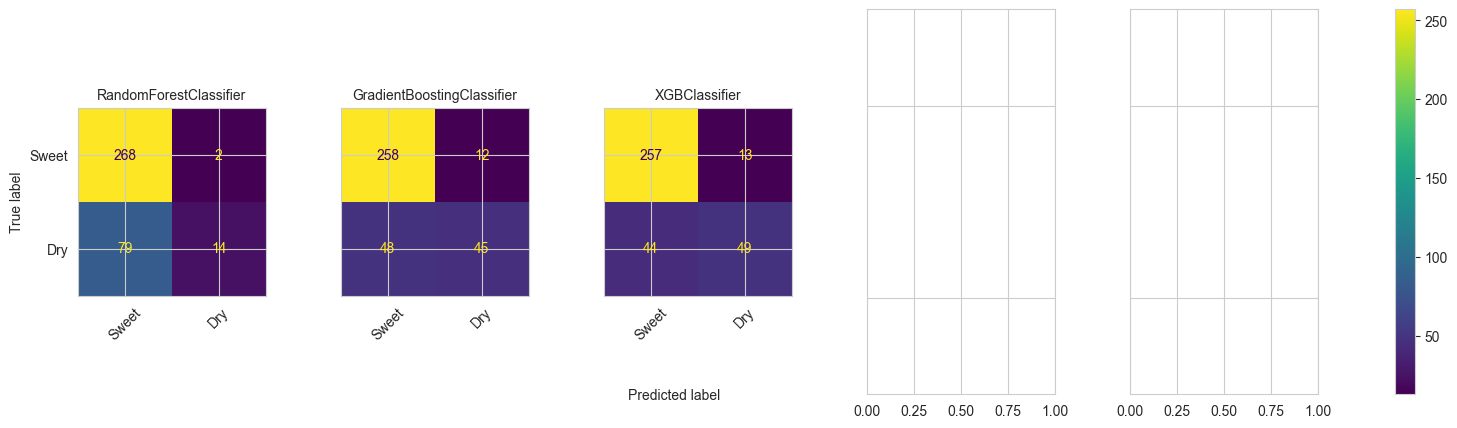

In [ ]:
# Confusion Matrix

# creating a class list
Class_cat = ['Sweet','Dry']

classifiers = {
    "RandomForestClassifier": RandomForestClassifier(max_depth=2, n_estimators=30,
                              min_samples_split=3, max_leaf_nodes=5, random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(objective='multi:softmax', num_class=3,
                                                      max_depth=3, eta=0.3, subsample=0.8,
                                                      colsample_bytree=0.8, gamma=0.1,
                                                      reg_lambda=1, reg_alpha=0),
}

f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train_sweet, y_train_sweet).predict(X_test_sweet)
    cf_matrix = confusion_matrix(y_test_sweet, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=Class_cat)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key, fontsize=10)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.4)


f.colorbar(disp.im_, ax=axes)
plt.show()



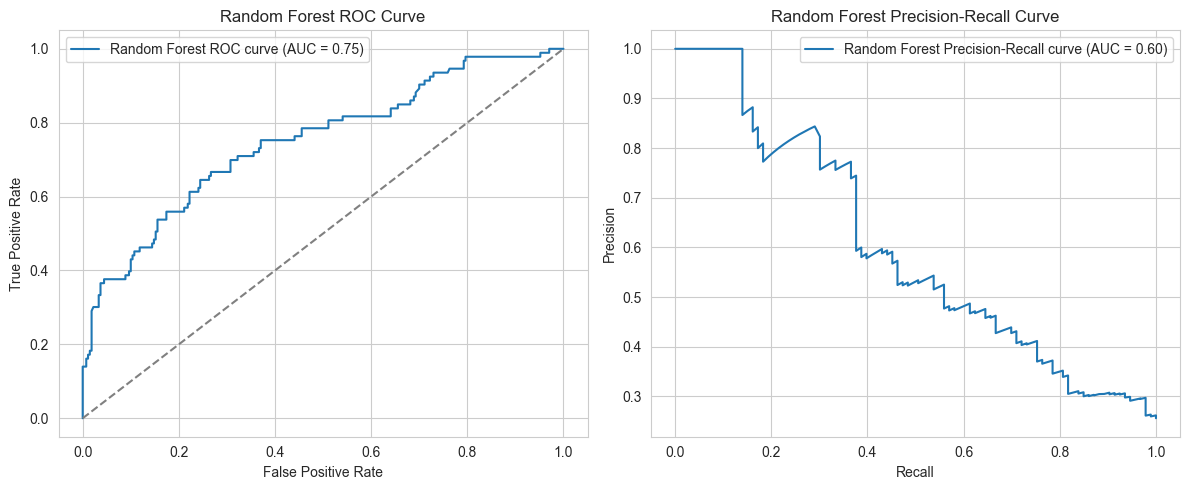

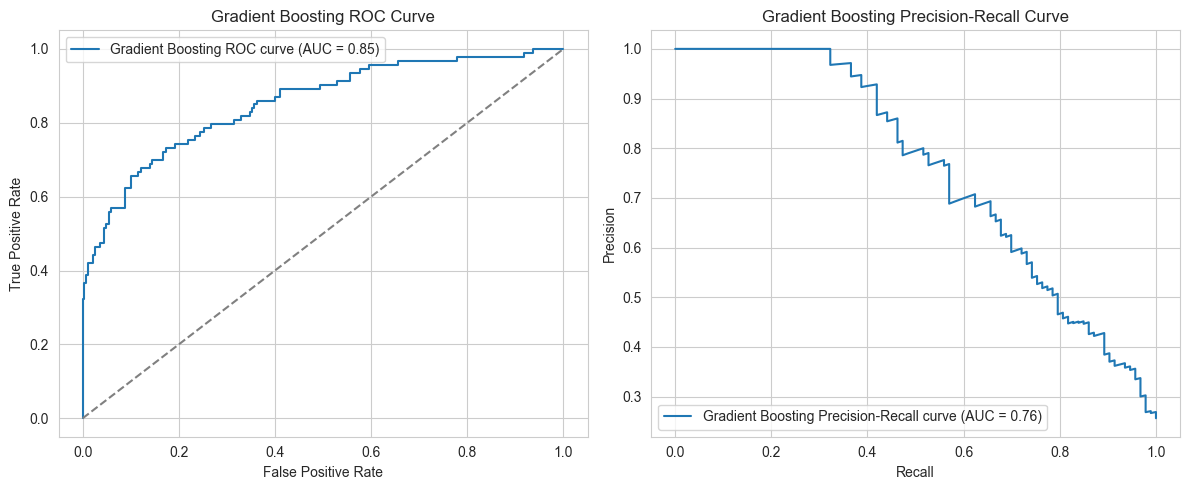

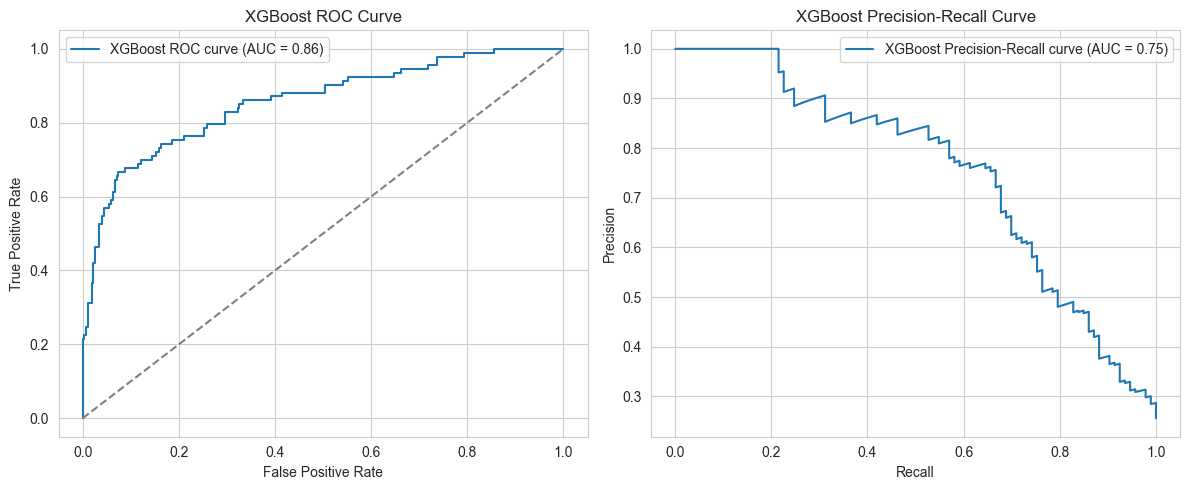

In [ ]:
# Define a function to plot ROC curve and Precision-Recall curve

def plot_roc_and_pr_curves(model, X_test_sweet, y_test_sweet, classifier_name):
    plt.figure(figsize=(12, 5))

    # ROC curve
    plt.subplot(1, 2, 1)
    fpr, tpr, thresholds = roc_curve(y_test_sweet, model.predict_proba(X_test_sweet)[:, 1])
    auc_score = roc_auc_score(y_test_sweet, model.predict_proba(X_test_sweet)[:, 1])
    plt.plot(fpr, tpr, label='{} ROC curve (AUC = {:.2f})'.format(classifier_name, auc_score))
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC Curve'.format(classifier_name))
    plt.legend()

    # Precision-Recall curve
    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_test_sweet, model.predict_proba(X_test_sweet)[:, 1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label='{} Precision-Recall curve (AUC = {:.2f})'.format(classifier_name, pr_auc))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('{} Precision-Recall Curve'.format(classifier_name))
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot ROC curve and Precision-Recall curve for Random Forest
plot_roc_and_pr_curves(rf_pipeline_sweet, X_test_sweet, y_test_sweet, "Random Forest")

# Plot ROC curve and Precision-Recall curve for Gradient Boosting
plot_roc_and_pr_curves(gb_pipeline_sweet, X_test_sweet, y_test_sweet, "Gradient Boosting")

# Plot ROC curve and Precision-Recall curve for XGBoost
plot_roc_and_pr_curves(xg_pipeline_sweet, X_test_sweet, y_test_sweet, "XGBoost")

In [ ]:
# Define hyperparameter grids for each model with class weight options and determine best parameters and scores for each model

param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__class_weight': [None, 'balanced', {0: 1, 1: 2}]  # Options: None, 'balanced', or custom
}

param_grid_gb = {
    'model__max_depth': [3, 6, 9],
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 0.9, 1.0]  # Adjust subsample to control for class imbalance
}

param_grid_xg = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__scale_pos_weight': [1, 2]  # For XGBoost, scale_pos_weight is used for class imbalance
}

#roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True, average='weighted')

# Perform grid search for each model
grid_search_rf = GridSearchCV(rf_pipeline_sweet, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_gb = GridSearchCV(gb_pipeline_sweet, param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_xg = GridSearchCV(xg_pipeline_sweet, param_grid_xg, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search objects
grid_search_rf.fit(X_train_sweet, y_train_sweet)
grid_search_gb.fit(X_train_sweet, y_train_sweet)
grid_search_xg.fit(X_train_sweet, y_train_sweet)

# Print the best parameters and score for each model
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Best Score:", grid_search_rf.best_score_)

print("Gradient Boosting Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting Best Score:", grid_search_gb.best_score_)

print("XGBoost Best Parameters:", grid_search_xg.best_params_)
print("XGBoost Best Score:", grid_search_xg.best_score_)

Random Forest Best Parameters: {'model__class_weight': {0: 1, 1: 2}, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_split': 10, 'model__n_estimators': 100}
Random Forest Best Score: 0.9358044578971902
Gradient Boosting Best Parameters: {'model__learning_rate': 0.2, 'model__max_depth': 9, 'model__n_estimators': 200, 'model__subsample': 0.8}
Gradient Boosting Best Score: 0.9928356660623312
XGBoost Best Parameters: {'model__learning_rate': 0.2, 'model__n_estimators': 200, 'model__scale_pos_weight': 1}
XGBoost Best Score: 0.9628528974739969


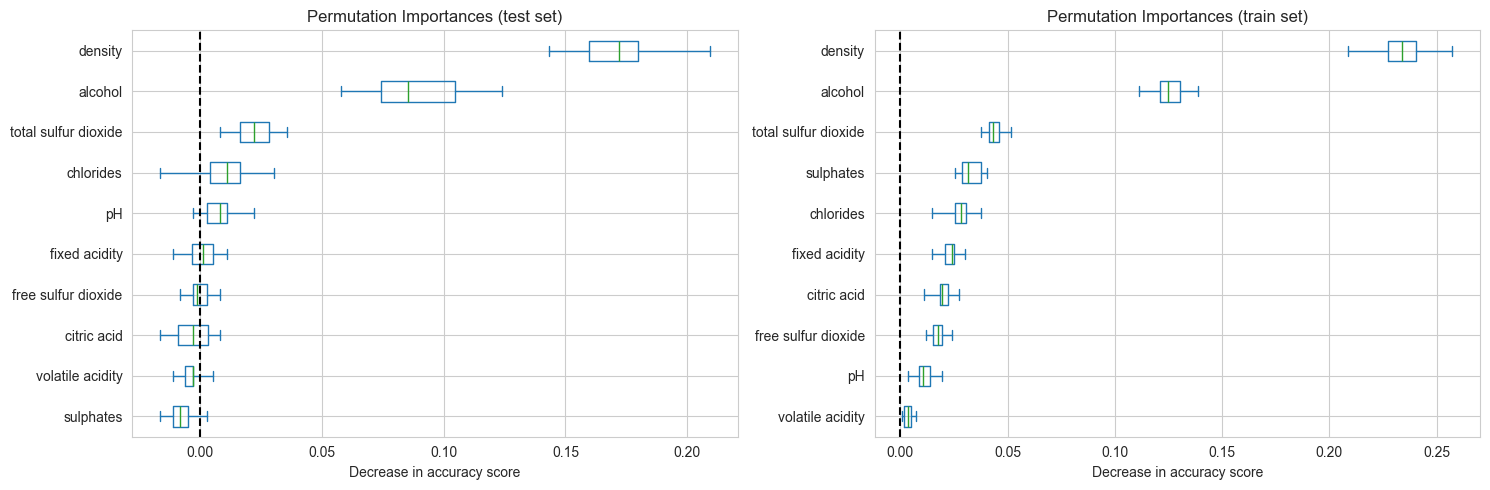

In [ ]:
# Determine Feature Importance using Permutation Importance using Gradient Boosting Classifier since the model had the best performance
# Plot the permutation importance

y_sweetness = df_red_prepped['Sweetness']
X_sweetness = df_red_prepped.drop(['quality_good_bad', 'Sweetness', 'Body_Type', 'residual sugar'], axis=1)

X_train_sweet, X_test_sweet, y_train_sweet, y_test_sweet = train_test_split(X_sweetness, y_sweetness, stratify=y_sweetness, test_size=0.25, random_state=42)

# Identify columns for preprocessing
cols_sweet = [col for col in df_red_prepped.columns if col not in ['quality_good_bad', 'Sweetness', 'Body_Type', 'residual sugar']]


#define and scale the preprocessing for numerical cols
transformer_sweet = Pipeline(steps=[
    ('scaler', StandardScaler())])

#Combine preprocessor for numerical and categorical data
preprocessor_sweet = ColumnTransformer(transformers=[
    ('col', transformer_sweet, cols_sweet)])

# Pipeline for Gradient Boosting Classifier
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor_sweet),
                              ('model', GradientBoostingClassifier(random_state=42))])

#calculate permutation importance for test data
gb = gb_pipeline.fit(X_train_sweet, y_train_sweet)
result_test = permutation_importance(
    gb, X_test_sweet, y_test_sweet, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_test = result_test.importances_mean.argsort()
importances_test = pd.DataFrame(
    result_test.importances[sorted_importances_idx_test].T,
    columns=X_sweetness.columns[sorted_importances_idx_test],
)

#calculate permutation importance for training data
result_train = permutation_importance(
    gb, X_train_sweet, y_train_sweet, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_train = result_train.importances_mean.argsort()
importances_train = pd.DataFrame(
    result_train.importances[sorted_importances_idx_train].T,
    columns=X_sweetness.columns[sorted_importances_idx_train],
)

f, axs = plt.subplots(1,2,figsize=(15,5))

importances_test.plot.box(vert=False, whis=10, ax = axs[0])
axs[0].set_title("Permutation Importances (test set)")
axs[0].axvline(x=0, color="k", linestyle="--")
axs[0].set_xlabel("Decrease in accuracy score")
axs[0].figure.tight_layout()

importances_train.plot.box(vert=False, whis=10, ax = axs[1])
axs[1].set_title("Permutation Importances (train set)")
axs[1].axvline(x=0, color="k", linestyle="--")
axs[1].set_xlabel("Decrease in accuracy score")
axs[1].figure.tight_layout()

##Goal 2: Classify Wine by Alcohol Level - Light-Bodied and Full-Bodied

In [ ]:
df_red_prepped.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.467878          1.055740    -1.524506       -0.610683  -0.145035   
1      -0.170805          1.919750    -1.524506        0.649155   0.986838   
2      -0.170805          1.357067    -1.245434        0.207601   0.718578   
3       1.573404         -1.556675     1.444056       -0.610683  -0.207213   
4      -0.467878          1.055740    -1.524506       -0.610683  -0.145035   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.241492             -0.066536  0.640791  1.360860  -0.589657   
1             1.091561              0.952517  0.061011 -0.816507   0.451524   
2             0.238587              0.624244  0.177435 -0.380977   0.220005   
3             0.440493              0.784119  0.756049 -1.110847  -0.393177   
4            -0.241492             -0.066536  0.640791  1.360860  -0.589657   

    alcohol  Sweetness  Body_Type  quality_good_bad  
0 -1.120424          0          0                 0  
1 -0.530340          1          0                 0  
2 -0.530340          0          0                 0  
3 -0.530340          0          0                 1  
4 -1.120424          0          0                 0

In [ ]:
# Set up Train and Test for quality classification to determine if the target label is balanced or not

y = df_red_prepped['Body_Type']
X = df_red_prepped.drop(['quality_good_bad', 'Sweetness', 'Body_Type', 'alcohol'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# how imbalanced the data is
print(np.bincount(y_train),np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[454 634] [151 212]
(1088, 10)
(363, 10)
(1088,)
(363,)


In [ ]:
#Setting up Pipeline Transformer and Preprocessor

# Identify columns in df_transformed dataframe, excluding 'income_binary'
cols = [col for col in df_red_prepped.columns if col not in ['quality_good_bad', 'Sweetness', 'Body_Type', 'alcohol']]

# Define and scale the preprocessing for numerical columns
transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', transformer, cols)])

In [ ]:
#Setting up Pipeline and fitting the pipeline

# Pipeline for Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), #Added multiple parameters to prevent overfitting
                              ('model', RandomForestClassifier(max_depth=2, n_estimators=30,
                              min_samples_split=3, max_leaf_nodes=5, random_state=42))])

# Pipeline for Gradient Boosting Classifier
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', GradientBoostingClassifier(random_state=42))])

# Pipeline for XGBoost Classifier
xg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), #Added multiple parameters to prevent overfitting
                              ('model', XGBClassifier(objective='multi:softmax', num_class=3,
                                                      max_depth=3, eta=0.3, subsample=0.8,
                                                      colsample_bytree=0.8, gamma=0.1,
                                                      reg_lambda=1, reg_alpha=0))])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Train the Decision Tree model
gb_pipeline.fit(X_train, y_train)

# Train the KNeighbors model
xg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH',
                                                   'sulphates'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=...
                               eval_metric=None, feature_types=None, gamma=0.1,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, num_class=3, ...))])

In [ ]:
# Predictions with Random Forest
rf_train_pred=rf_pipeline.predict(X_train)
rf_preds = rf_pipeline.predict(X_test)

# Predictions with Decision Tree
gb_train_pred=gb_pipeline.predict(X_train)
gb_preds = gb_pipeline.predict(X_test)

# Predictions with KNeighbors
xg_train_pred=xg_pipeline.predict(X_train)
xg_preds = xg_pipeline.predict(X_test)

# Calculate train accuracy
train_accuracy_rf = accuracy_score(y_train, rf_train_pred)
accuracy_rf = accuracy_score(y_test,rf_preds)
train_accuracy_gb = accuracy_score(y_train, gb_train_pred)
accuracy_gb = accuracy_score(y_test,gb_preds)
train_accuracy_xg = accuracy_score(y_train, xg_train_pred)
accuracy_xg = accuracy_score(y_test,xg_preds)

# Define the scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score),
    'precision': make_scorer(precision_score),
    'train_accuracy': make_scorer(accuracy_score, greater_is_better=True)
}

# Suppress warnings
warnings.filterwarnings("ignore")

# Evaluate Random Forest pipeline performance using cross-validation
cv_results_rf = cross_validate(rf_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Evaluate Gradient Boosting pipeline performance using cross-validation
cv_results_gb = cross_validate(gb_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Evaluate XG Boost pipeline performance using cross-validation
cv_results_xg = cross_validate(xg_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Print mean cross-validated scores for Random Forest
print("Random Forest:")
print("Mean Cross-Validation Accuracy:", cv_results_rf['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_rf)
print("Mean Cross-Validation AUC:", cv_results_rf['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_rf['test_precision'].mean())

# Print mean cross-validated scores for Gradient Boosting
print("\nGradient Boosting:")
print("Mean Cross-Validation Accuracy:", cv_results_gb['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_gb)
print("Mean Cross-Validation AUC:", cv_results_gb['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_gb['test_precision'].mean())

# Print mean cross-validated scores for XGBoost
print("\nXGBoost:")
print("Mean Cross-Validation Accuracy:", cv_results_xg['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_xg)
print("Mean Cross-Validation AUC:", cv_results_xg['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_xg['test_precision'].mean())

Random Forest:
Mean Cross-Validation Accuracy: 0.758188922867822
Train Accuracy: 0.7738970588235294
Mean Cross-Validation AUC: 0.7422038906142168
Mean Cross-Validation Precision: 0.7682775562989133

Gradient Boosting:
Mean Cross-Validation Accuracy: 0.8427624872579
Train Accuracy: 0.9439338235294118
Mean Cross-Validation AUC: 0.8377639751552796
Mean Cross-Validation Precision: 0.8635346464136806

XGBoost:
Mean Cross-Validation Accuracy: 0.8547400611620795
Train Accuracy: 0.9963235294117647
Mean Cross-Validation AUC: 0.8514527260179434
Mean Cross-Validation Precision: 0.879352001385304


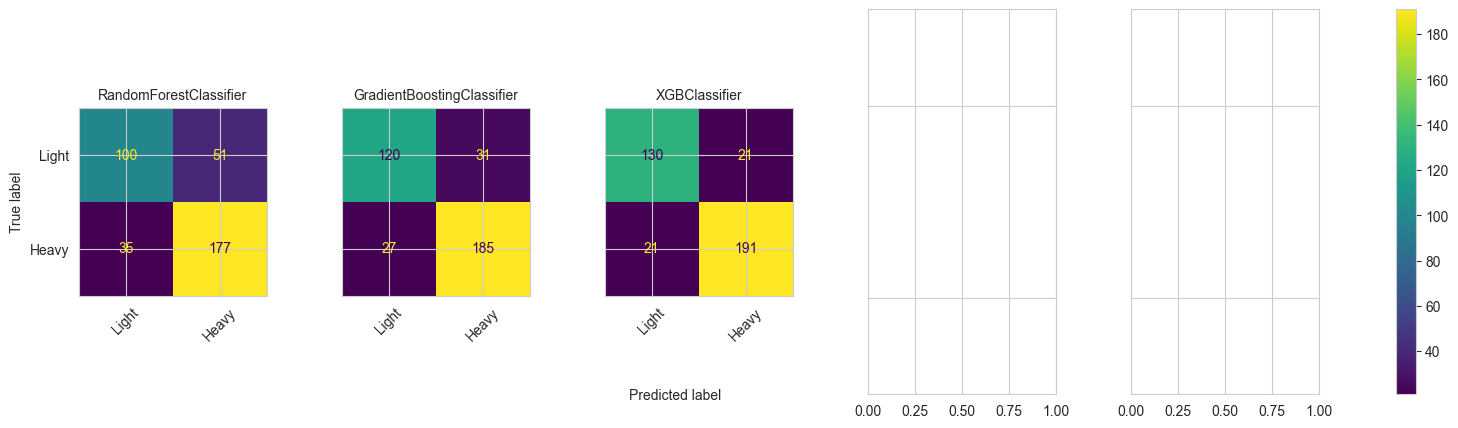

In [ ]:
#Plotting Confusion Matrices

# creating a class list
Class_cat = ['Light','Heavy']

classifiers = {
    "RandomForestClassifier": RandomForestClassifier(max_depth=2, n_estimators=30,
                              min_samples_split=3, max_leaf_nodes=5, random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(objective='multi:softmax', num_class=3,
                                                      max_depth=3, eta=0.3, subsample=0.8,
                                                      colsample_bytree=0.8, gamma=0.1,
                                                      reg_lambda=1, reg_alpha=0),
}

f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=Class_cat)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key, fontsize=10)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.4)


f.colorbar(disp.im_, ax=axes)
plt.show()

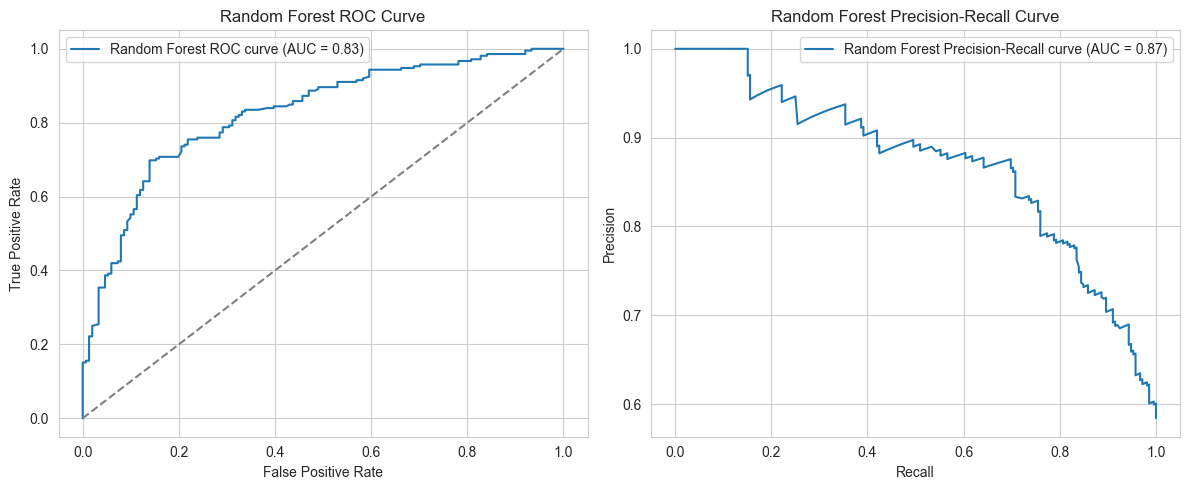

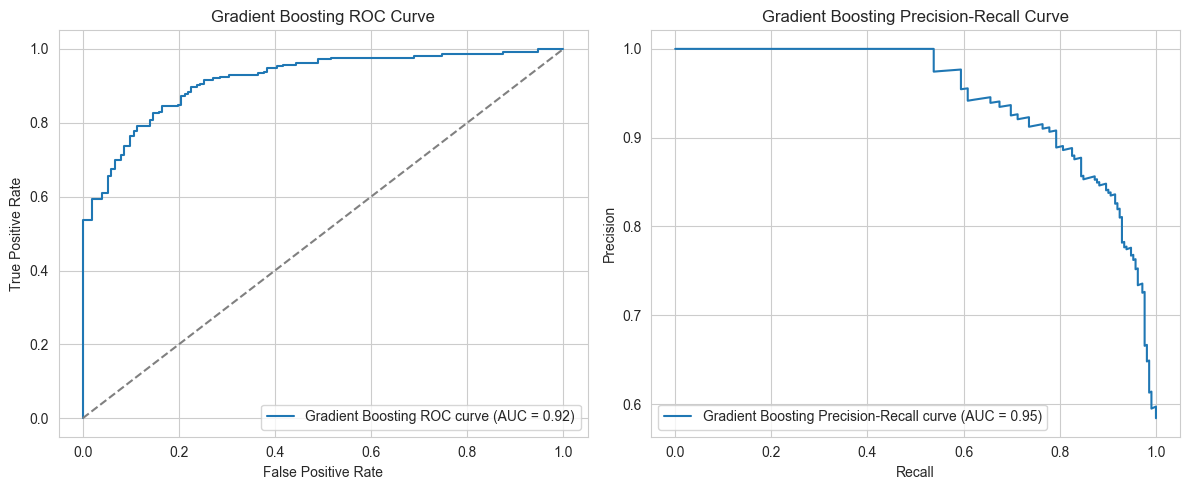

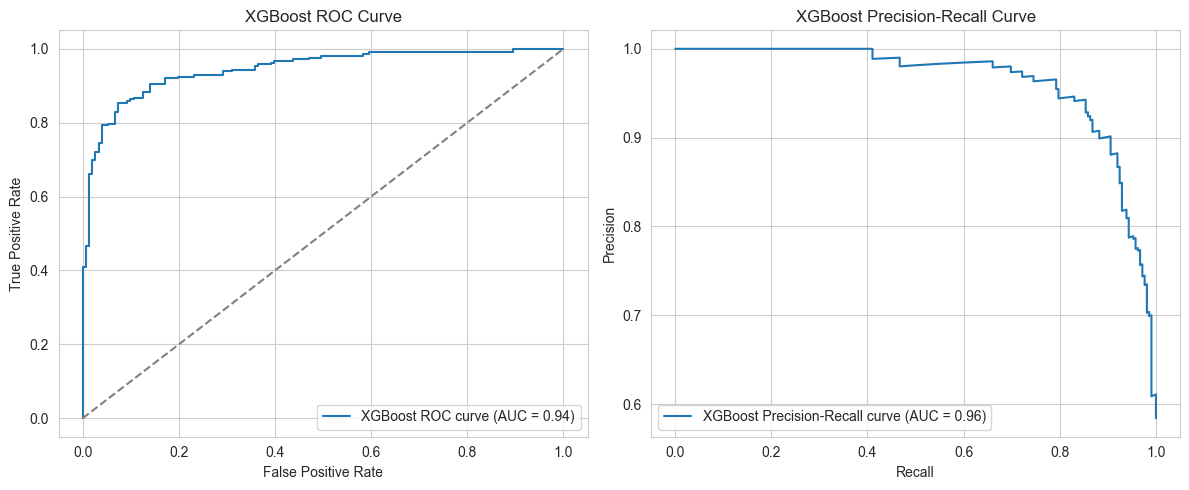

In [ ]:
# Define a function to plot ROC curve and Precision-Recall curve

def plot_roc_and_pr_curves(model, X_test, y_test, classifier_name):
    plt.figure(figsize=(12, 5))

    # ROC curve
    plt.subplot(1, 2, 1)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label='{} ROC curve (AUC = {:.2f})'.format(classifier_name, auc_score))
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC Curve'.format(classifier_name))
    plt.legend()

    # Precision-Recall curve
    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label='{} Precision-Recall curve (AUC = {:.2f})'.format(classifier_name, pr_auc))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('{} Precision-Recall Curve'.format(classifier_name))
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot ROC curve and Precision-Recall curve for Random Forest
plot_roc_and_pr_curves(rf_pipeline, X_test, y_test, "Random Forest")

# Plot ROC curve and Precision-Recall curve for Gradient Boosting
plot_roc_and_pr_curves(gb_pipeline, X_test, y_test, "Gradient Boosting")

# Plot ROC curve and Precision-Recall curve for XGBoost
plot_roc_and_pr_curves(xg_pipeline, X_test, y_test, "XGBoost")

In [ ]:
# Define hyperparameter grids for each model with class weight options and determine best parameters and scores for each model

param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__class_weight': [None, 'balanced', {0: 1, 1: 2}]  # Options: None, 'balanced', or custom
}

param_grid_gb = {
    'model__max_depth': [3, 6, 9],
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 0.9, 1.0]  # Adjust subsample to control for class imbalance
}

param_grid_xg = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__scale_pos_weight': [1, 2]  # For XGBoost, scale_pos_weight is used for class imbalance
}

#roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True, average='weighted')

# Perform grid search for each model
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_xg = GridSearchCV(xg_pipeline, param_grid_xg, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search objects
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)
grid_search_xg.fit(X_train, y_train)

# Print the best parameters and score for each model
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Best Score:", grid_search_rf.best_score_)

print("Gradient Boosting Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting Best Score:", grid_search_gb.best_score_)

print("XGBoost Best Parameters:", grid_search_xg.best_params_)
print("XGBoost Best Score:", grid_search_xg.best_score_)

Random Forest Best Parameters: {'model__class_weight': {0: 1, 1: 2}, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_split': 2, 'model__n_estimators': 50}
Random Forest Best Score: 0.8509454862098282
Gradient Boosting Best Parameters: {'model__learning_rate': 0.2, 'model__max_depth': 9, 'model__n_estimators': 200, 'model__subsample': 0.9}
Gradient Boosting Best Score: 0.940402147533756
XGBoost Best Parameters: {'model__learning_rate': 0.2, 'model__n_estimators': 200, 'model__scale_pos_weight': 1}
XGBoost Best Score: 0.8629898955735001


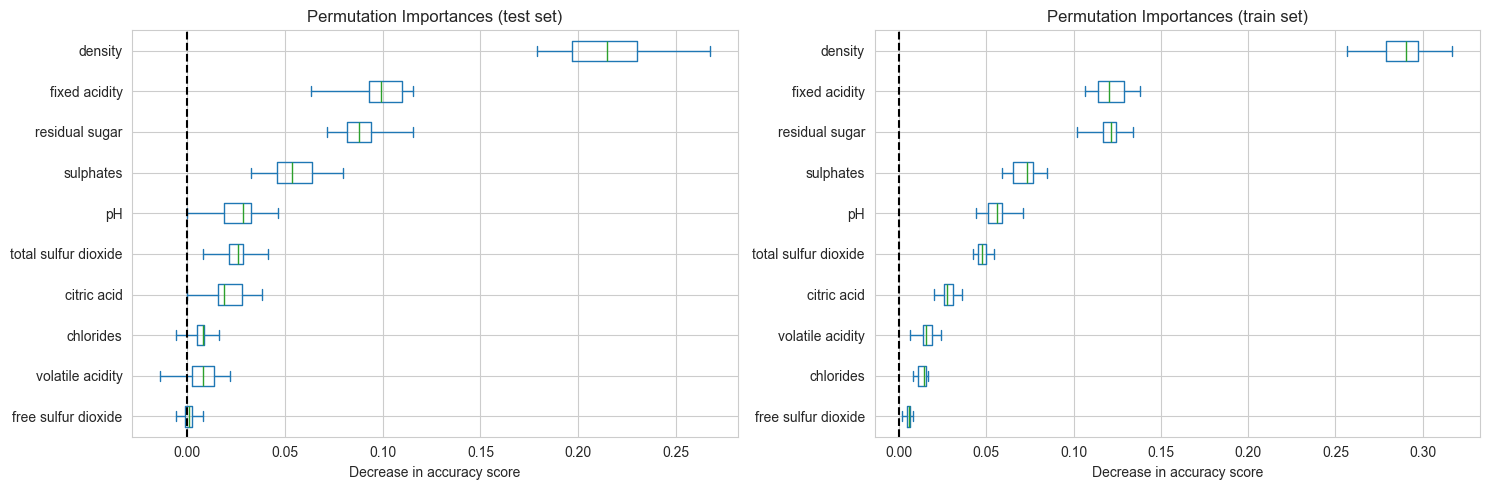

In [ ]:
# Determine Feature Importance using Permutation Importance using Gradient Boosting Classifier since the model had the best performance
# Plot the permutation importance

y = df_red_prepped['Body_Type']
X = df_red_prepped.drop(['quality_good_bad', 'Sweetness', 'Body_Type', 'alcohol'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Identify columns in df_transformed dataframe, excluding 'income_binary'
cols = [col for col in df_red_prepped.columns if col not in ['quality_good_bad', 'Sweetness', 'Body_Type', 'alcohol']]


#define and scale the preprocessing for numerical cols
transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

#Combine preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('col', transformer, cols)])

# Pipeline for Gradient Boosting Classifier
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', GradientBoostingClassifier(random_state=42))])

#calculate permutation importance for test data
gb = gb_pipeline.fit(X_train, y_train)
result_test = permutation_importance(
    gb, X_test, y_test, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_test = result_test.importances_mean.argsort()
importances_test = pd.DataFrame(
    result_test.importances[sorted_importances_idx_test].T,
    columns=X.columns[sorted_importances_idx_test],
)

#calculate permutation importance for training data
result_train = permutation_importance(
    gb, X_train, y_train, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_train = result_train.importances_mean.argsort()
importances_train = pd.DataFrame(
    result_train.importances[sorted_importances_idx_train].T,
    columns=X.columns[sorted_importances_idx_train],
)

f, axs = plt.subplots(1,2,figsize=(15,5))

importances_test.plot.box(vert=False, whis=10, ax = axs[0])
axs[0].set_title("Permutation Importances (test set)")
axs[0].axvline(x=0, color="k", linestyle="--")
axs[0].set_xlabel("Decrease in accuracy score")
axs[0].figure.tight_layout()

importances_train.plot.box(vert=False, whis=10, ax = axs[1])
axs[1].set_title("Permutation Importances (train set)")
axs[1].axvline(x=0, color="k", linestyle="--")
axs[1].set_xlabel("Decrease in accuracy score")
axs[1].figure.tight_layout()

##Goal 3: Classify Wine by Quality - Good and Bad

In [ ]:
df_red_prepped.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.467878          1.055740    -1.524506       -0.610683  -0.145035   
1      -0.170805          1.919750    -1.524506        0.649155   0.986838   
2      -0.170805          1.357067    -1.245434        0.207601   0.718578   
3       1.573404         -1.556675     1.444056       -0.610683  -0.207213   
4      -0.467878          1.055740    -1.524506       -0.610683  -0.145035   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.241492             -0.066536  0.640791  1.360860  -0.589657   
1             1.091561              0.952517  0.061011 -0.816507   0.451524   
2             0.238587              0.624244  0.177435 -0.380977   0.220005   
3             0.440493              0.784119  0.756049 -1.110847  -0.393177   
4            -0.241492             -0.066536  0.640791  1.360860  -0.589657   

    alcohol  Sweetness  Body_Type  quality_good_bad  
0 -1.120424          0          0                 0  
1 -0.530340          1          0                 0  
2 -0.530340          0          0                 0  
3 -0.530340          0          0                 1  
4 -1.120424          0          0                 0

In [ ]:
# Set up Train and Test for quality classification to determine if the target label is balanced or not

y = df_red_prepped['quality_good_bad']
X = df_red_prepped.drop(['quality_good_bad', 'Sweetness', 'Body_Type'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# how imbalanced the data is
print(np.bincount(y_train),np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[498 590] [166 197]
(1088, 11)
(363, 11)
(1088,)
(363,)


In [ ]:
#Setting up Pipeline Transformer and Preprocessor

# Identify columns in df_transformed dataframe, excluding 'income_binary'
cols = [col for col in df_red_prepped.columns if col not in ['quality_good_bad', 'Sweetness', 'Body_Type']]

# Define and scale the preprocessing for numerical columns
transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', transformer, cols)])

In [ ]:
#Setting up Pipeline and fitting the pipeline

# Pipeline for Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), #Added multiple parameters to prevent overfitting
                              ('model', RandomForestClassifier(max_depth=2, n_estimators=30,
                              min_samples_split=3, max_leaf_nodes=5, random_state=42))])

# Pipeline for Gradient Boosting Classifier
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', GradientBoostingClassifier(random_state=42))])

# Pipeline for XGBoost Classifier
xg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), #Added multiple parameters to prevent overfitting
                              ('model', XGBClassifier(objective='multi:softmax', num_class=3,
                                                      max_depth=3, eta=0.3, subsample=0.8,
                                                      colsample_bytree=0.8, gamma=0.1,
                                                      reg_lambda=1, reg_alpha=0))])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Train the Decision Tree model
gb_pipeline.fit(X_train, y_train)

# Train the KNeighbors model
xg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsampl...
                               eval_metric=None, feature_types=None, gamma=0.1,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, num_class=3, ...))])

In [ ]:
# Predictions with Random Forest
rf_train_pred=rf_pipeline.predict(X_train)
rf_preds = rf_pipeline.predict(X_test)

# Predictions with Decision Tree
gb_train_pred=gb_pipeline.predict(X_train)
gb_preds = gb_pipeline.predict(X_test)

# Predictions with KNeighbors
xg_train_pred=xg_pipeline.predict(X_train)
xg_preds = xg_pipeline.predict(X_test)

# Calculate train accuracy
train_accuracy_rf = accuracy_score(y_train, rf_train_pred)
accuracy_rf = accuracy_score(y_test,rf_preds)
train_accuracy_gb = accuracy_score(y_train, gb_train_pred)
accuracy_gb = accuracy_score(y_test,gb_preds)
train_accuracy_xg = accuracy_score(y_train, xg_train_pred)
accuracy_xg = accuracy_score(y_test,xg_preds)

# Define the scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score),
    'precision': make_scorer(precision_score),
    'train_accuracy': make_scorer(accuracy_score, greater_is_better=True)
}

# Suppress warnings
warnings.filterwarnings("ignore")

# Evaluate Random Forest pipeline performance using cross-validation
cv_results_rf = cross_validate(rf_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Evaluate Gradient Boosting pipeline performance using cross-validation
cv_results_gb = cross_validate(gb_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Evaluate XG Boost pipeline performance using cross-validation
cv_results_xg = cross_validate(xg_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Print mean cross-validated scores for Random Forest
print("Random Forest:")
print("Mean Cross-Validation Accuracy:", cv_results_rf['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_rf)
print("Mean Cross-Validation AUC:", cv_results_rf['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_rf['test_precision'].mean())

# Print mean cross-validated scores for Gradient Boosting
print("\nGradient Boosting:")
print("Mean Cross-Validation Accuracy:", cv_results_gb['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_gb)
print("Mean Cross-Validation AUC:", cv_results_gb['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_gb['test_precision'].mean())

# Print mean cross-validated scores for XGBoost
print("\nXGBoost:")
print("Mean Cross-Validation Accuracy:", cv_results_xg['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_xg)
print("Mean Cross-Validation AUC:", cv_results_xg['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_xg['test_precision'].mean())

Random Forest:
Mean Cross-Validation Accuracy: 0.7454128440366972
Train Accuracy: 0.7582720588235294
Mean Cross-Validation AUC: 0.7422590799031477
Mean Cross-Validation Precision: 0.7592238602769148

Gradient Boosting:
Mean Cross-Validation Accuracy: 0.7710244648318042
Train Accuracy: 0.8832720588235294
Mean Cross-Validation AUC: 0.7691504669664476
Mean Cross-Validation Precision: 0.7889073451714261

XGBoost:
Mean Cross-Validation Accuracy: 0.7848538905878355
Train Accuracy: 0.9705882352941176
Mean Cross-Validation AUC: 0.7815980629539953
Mean Cross-Validation Precision: 0.7930468603774977


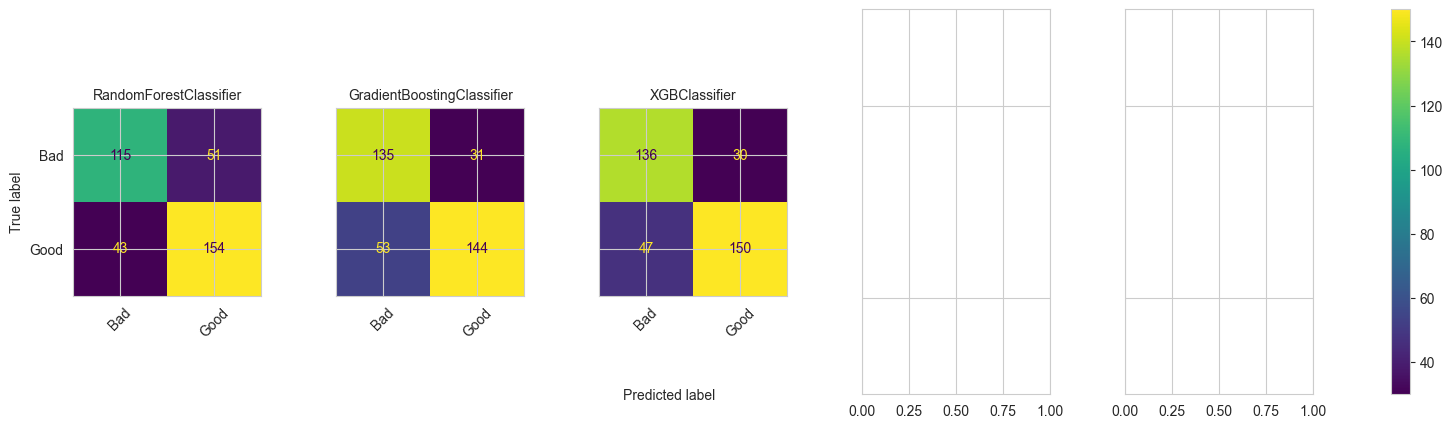

In [ ]:
#Plotting Confusion Matrices

# creating a class list
Class_cat = ['Bad','Good']

classifiers = {
    "RandomForestClassifier": RandomForestClassifier(max_depth=2, n_estimators=30,
                              min_samples_split=3, max_leaf_nodes=5, random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(objective='multi:softmax', num_class=3,
                                                      max_depth=3, eta=0.3, subsample=0.8,
                                                      colsample_bytree=0.8, gamma=0.1,
                                                      reg_lambda=1, reg_alpha=0),
}

f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=Class_cat)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key, fontsize=10)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.4)


f.colorbar(disp.im_, ax=axes)
plt.show()

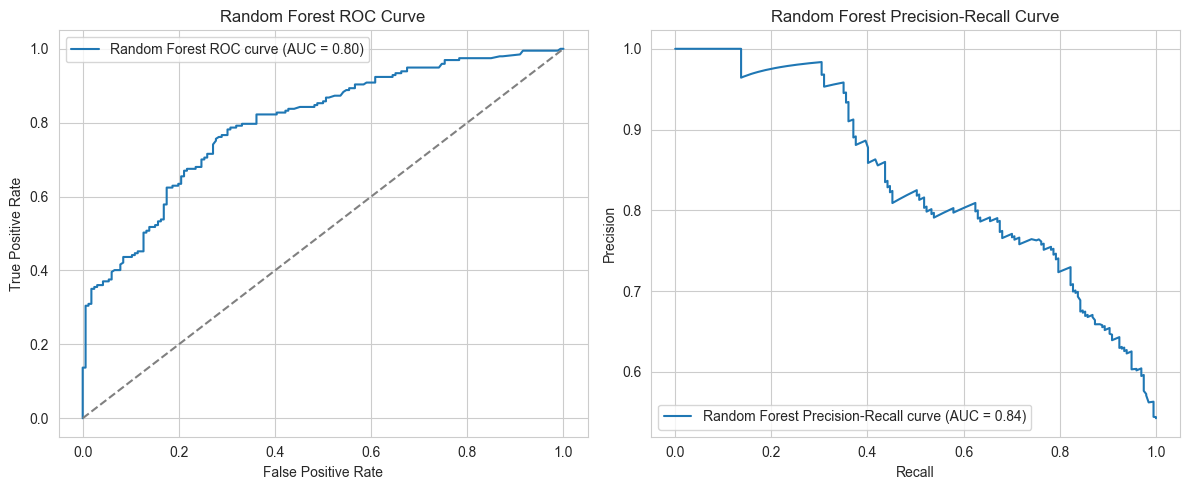

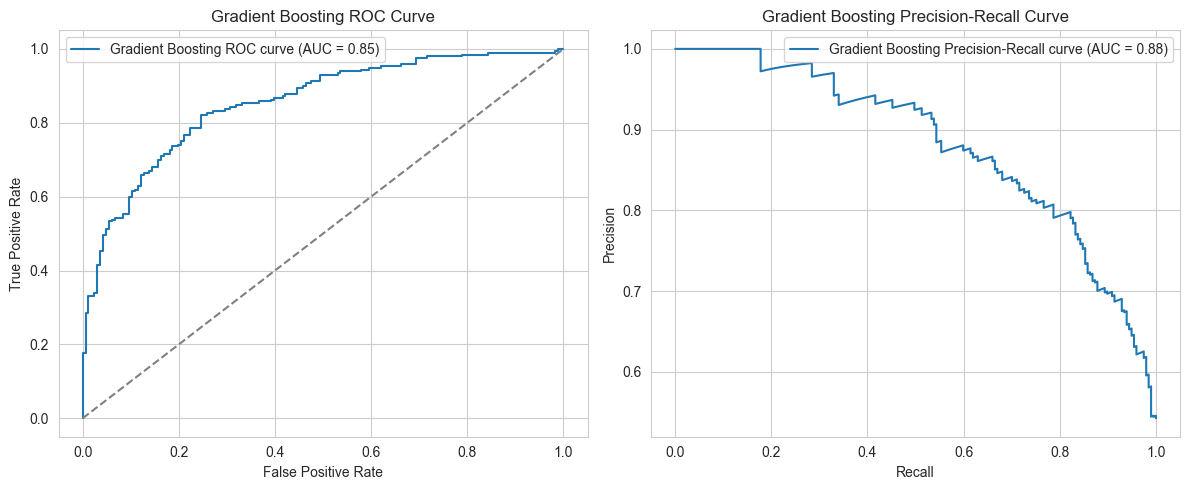

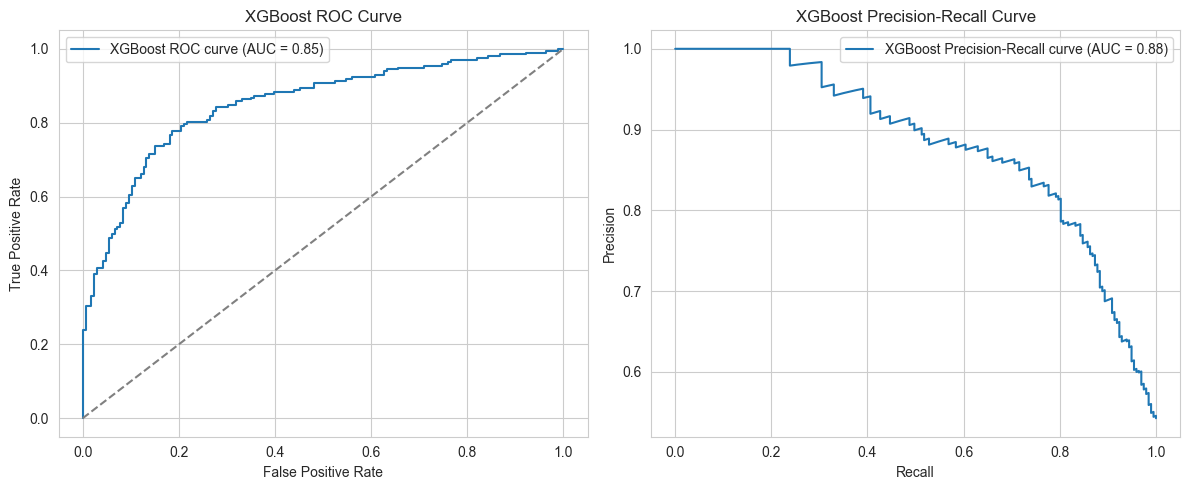

In [ ]:
# Define a function to plot ROC curve and Precision-Recall curve

def plot_roc_and_pr_curves(model, X_test, y_test, classifier_name):
    plt.figure(figsize=(12, 5))

    # ROC curve
    plt.subplot(1, 2, 1)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label='{} ROC curve (AUC = {:.2f})'.format(classifier_name, auc_score))
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC Curve'.format(classifier_name))
    plt.legend()

    # Precision-Recall curve
    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label='{} Precision-Recall curve (AUC = {:.2f})'.format(classifier_name, pr_auc))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('{} Precision-Recall Curve'.format(classifier_name))
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot ROC curve and Precision-Recall curve for Random Forest
plot_roc_and_pr_curves(rf_pipeline, X_test, y_test, "Random Forest")

# Plot ROC curve and Precision-Recall curve for Gradient Boosting
plot_roc_and_pr_curves(gb_pipeline, X_test, y_test, "Gradient Boosting")

# Plot ROC curve and Precision-Recall curve for XGBoost
plot_roc_and_pr_curves(xg_pipeline, X_test, y_test, "XGBoost")

In [ ]:
# Define hyperparameter grids for each model with class weight options and determine best parameters and scores for each model

param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__class_weight': [None, 'balanced', {0: 1, 1: 2}]  # Options: None, 'balanced', or custom
}

param_grid_gb = {
    'model__max_depth': [3, 6, 9],
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 0.9, 1.0]  # Adjust subsample to control for class imbalance
}

param_grid_xg = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__scale_pos_weight': [1, 2]  # For XGBoost, scale_pos_weight is used for class imbalance
}

#roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True, average='weighted')

# Perform grid search for each model
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_xg = GridSearchCV(xg_pipeline, param_grid_xg, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search objects
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)
grid_search_xg.fit(X_train, y_train)

# Print the best parameters and score for each model
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Best Score:", grid_search_rf.best_score_)

print("Gradient Boosting Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting Best Score:", grid_search_gb.best_score_)

print("XGBoost Best Parameters:", grid_search_xg.best_params_)
print("XGBoost Best Score:", grid_search_xg.best_score_)

Random Forest Best Parameters: {'model__class_weight': {0: 1, 1: 2}, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_split': 2, 'model__n_estimators': 50}
Random Forest Best Score: 0.8509454862098282
Gradient Boosting Best Parameters: {'model__learning_rate': 0.2, 'model__max_depth': 9, 'model__n_estimators': 200, 'model__subsample': 0.9}
Gradient Boosting Best Score: 0.940402147533756
XGBoost Best Parameters: {'model__learning_rate': 0.2, 'model__n_estimators': 200, 'model__scale_pos_weight': 1}
XGBoost Best Score: 0.8629898955735001


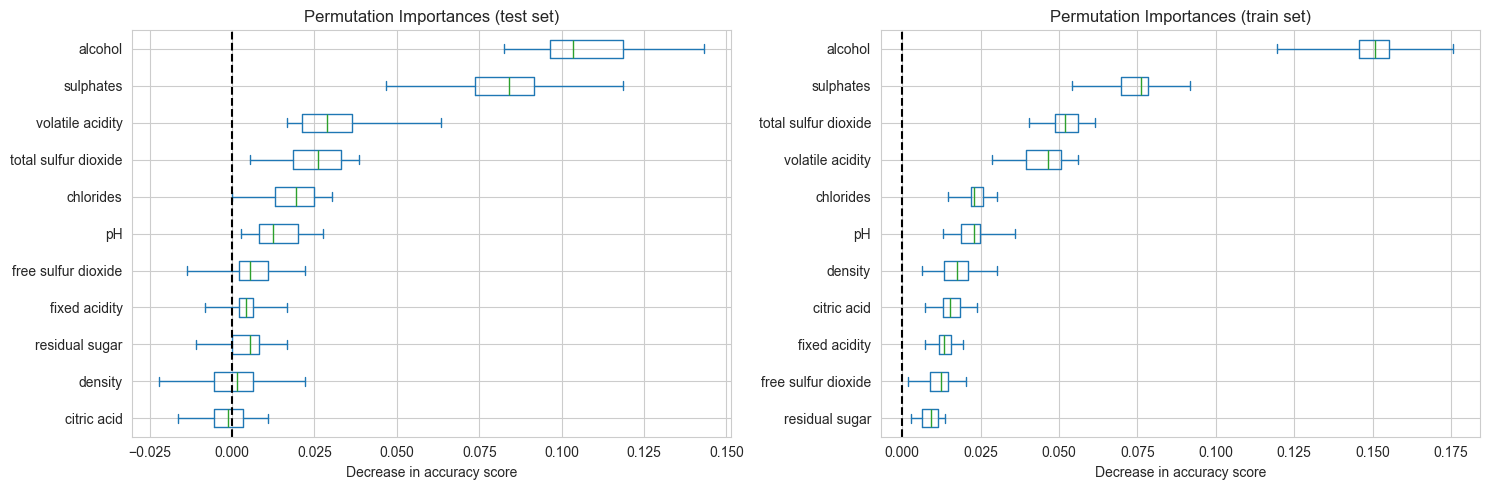

In [ ]:
# Determine Feature Importance using Permutation Importance using Gradient Boosting Classifier since the model had the best performance
# Plot the permutation importance

y = df_red_prepped['quality_good_bad']
X = df_red_prepped.drop(['quality_good_bad', 'Sweetness', 'Body_Type'], axis=1)


# splitting the data into Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

#identify  cols in df_transformed dataframe, excluding 'income_binary'
cols = [col for col in df_red_prepped.columns if col not in ['quality_good_bad', 'Sweetness', 'Body_Type']]


#define and scale the preprocessing for numerical cols
transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

#Combine preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('col', transformer, cols)])

# Pipeline for Gradient Boosting Classifier
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', GradientBoostingClassifier(random_state=42))])

#calculate permutation importance for test data
gb = gb_pipeline.fit(X_train, y_train)
result_test = permutation_importance(
    gb, X_test, y_test, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_test = result_test.importances_mean.argsort()
importances_test = pd.DataFrame(
    result_test.importances[sorted_importances_idx_test].T,
    columns=X.columns[sorted_importances_idx_test],
)

#calculate permutation importance for training data
result_train = permutation_importance(
    gb, X_train, y_train, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_train = result_train.importances_mean.argsort()
importances_train = pd.DataFrame(
    result_train.importances[sorted_importances_idx_train].T,
    columns=X.columns[sorted_importances_idx_train],
)

f, axs = plt.subplots(1,2,figsize=(15,5))

importances_test.plot.box(vert=False, whis=10, ax = axs[0])
axs[0].set_title("Permutation Importances (test set)")
axs[0].axvline(x=0, color="k", linestyle="--")
axs[0].set_xlabel("Decrease in accuracy score")
axs[0].figure.tight_layout()

importances_train.plot.box(vert=False, whis=10, ax = axs[1])
axs[1].set_title("Permutation Importances (train set)")
axs[1].axvline(x=0, color="k", linestyle="--")
axs[1].set_xlabel("Decrease in accuracy score")
axs[1].figure.tight_layout()

##Goal 4: Identify the best predictive features to predict quality of wine

In [ ]:
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
# Handling outliers with z_score

print('Data observations before removing outliers:', df_red.shape[0])

# Calculate Z-scores for all columns
z_scores = np.abs(stats.zscore(df_red))

# Create a boolean mask where any element's absolute Z-score is greater than 3
outlier_mask = (z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)

# Apply the mask to filter the DataFrame
df_red_task4 = df_red[~outlier_mask]

print('Data after treating with Z-score:', df_red_task4.shape[0])

Data observations before removing outliers: 1599
Data after treating with Z-score: 1451


Text(0.5, 0.98, 'Train Data Distribution after Yeo-Johnson Transformation ')

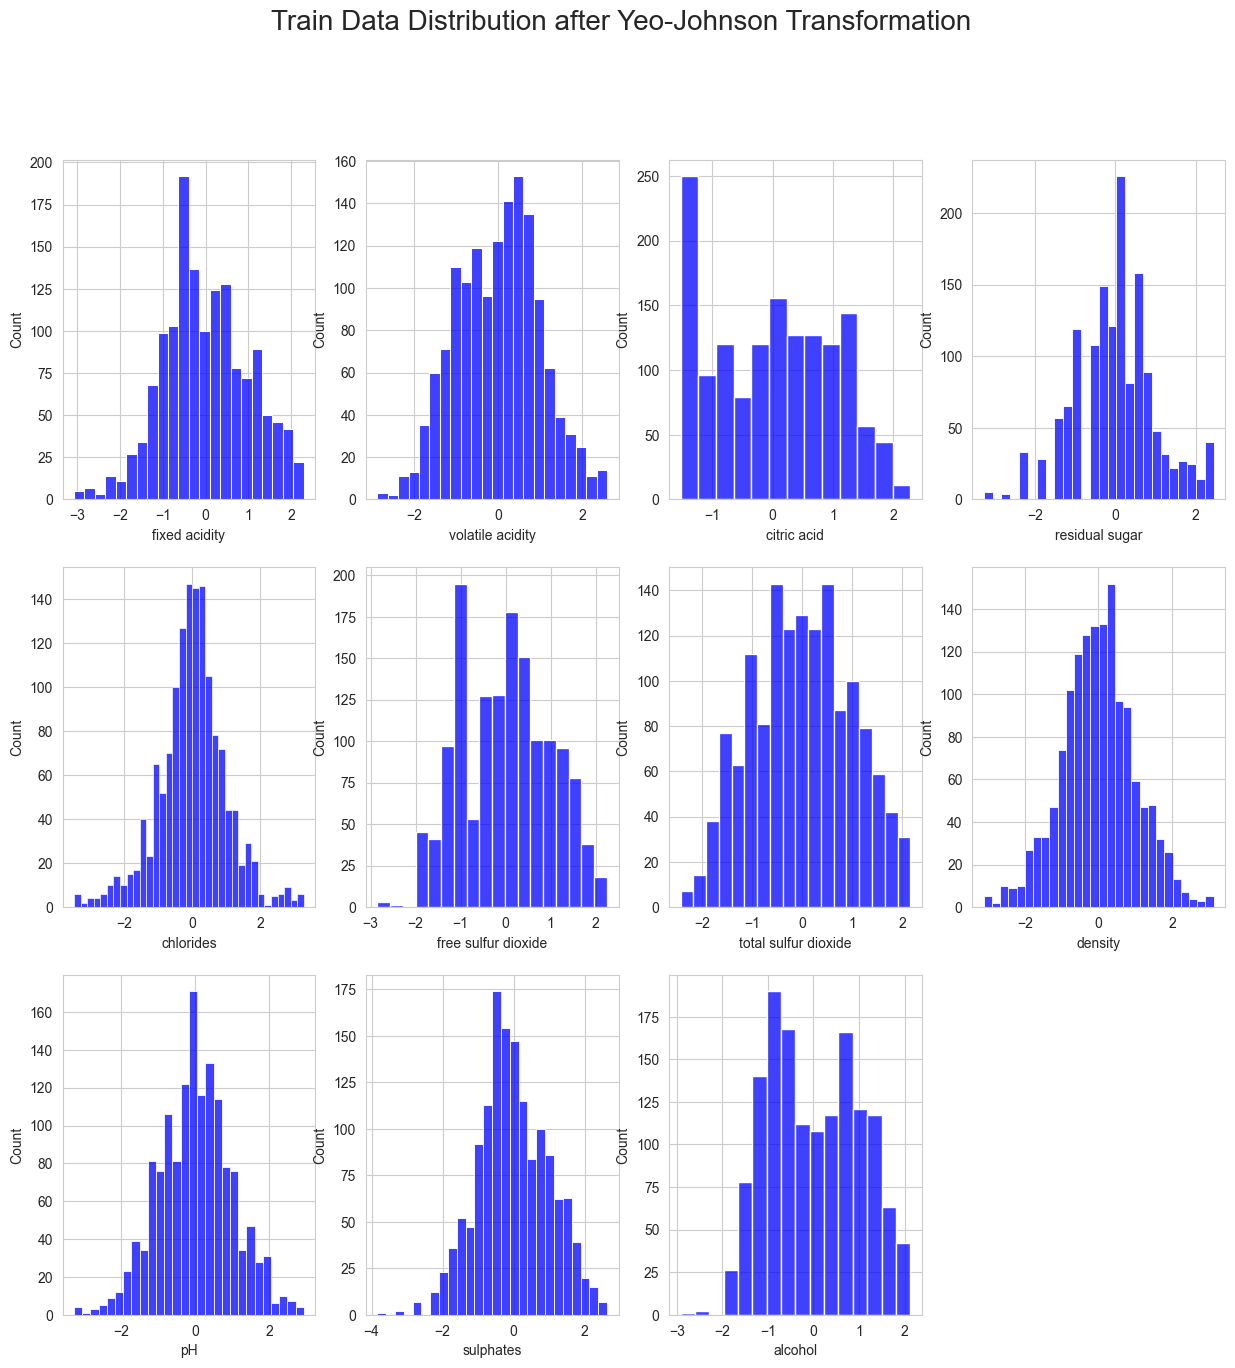

In [ ]:
#Show Yeo-Johnson Transformation distribution to improve skewness in the distribution

df_red_trf = df_red_task4.drop(['quality'], axis=1)

for i in df_red_trf.columns:
  power = PowerTransformer(method='yeo-johnson')
  power.fit(df_red_trf[[i]])
  df_red_trf[i] = power.transform(df_red_trf[[i]]).ravel()


#Check the Histogram Distribution
plt.figure(figsize=(15,15))
for i in range(0, len(no_target)):
  plt.subplot(3, 4, i+1)
  ax = sns.histplot(df_red_trf[no_target[i]], color='blue')
plt.suptitle('Train Data Distribution after Yeo-Johnson Transformation ', fontsize = 20)

In [ ]:
# Concatenate Data Frames to include Quality and Transformed data

quality = df_red_task4['quality']

# Create a DataFrame for each column
quality_df = pd.DataFrame(quality, columns=['quality'])

# Concatenate the three columns onto the large DataFrame
df_red_task4_prepped = pd.concat([df_red_trf, quality_df], axis=1)

# Show the updated DataFrame
df_red_task4_prepped.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.467878          1.055740    -1.524506       -0.610683  -0.145035   
1      -0.170805          1.919750    -1.524506        0.649155   0.986838   
2      -0.170805          1.357067    -1.245434        0.207601   0.718578   
3       1.573404         -1.556675     1.444056       -0.610683  -0.207213   
4      -0.467878          1.055740    -1.524506       -0.610683  -0.145035   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.241492             -0.066536  0.640791  1.360860  -0.589657   
1             1.091561              0.952517  0.061011 -0.816507   0.451524   
2             0.238587              0.624244  0.177435 -0.380977   0.220005   
3             0.440493              0.784119  0.756049 -1.110847  -0.393177   
4            -0.241492             -0.066536  0.640791  1.360860  -0.589657   

    alcohol  quality  
0 -1.120424        5  
1 -0.530340        5  
2 -0.530340        5  
3 -0.530340        6  
4 -1.120424        5

In [ ]:
# Set up Train and Test for quality classification to determine if the target label is balanced or not

y = df_red_task4_prepped['quality']
X = df_red_task4_prepped.drop(['quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# how imbalanced the data is
print(np.bincount(y_train),np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[  0   0   0   0  33 473 436 135  11] [  0   0   0   0  14 144 150  50   5]
(1088, 11)
(363, 11)
(1088,)
(363,)


In [ ]:
#Setting up Pipeline Transformer and Preprocessor

# Identify columns in df_transformed dataframe, excluding 'income_binary'
cols = [col for col in df_red_task4_prepped.columns if col not in ['quality']]

# Define and scale the preprocessing for numerical columns
transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', transformer, cols)])

In [ ]:
#Setting up Pipeline and fitting the pipeline

# Pipeline for Linear Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', LinearRegression())])

# Pipeline for Decision Tree Regressor
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', DecisionTreeRegressor(random_state=42))
])

# Train the Linear Regression model
lr_pipeline.fit(X_train, y_train)

# Train the SVM model
dt_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [ ]:
# Predictions with Linear Regression
lr_train_pred = lr_pipeline.predict(X_train)
lr_preds = lr_pipeline.predict(X_test)

# Predictions with DT
dt_train_pred = dt_pipeline.predict(X_train)
dt_preds = dt_pipeline.predict(X_test)

# Calculate MSE and R^2 score for Linear Regression
mse_lr = mean_squared_error(y_test, lr_preds)
r2_lr = r2_score(y_test, lr_preds)

# Calculate MSE and R^2 score for Decision Tree
mse_dt = mean_squared_error(y_test, dt_preds)
r2_dt = r2_score(y_test, dt_preds)


# Define the scorers
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

# Suppress warnings
warnings.filterwarnings("ignore")

# Evaluate Linear Regression pipeline performance using cross-validation
cv_results_lr = cross_validate(lr_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Evaluate DT pipeline performance using cross-validation
cv_results_svm = cross_validate(dt_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Print mean cross-validated scores for Linear Regression
print("\nLinear Regression:")
print("MSE:", mse_lr)
print("R^2 Score:", r2_lr)

# Print mean cross-validated scores for Decision Tree
print("\nDecision Tree:")
print("MSE:", mse_dt)
print("R^2 Score:", r2_dt)

#In summary, while interpreting these scores:

#Lower MSE and higher R^2 score indicate better model performance.
#MSE provides a measure of the average prediction error.
#R^2 score provides a measure of how well the features explain the variability in the target variable.


Linear Regression:
MSE: 0.4286447317222357
R^2 Score: 0.33912798476227657

Decision Tree:
MSE: 0.6694214876033058
R^2 Score: -0.0320946341235111


Feature: alcohol, Score: 0.22208
Feature: sulphates, Score: 0.21975
Feature: volatile acidity, Score: -0.12831
Feature: density, Score: -0.12631
Feature: fixed acidity, Score: 0.11177
Feature: total sulfur dioxide, Score: -0.09335
Feature: citric acid, Score: -0.04842
Feature: pH, Score: -0.04658
Feature: residual sugar, Score: 0.04220
Feature: free sulfur dioxide, Score: 0.04036
Feature: chlorides, Score: -0.02446


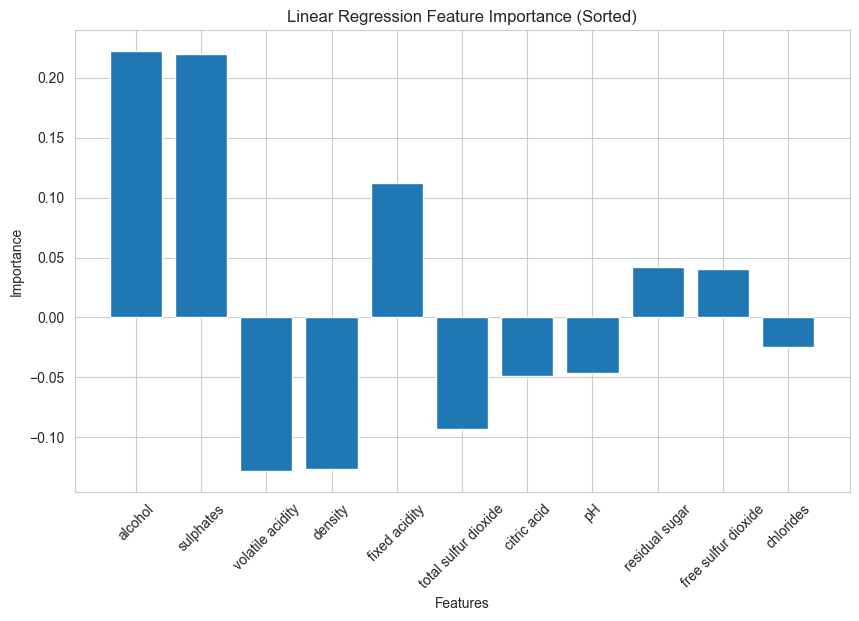

In [ ]:
# Linear Regression Feature Importance for Quality

# define dataset
y = df_red_task4_prepped['quality']
X = df_red_task4_prepped.drop(['quality'], axis=1)

# column Names
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Define the model
model = LinearRegression()
# Fit the model
model.fit(X, y)
# Get coefficients (importance)
importance = model.coef_

# Reverse the feature importance list
feature_importance_reverse = sorted(zip(column_names, importance), key=lambda x: abs(x[1]), reverse=True)

# Summarize Feature Importance in decreasing order
for feature, score in feature_importance_reverse:
    print('Feature: {}, Score: {:.5f}'.format(feature, score))

# Zip column names with importance scores and sort them based on scores
feature_importance = sorted(zip(column_names, importance), key=lambda x: abs(x[1]), reverse=True)
sorted_column_names, sorted_importance = zip(*feature_importance)

# Plot sorted feature importance
plt.figure(figsize=(10, 6))
plt.bar(sorted_column_names, sorted_importance)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Linear Regression Feature Importance (Sorted)')
plt.show()

Feature: alcohol, Score: 0.28978
Feature: sulphates, Score: 0.15766
Feature: volatile acidity, Score: 0.10044
Feature: total sulfur dioxide, Score: 0.07959
Feature: chlorides, Score: 0.07018
Feature: pH, Score: 0.06908
Feature: citric acid, Score: 0.06710
Feature: residual sugar, Score: 0.05224
Feature: free sulfur dioxide, Score: 0.04587
Feature: density, Score: 0.04561
Feature: fixed acidity, Score: 0.02246


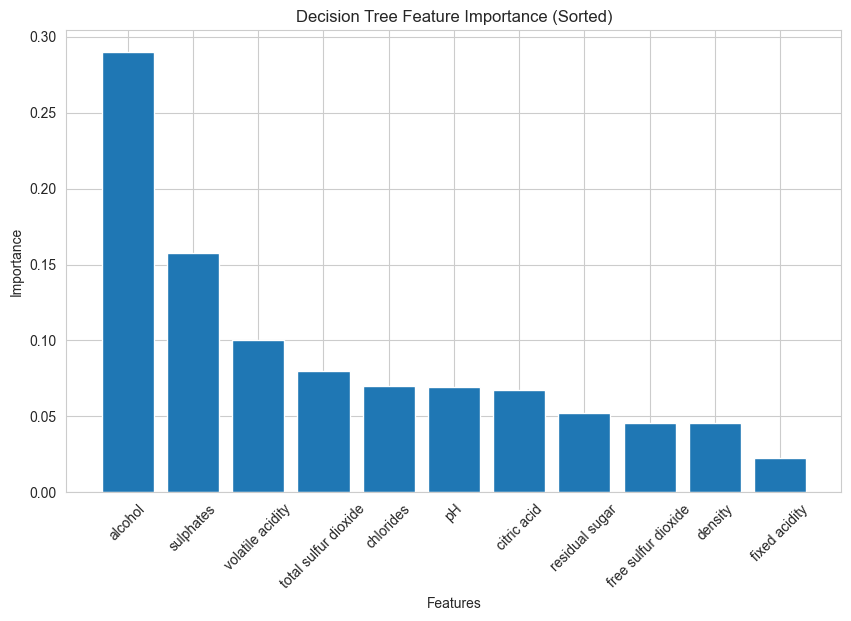

In [ ]:
# Decision Tree Feature Importance for Quality

# define dataset
y = df_red_task4_prepped['quality']
X = df_red_task4_prepped.drop(['quality'], axis=1)

# column names
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Define the model
model = DecisionTreeRegressor(random_state=42)
# Fit the model
model.fit(X, y)
# Get feature importance
importance = model.feature_importances_

# Reverse the feature importance list
feature_importance_reverse = sorted(zip(column_names, importance), key=lambda x: abs(x[1]), reverse=True)

# Summarize Feature Importance in decreasing order
for feature, score in feature_importance_reverse:
    print('Feature: {}, Score: {:.5f}'.format(feature, score))

# Zip column names with importance scores and sort them based on scores
feature_importance = sorted(zip(column_names, importance), key=lambda x: x[1], reverse=True)
sorted_column_names, sorted_importance = zip(*feature_importance)

# Plot sorted feature importance
plt.figure(figsize=(10, 6))
plt.bar(sorted_column_names, sorted_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define hyperparameter grids for each model and determine best parameters, scores for each model

# Define hyperparameters for Linear Regression
lr_param_grid = {
    'model__fit_intercept': [True, False],
}

# Define hyperparameters for Decision Tree
dt_param_grid = {
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

# Perform Grid Search with cross-validation for Linear Regression
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=10, scoring='neg_mean_squared_error')
lr_grid_search.fit(X_train, y_train)

# Perform Grid Search with cross-validation for Decision Tree
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=10, scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train, y_train)

# Get the best parameters and best score for Linear Regression
best_lr_params = lr_grid_search.best_params_
best_lr_score = -lr_grid_search.best_score_

# Get the best parameters and best score for Decision Tree
best_dt_params = dt_grid_search.best_params_
best_dt_score = -dt_grid_search.best_score_

# Print the best parameters and best score for Linear Regression
print("Best Parameters for Linear Regression:", best_lr_params)
print("Best MSE Score:", best_lr_score)

# Print the best parameters and best score for Decision Tree
print("Best Parameters for Decision Tree:", best_dt_params)
print("Best MSE Score:", best_dt_score)

Best Parameters for Linear Regression: {'model__fit_intercept': True}
Best MSE Score: 0.37272225027904343
Best Parameters for Decision Tree: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}
Best MSE Score: 0.4683127666239105


## White Wine

##Goal 1: Classify Wine by Sugar Content - Sweet or Dry

In [ ]:
df_white_prepped.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       6.632184          0.267289     0.359635       20.417174   0.028252   
1       5.988222          0.297352     0.339628        1.596665   0.032264   
2       7.639527          0.277309     0.399650        6.843696   0.033267   
3       6.815739          0.227214     0.319621        8.422282   0.041293   
4       6.815739          0.227214     0.319621        8.422282   0.041293   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            47.467170            172.649166  1.000891  2.997981   0.459033   
1            14.491167            133.935240  0.993905  3.297588   0.498518   
2            31.431172             98.314114  0.995003  3.257642   0.449156   
3            49.613373            188.959785  0.995502  3.187735   0.409625   
4            49.613373            188.959785  0.995502  3.187735   0.409625   

    alcohol  Sweetness  Body_Type  quality_good_bad  
0  7.539358          1          0                 1  
1  8.087900          0          0                 1  
2  8.554996          1          0                 1  
3  8.399602          1          0                 1  
4  8.399602          1          0                 1

In [ ]:
# Set up Train and Test for quality classification to determine if the target label is balanced or not

y_sweetness = df_white_prepped['Sweetness']
X_sweetness = df_white_prepped.drop(['quality_good_bad', 'Sweetness', 'Body_Type', 'residual sugar'], axis=1)

X_train_sweet, X_test_sweet, y_train_sweet, y_test_sweet = train_test_split(X_sweetness, y_sweetness, stratify=y_sweetness, test_size=0.25, random_state=42)

# how imbalanced the data is
print(np.bincount(y_train_sweet),np.bincount(y_test_sweet))

print(X_train_sweet.shape)
print(X_test_sweet.shape)
print(y_train_sweet.shape)
print(y_test_sweet.shape)

[1792 1573] [598 524]
(3365, 10)
(1122, 10)
(3365,)
(1122,)


In [ ]:
#Setting up Pipeline Transformer and Preprocessor

# Identify columns for preprocessing
cols_sweet = [col for col in df_white_prepped.columns if col not in ['quality_good_bad', 'Sweetness', 'Body_Type', 'residual sugar']]

# Define and scale the preprocessing for numerical columns
transformer_sweet = Pipeline(steps=[('scaler', StandardScaler())])

# Combine preprocessor for numerical data
preprocessor_sweet = ColumnTransformer(transformers=[('num', transformer_sweet, cols_sweet)])

In [ ]:
#Setting up Pipeline and fitting the pipeline

# Pipeline for Random Forest
rf_pipeline_sweet = Pipeline(steps=[
    ('preprocessor', preprocessor_sweet),
    ('model', RandomForestClassifier(max_depth=2, n_estimators=30, min_samples_split=3, max_leaf_nodes=5, random_state=42))
])

# Pipeline for Gradient Boosting Classifier
gb_pipeline_sweet = Pipeline(steps=[
    ('preprocessor', preprocessor_sweet),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Pipeline for XGBoost Classifier
xg_pipeline_sweet = Pipeline(steps=[
    ('preprocessor', preprocessor_sweet),
    ('model', XGBClassifier(objective='binary:logistic', max_depth=3, eta=0.3, subsample=0.8,
                            colsample_bytree=0.8, gamma=0.1, reg_lambda=1, reg_alpha=0, random_state=42))
])

# Train the Random Forest model
rf_pipeline_sweet.fit(X_train_sweet, y_train_sweet)

# Train the Gradient Boosting model
gb_pipeline_sweet.fit(X_train_sweet, y_train_sweet)

# Train the XGBoost model
xg_pipeline_sweet.fit(X_train_sweet, y_train_sweet)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid', 'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, c...
                               eval_metric=None, feature_types=None, gamma=0.1,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
# Predictions with Random Forest
rf_train_pred_sweet = rf_pipeline_sweet.predict(X_train_sweet)
rf_preds_sweet = rf_pipeline_sweet.predict(X_test_sweet)

# Predictions with Gradient Boosting
gb_train_pred_sweet = gb_pipeline_sweet.predict(X_train_sweet)
gb_preds_sweet = gb_pipeline_sweet.predict(X_test_sweet)

# Predictions with XGBoost
xg_train_pred_sweet = xg_pipeline_sweet.predict(X_train_sweet)
xg_preds_sweet = xg_pipeline_sweet.predict(X_test_sweet)

# Calculate train accuracy
train_accuracy_rf_sweet = accuracy_score(y_train_sweet, rf_train_pred_sweet)
accuracy_rf_sweet = accuracy_score(y_test_sweet, rf_preds_sweet)
train_accuracy_gb_sweet = accuracy_score(y_train_sweet, gb_train_pred_sweet)
accuracy_gb_sweet = accuracy_score(y_test_sweet, gb_preds_sweet)
train_accuracy_xg_sweet = accuracy_score(y_train_sweet, xg_train_pred_sweet)
accuracy_xg_sweet = accuracy_score(y_test_sweet, xg_preds_sweet)

# Define the scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score),
    'precision': make_scorer(precision_score),
    'train_accuracy': make_scorer(accuracy_score, greater_is_better=True)
}

# Evaluate Random Forest pipeline performance using cross-validation
cv_results_rf_sweet = cross_validate(rf_pipeline_sweet, X_train_sweet, y_train_sweet, cv=10, scoring=scoring)

# Evaluate Gradient Boosting pipeline performance using cross-validation
cv_results_gb_sweet = cross_validate(gb_pipeline_sweet, X_train_sweet, y_train_sweet, cv=10, scoring=scoring)

# Evaluate XGBoost pipeline performance using cross-validation
cv_results_xg_sweet = cross_validate(xg_pipeline_sweet, X_train_sweet, y_train_sweet, cv=10, scoring=scoring)


# Print mean cross-validated scores for Random Forest
print("Random Forest:")
print("Mean Cross-Validation Accuracy:", cv_results_rf_sweet['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_rf_sweet)
print("Mean Cross-Validation AUC:", cv_results_rf_sweet['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_rf_sweet['test_precision'].mean())

# Print mean cross-validated scores for Gradient Boosting
print("\nGradient Boosting:")
print("Mean Cross-Validation Accuracy:", cv_results_gb_sweet['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_gb_sweet)
print("Mean Cross-Validation AUC:", cv_results_gb_sweet['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_gb_sweet['test_precision'].mean())

# Print mean cross-validated scores for XGBoost
print("\nXGBoost:")
print("Mean Cross-Validation Accuracy:", cv_results_xg_sweet['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_xg_sweet)
print("Mean Cross-Validation AUC:", cv_results_xg_sweet['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_xg_sweet['test_precision'].mean())

Random Forest:
Mean Cross-Validation Accuracy: 0.8594390278366539
Train Accuracy: 0.8597325408618128
Mean Cross-Validation AUC: 0.8532441448933608
Mean Cross-Validation Precision: 0.9282834509039913

Gradient Boosting:
Mean Cross-Validation Accuracy: 0.943832132259432
Train Accuracy: 0.9708766716196137
Mean Cross-Validation AUC: 0.9428091652301939
Mean Cross-Validation Precision: 0.9521751261648976

XGBoost:
Mean Cross-Validation Accuracy: 0.9592888935989826
Train Accuracy: 0.9931649331352155
Mean Cross-Validation AUC: 0.9586078411677598
Mean Cross-Validation Precision: 0.9649385161043282


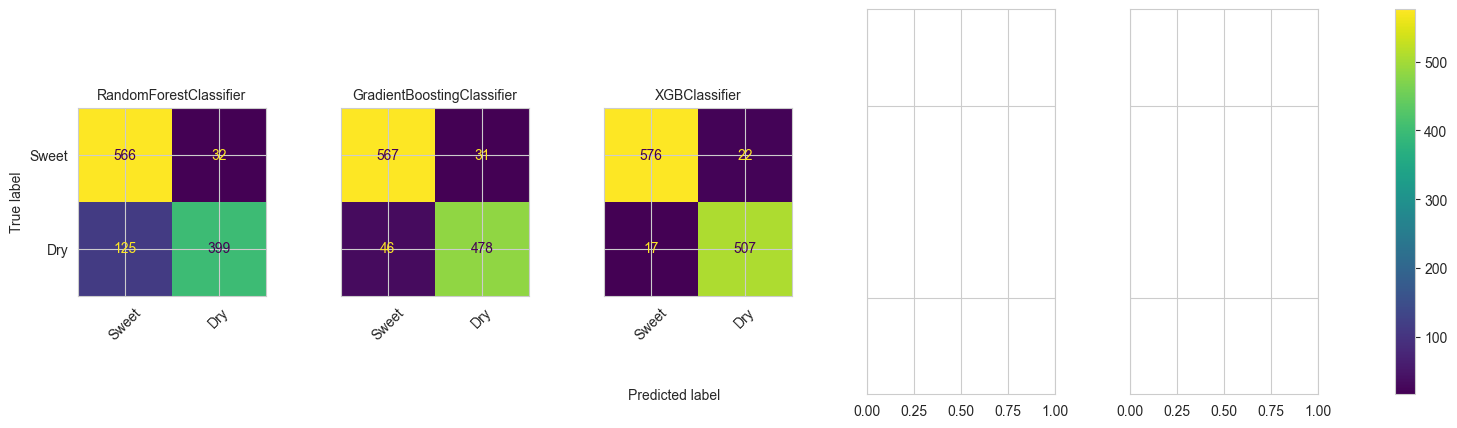

In [ ]:
# Confusion Matrix

# creating a class list
Class_cat = ['Sweet','Dry']

classifiers = {
    "RandomForestClassifier": RandomForestClassifier(max_depth=2, n_estimators=30,
                              min_samples_split=3, max_leaf_nodes=5, random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(objective='multi:softmax', num_class=3,
                                                      max_depth=3, eta=0.3, subsample=0.8,
                                                      colsample_bytree=0.8, gamma=0.1,
                                                      reg_lambda=1, reg_alpha=0),
}

f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train_sweet, y_train_sweet).predict(X_test_sweet)
    cf_matrix = confusion_matrix(y_test_sweet, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=Class_cat)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key, fontsize=10)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.4)


f.colorbar(disp.im_, ax=axes)
plt.show()



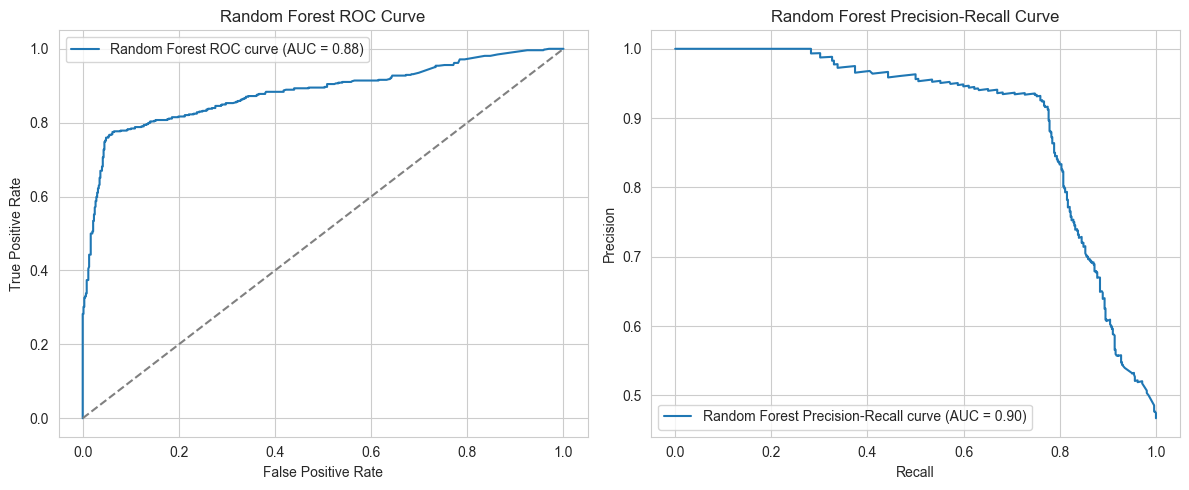

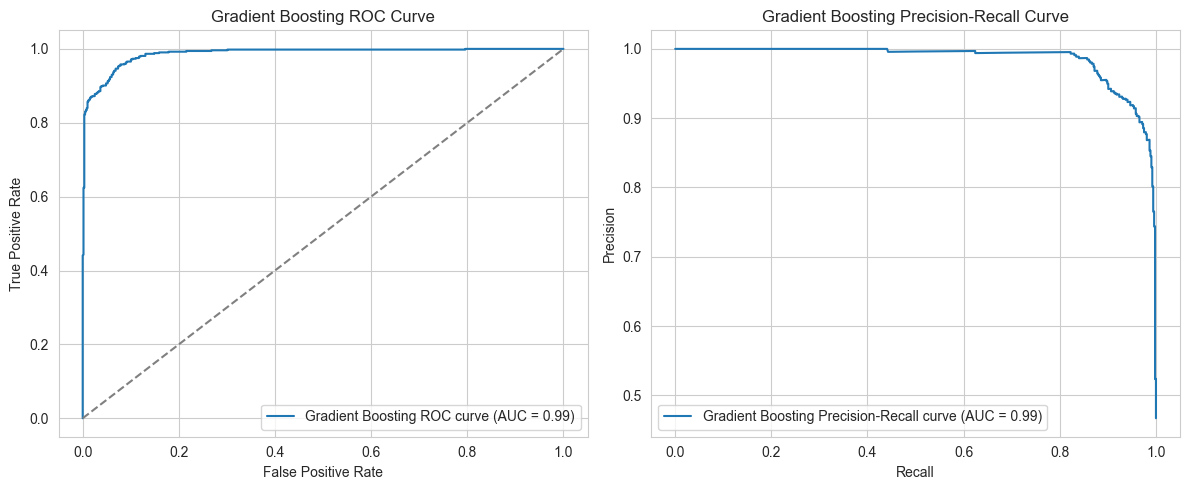

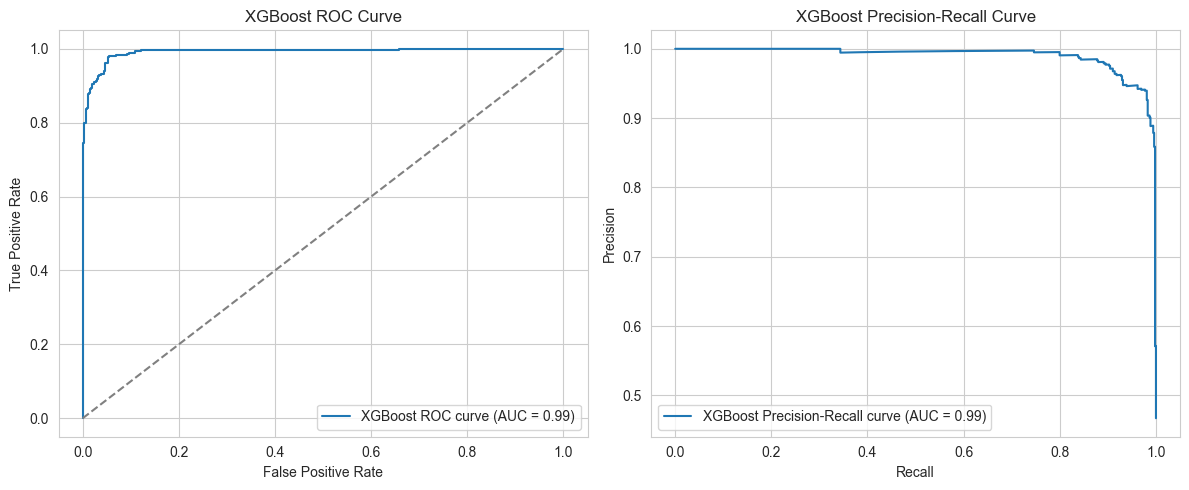

In [ ]:
# Define a function to plot ROC curve and Precision-Recall curve

def plot_roc_and_pr_curves(model, X_test_sweet, y_test_sweet, classifier_name):
    plt.figure(figsize=(12, 5))

    # ROC curve
    plt.subplot(1, 2, 1)
    fpr, tpr, thresholds = roc_curve(y_test_sweet, model.predict_proba(X_test_sweet)[:, 1])
    auc_score = roc_auc_score(y_test_sweet, model.predict_proba(X_test_sweet)[:, 1])
    plt.plot(fpr, tpr, label='{} ROC curve (AUC = {:.2f})'.format(classifier_name, auc_score))
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC Curve'.format(classifier_name))
    plt.legend()

    # Precision-Recall curve
    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_test_sweet, model.predict_proba(X_test_sweet)[:, 1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label='{} Precision-Recall curve (AUC = {:.2f})'.format(classifier_name, pr_auc))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('{} Precision-Recall Curve'.format(classifier_name))
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot ROC curve and Precision-Recall curve for Random Forest
plot_roc_and_pr_curves(rf_pipeline_sweet, X_test_sweet, y_test_sweet, "Random Forest")

# Plot ROC curve and Precision-Recall curve for Gradient Boosting
plot_roc_and_pr_curves(gb_pipeline_sweet, X_test_sweet, y_test_sweet, "Gradient Boosting")

# Plot ROC curve and Precision-Recall curve for XGBoost
plot_roc_and_pr_curves(xg_pipeline_sweet, X_test_sweet, y_test_sweet, "XGBoost")

In [ ]:
# Define hyperparameter grids for each model with class weight options and determine best parameters and scores for each model

param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__class_weight': [None, 'balanced', {0: 1, 1: 2}]  # Options: None, 'balanced', or custom
}

param_grid_gb = {
    'model__max_depth': [3, 6, 9],
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 0.9, 1.0]  # Adjust subsample to control for class imbalance
}

param_grid_xg = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__scale_pos_weight': [1, 2]  # For XGBoost, scale_pos_weight is used for class imbalance
}

#roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True, average='weighted')

# Perform grid search for each model
grid_search_rf = GridSearchCV(rf_pipeline_sweet, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_gb = GridSearchCV(gb_pipeline_sweet, param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_xg = GridSearchCV(xg_pipeline_sweet, param_grid_xg, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search objects
grid_search_rf.fit(X_train_sweet, y_train_sweet)
grid_search_gb.fit(X_train_sweet, y_train_sweet)
grid_search_xg.fit(X_train_sweet, y_train_sweet)

# Print the best parameters and score for each model
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Best Score:", grid_search_rf.best_score_)

print("Gradient Boosting Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting Best Score:", grid_search_gb.best_score_)

print("XGBoost Best Parameters:", grid_search_xg.best_params_)
print("XGBoost Best Score:", grid_search_xg.best_score_)

Random Forest Best Parameters: {'model__class_weight': {0: 1, 1: 2}, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_split': 10, 'model__n_estimators': 100}
Random Forest Best Score: 0.9358044578971902
Gradient Boosting Best Parameters: {'model__learning_rate': 0.2, 'model__max_depth': 9, 'model__n_estimators': 200, 'model__subsample': 0.8}
Gradient Boosting Best Score: 0.9928356660623312
XGBoost Best Parameters: {'model__learning_rate': 0.2, 'model__n_estimators': 200, 'model__scale_pos_weight': 1}
XGBoost Best Score: 0.9628528974739969


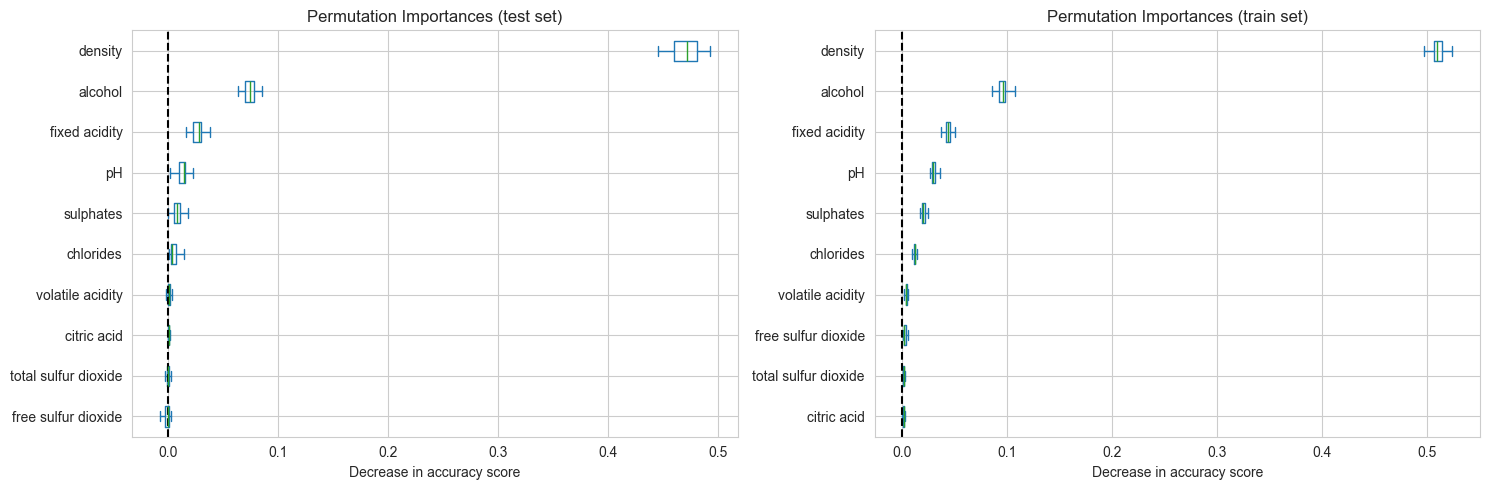

In [ ]:
# Determine Feature Importance using Permutation Importance using Gradient Boosting Classifier since the model had the best performance
# Plot the permutation importance

y_sweetness = df_white_prepped['Sweetness']
X_sweetness = df_white_prepped.drop(['quality_good_bad', 'Sweetness', 'Body_Type', 'residual sugar'], axis=1)

X_train_sweet, X_test_sweet, y_train_sweet, y_test_sweet = train_test_split(X_sweetness, y_sweetness, stratify=y_sweetness, test_size=0.25, random_state=42)

# Identify columns for preprocessing
cols_sweet = [col for col in df_white_prepped.columns if col not in ['quality_good_bad', 'Sweetness', 'Body_Type', 'residual sugar']]


#define and scale the preprocessing for numerical cols
transformer_sweet = Pipeline(steps=[
    ('scaler', StandardScaler())])

#Combine preprocessor for numerical and categorical data
preprocessor_sweet = ColumnTransformer(transformers=[
    ('col', transformer_sweet, cols_sweet)])

# Pipeline for Gradient Boosting Classifier
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor_sweet),
                              ('model', GradientBoostingClassifier(random_state=42))])

#calculate permutation importance for test data
gb = gb_pipeline.fit(X_train_sweet, y_train_sweet)
result_test = permutation_importance(
    gb, X_test_sweet, y_test_sweet, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_test = result_test.importances_mean.argsort()
importances_test = pd.DataFrame(
    result_test.importances[sorted_importances_idx_test].T,
    columns=X_sweetness.columns[sorted_importances_idx_test],
)

#calculate permutation importance for training data
result_train = permutation_importance(
    gb, X_train_sweet, y_train_sweet, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_train = result_train.importances_mean.argsort()
importances_train = pd.DataFrame(
    result_train.importances[sorted_importances_idx_train].T,
    columns=X_sweetness.columns[sorted_importances_idx_train],
)

f, axs = plt.subplots(1,2,figsize=(15,5))

importances_test.plot.box(vert=False, whis=10, ax = axs[0])
axs[0].set_title("Permutation Importances (test set)")
axs[0].axvline(x=0, color="k", linestyle="--")
axs[0].set_xlabel("Decrease in accuracy score")
axs[0].figure.tight_layout()

importances_train.plot.box(vert=False, whis=10, ax = axs[1])
axs[1].set_title("Permutation Importances (train set)")
axs[1].axvline(x=0, color="k", linestyle="--")
axs[1].set_xlabel("Decrease in accuracy score")
axs[1].figure.tight_layout()

##Goal 2: Classify Wine by Alcohol Level - Light-Bodied and Full-Bodied

In [ ]:
df_white_prepped.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       6.632184          0.267289     0.359635       20.417174   0.028252   
1       5.988222          0.297352     0.339628        1.596665   0.032264   
2       7.639527          0.277309     0.399650        6.843696   0.033267   
3       6.815739          0.227214     0.319621        8.422282   0.041293   
4       6.815739          0.227214     0.319621        8.422282   0.041293   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            47.467170            172.649166  1.000891  2.997981   0.459033   
1            14.491167            133.935240  0.993905  3.297588   0.498518   
2            31.431172             98.314114  0.995003  3.257642   0.449156   
3            49.613373            188.959785  0.995502  3.187735   0.409625   
4            49.613373            188.959785  0.995502  3.187735   0.409625   

    alcohol  Sweetness  Body_Type  quality_good_bad  
0  7.539358          1          0                 1  
1  8.087900          0          0                 1  
2  8.554996          1          0                 1  
3  8.399602          1          0                 1  
4  8.399602          1          0                 1

In [ ]:
# Set up Train and Test for quality classification to determine if the target label is balanced or not

y = df_white_prepped['Body_Type']
X = df_white_prepped.drop(['quality_good_bad', 'Sweetness', 'Body_Type', 'alcohol'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# how imbalanced the data is
print(np.bincount(y_train),np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[1732 1633] [577 545]
(3365, 10)
(1122, 10)
(3365,)
(1122,)


In [ ]:
#Setting up Pipeline Transformer and Preprocessor

# Identify columns in df_transformed dataframe, excluding 'income_binary'
cols = [col for col in df_white_prepped.columns if col not in ['quality_good_bad', 'Sweetness', 'Body_Type', 'alcohol']]

# Define and scale the preprocessing for numerical columns
transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', transformer, cols)])

In [ ]:
#Setting up Pipeline and fitting the pipeline

# Pipeline for Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), #Added multiple parameters to prevent overfitting
                              ('model', RandomForestClassifier(max_depth=2, n_estimators=30,
                              min_samples_split=3, max_leaf_nodes=5, random_state=42))])

# Pipeline for Gradient Boosting Classifier
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', GradientBoostingClassifier(random_state=42))])

# Pipeline for XGBoost Classifier
xg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), #Added multiple parameters to prevent overfitting
                              ('model', XGBClassifier(objective='multi:softmax', num_class=3,
                                                      max_depth=3, eta=0.3, subsample=0.8,
                                                      colsample_bytree=0.8, gamma=0.1,
                                                      reg_lambda=1, reg_alpha=0))])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Train the Decision Tree model
gb_pipeline.fit(X_train, y_train)

# Train the KNeighbors model
xg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH',
                                                   'sulphates'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=...
                               eval_metric=None, feature_types=None, gamma=0.1,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, num_class=3, ...))])

In [ ]:
# Predictions with Random Forest
rf_train_pred=rf_pipeline.predict(X_train)
rf_preds = rf_pipeline.predict(X_test)

# Predictions with Decision Tree
gb_train_pred=gb_pipeline.predict(X_train)
gb_preds = gb_pipeline.predict(X_test)

# Predictions with KNeighbors
xg_train_pred=xg_pipeline.predict(X_train)
xg_preds = xg_pipeline.predict(X_test)

# Calculate train accuracy
train_accuracy_rf = accuracy_score(y_train, rf_train_pred)
accuracy_rf = accuracy_score(y_test,rf_preds)
train_accuracy_gb = accuracy_score(y_train, gb_train_pred)
accuracy_gb = accuracy_score(y_test,gb_preds)
train_accuracy_xg = accuracy_score(y_train, xg_train_pred)
accuracy_xg = accuracy_score(y_test,xg_preds)

# Define the scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score),
    'precision': make_scorer(precision_score),
    'train_accuracy': make_scorer(accuracy_score, greater_is_better=True)
}

# Suppress warnings
warnings.filterwarnings("ignore")

# Evaluate Random Forest pipeline performance using cross-validation
cv_results_rf = cross_validate(rf_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Evaluate Gradient Boosting pipeline performance using cross-validation
cv_results_gb = cross_validate(gb_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Evaluate XG Boost pipeline performance using cross-validation
cv_results_xg = cross_validate(xg_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Print mean cross-validated scores for Random Forest
print("Random Forest:")
print("Mean Cross-Validation Accuracy:", cv_results_rf['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_rf)
print("Mean Cross-Validation AUC:", cv_results_rf['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_rf['test_precision'].mean())

# Print mean cross-validated scores for Gradient Boosting
print("\nGradient Boosting:")
print("Mean Cross-Validation Accuracy:", cv_results_gb['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_gb)
print("Mean Cross-Validation AUC:", cv_results_gb['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_gb['test_precision'].mean())

# Print mean cross-validated scores for XGBoost
print("\nXGBoost:")
print("Mean Cross-Validation Accuracy:", cv_results_xg['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_xg)
print("Mean Cross-Validation AUC:", cv_results_xg['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_xg['test_precision'].mean())

Random Forest:
Mean Cross-Validation Accuracy: 0.8368438250671189
Train Accuracy: 0.8386329866270431
Mean Cross-Validation AUC: 0.8355196195969267
Mean Cross-Validation Precision: 0.8621380906804628

Gradient Boosting:
Mean Cross-Validation Accuracy: 0.9167929560548256
Train Accuracy: 0.950965824665676
Mean Cross-Validation AUC: 0.915992566269248
Mean Cross-Validation Precision: 0.9368985193833593

XGBoost:
Mean Cross-Validation Accuracy: 0.9322514836795254
Train Accuracy: 0.9833580980683506
Mean Cross-Validation AUC: 0.9318602925175359
Mean Cross-Validation Precision: 0.9408945575440283


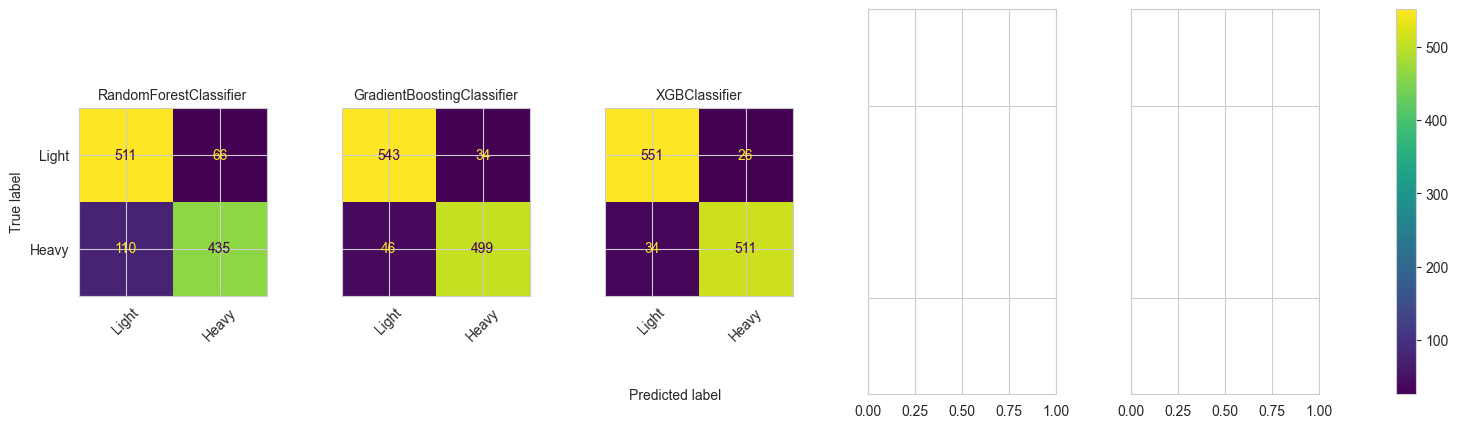

In [ ]:
#Plotting Confusion Matrices

# creating a class list
Class_cat = ['Light','Heavy']

classifiers = {
    "RandomForestClassifier": RandomForestClassifier(max_depth=2, n_estimators=30,
                              min_samples_split=3, max_leaf_nodes=5, random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(objective='multi:softmax', num_class=3,
                                                      max_depth=3, eta=0.3, subsample=0.8,
                                                      colsample_bytree=0.8, gamma=0.1,
                                                      reg_lambda=1, reg_alpha=0),
}

f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=Class_cat)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key, fontsize=10)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.4)


f.colorbar(disp.im_, ax=axes)
plt.show()

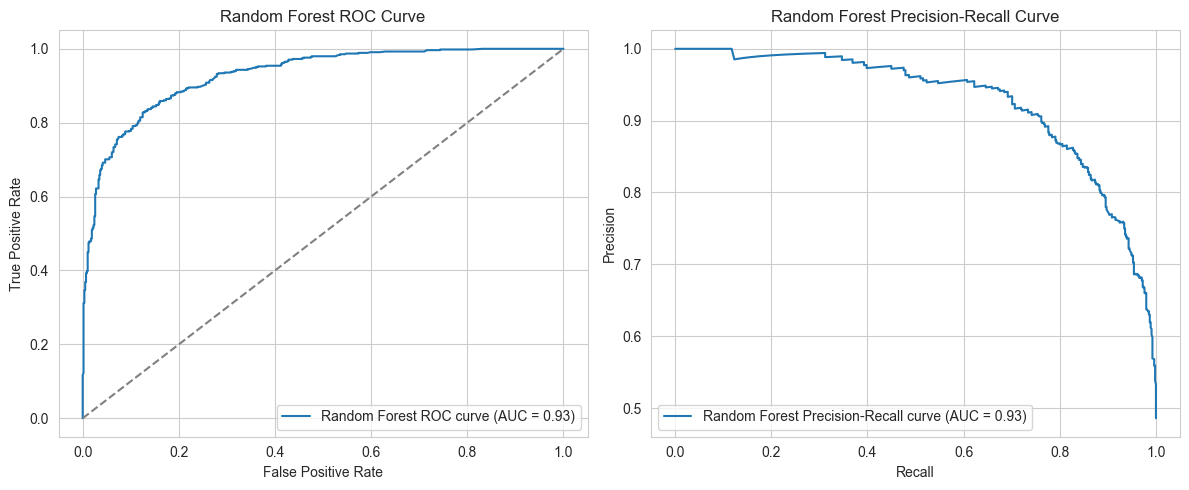

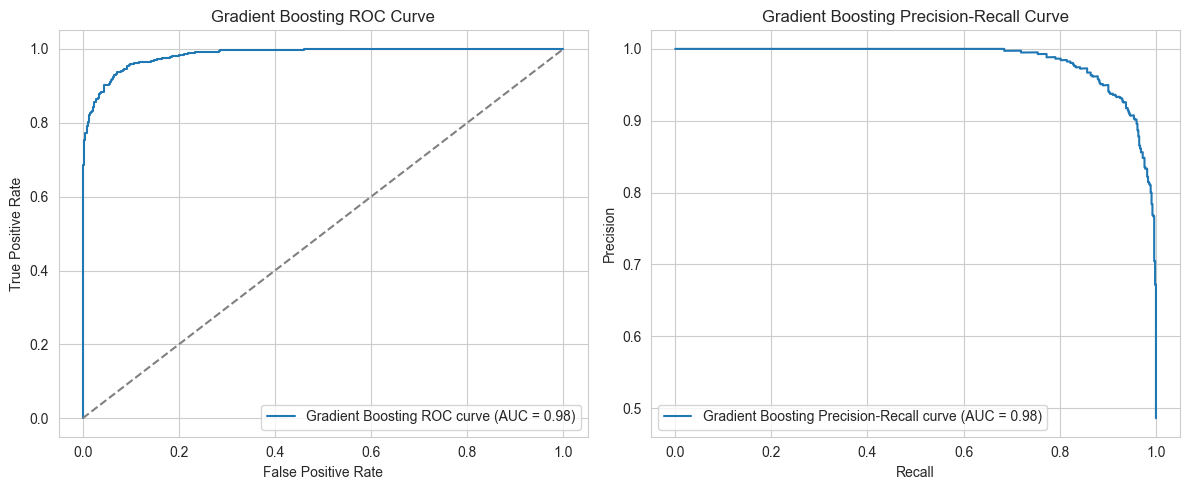

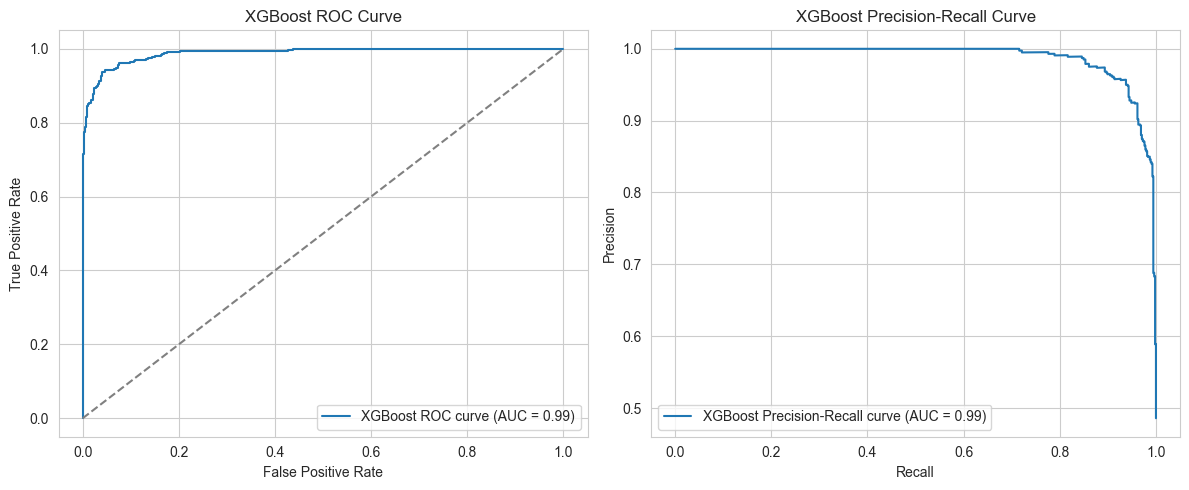

In [ ]:
# Define a function to plot ROC curve and Precision-Recall curve

def plot_roc_and_pr_curves(model, X_test, y_test, classifier_name):
    plt.figure(figsize=(12, 5))

    # ROC curve
    plt.subplot(1, 2, 1)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label='{} ROC curve (AUC = {:.2f})'.format(classifier_name, auc_score))
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC Curve'.format(classifier_name))
    plt.legend()

    # Precision-Recall curve
    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label='{} Precision-Recall curve (AUC = {:.2f})'.format(classifier_name, pr_auc))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('{} Precision-Recall Curve'.format(classifier_name))
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot ROC curve and Precision-Recall curve for Random Forest
plot_roc_and_pr_curves(rf_pipeline, X_test, y_test, "Random Forest")

# Plot ROC curve and Precision-Recall curve for Gradient Boosting
plot_roc_and_pr_curves(gb_pipeline, X_test, y_test, "Gradient Boosting")

# Plot ROC curve and Precision-Recall curve for XGBoost
plot_roc_and_pr_curves(xg_pipeline, X_test, y_test, "XGBoost")

In [ ]:
# Define hyperparameter grids for each model with class weight options and determine best parameters and scores for each model

param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__class_weight': [None, 'balanced', {0: 1, 1: 2}]  # Options: None, 'balanced', or custom
}

param_grid_gb = {
    'model__max_depth': [3, 6, 9],
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 0.9, 1.0]  # Adjust subsample to control for class imbalance
}

param_grid_xg = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__scale_pos_weight': [1, 2]  # For XGBoost, scale_pos_weight is used for class imbalance
}

#roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True, average='weighted')

# Perform grid search for each model
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_xg = GridSearchCV(xg_pipeline, param_grid_xg, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search objects
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)
grid_search_xg.fit(X_train, y_train)

# Print the best parameters and score for each model
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Best Score:", grid_search_rf.best_score_)

print("Gradient Boosting Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting Best Score:", grid_search_gb.best_score_)

print("XGBoost Best Parameters:", grid_search_xg.best_params_)
print("XGBoost Best Score:", grid_search_xg.best_score_)

Random Forest Best Parameters: {'model__class_weight': None, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_split': 2, 'model__n_estimators': 50}
Random Forest Best Score: 0.9298127904736321
Gradient Boosting Best Parameters: {'model__learning_rate': 0.2, 'model__max_depth': 9, 'model__n_estimators': 200, 'model__subsample': 0.8}
Gradient Boosting Best Score: 0.983695418242897
XGBoost Best Parameters: {'model__learning_rate': 0.2, 'model__n_estimators': 200, 'model__scale_pos_weight': 1}
XGBoost Best Score: 0.9319465081723626


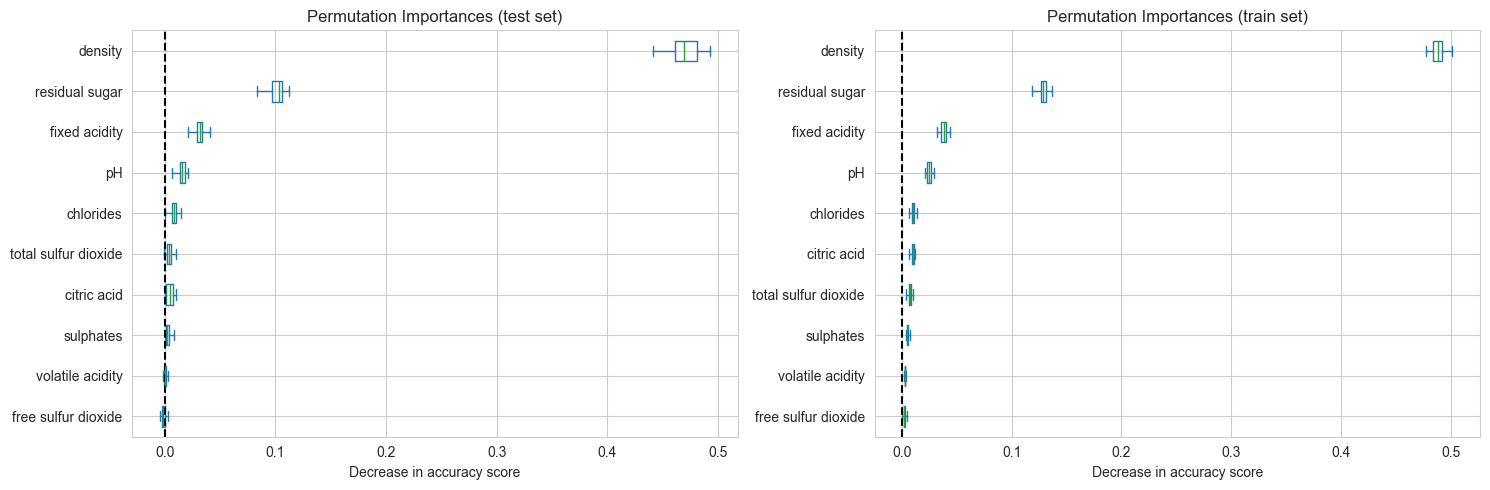

In [ ]:
# Determine Feature Importance using Permutation Importance using Gradient Boosting Classifier since the model had the best performance
# Plot the permutation importance

y = df_white_prepped['Body_Type']
X = df_white_prepped.drop(['quality_good_bad', 'Sweetness', 'Body_Type', 'alcohol'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# Identify columns in df_transformed dataframe, excluding 'income_binary'
cols = [col for col in df_white_prepped.columns if col not in ['quality_good_bad', 'Sweetness', 'Body_Type', 'alcohol']]


#define and scale the preprocessing for numerical cols
transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

#Combine preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('col', transformer, cols)])

# Pipeline for Gradient Boosting Classifier
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', GradientBoostingClassifier(random_state=42))])

#calculate permutation importance for test data
gb = gb_pipeline.fit(X_train, y_train)
result_test = permutation_importance(
    gb, X_test, y_test, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_test = result_test.importances_mean.argsort()
importances_test = pd.DataFrame(
    result_test.importances[sorted_importances_idx_test].T,
    columns=X.columns[sorted_importances_idx_test],
)

#calculate permutation importance for training data
result_train = permutation_importance(
    gb, X_train, y_train, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_train = result_train.importances_mean.argsort()
importances_train = pd.DataFrame(
    result_train.importances[sorted_importances_idx_train].T,
    columns=X.columns[sorted_importances_idx_train],
)

f, axs = plt.subplots(1,2,figsize=(15,5))

importances_test.plot.box(vert=False, whis=10, ax = axs[0])
axs[0].set_title("Permutation Importances (test set)")
axs[0].axvline(x=0, color="k", linestyle="--")
axs[0].set_xlabel("Decrease in accuracy score")
axs[0].figure.tight_layout()

importances_train.plot.box(vert=False, whis=10, ax = axs[1])
axs[1].set_title("Permutation Importances (train set)")
axs[1].axvline(x=0, color="k", linestyle="--")
axs[1].set_xlabel("Decrease in accuracy score")
axs[1].figure.tight_layout()

##Goal 3: Classify Wine by Quality - Good and Bad

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
np.random.seed(42)
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score, classification_report, ConfusionMatrixDisplay,confusion_matrix,roc_curve,roc_auc_score,auc, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.inspection import permutation_importance

In [ ]:
df_white_prepped.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       6.632184          0.267289     0.359635       20.417174   0.028252   
1       5.988222          0.297352     0.339628        1.596665   0.032264   
2       7.639527          0.277309     0.399650        6.843696   0.033267   
3       6.815739          0.227214     0.319621        8.422282   0.041293   
4       6.815739          0.227214     0.319621        8.422282   0.041293   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            47.467170            172.649166  1.000891  2.997981   0.459033   
1            14.491167            133.935240  0.993905  3.297588   0.498518   
2            31.431172             98.314114  0.995003  3.257642   0.449156   
3            49.613373            188.959785  0.995502  3.187735   0.409625   
4            49.613373            188.959785  0.995502  3.187735   0.409625   

    alcohol  Sweetness  Body_Type  quality_good_bad  
0  7.539358          1          0                 1  
1  8.087900          0          0                 1  
2  8.554996          1          0                 1  
3  8.399602          1          0                 1  
4  8.399602          1          0                 1

In [ ]:
# Set up Train and Test for quality classification to determine if the target label is balanced or not

y = df_white_prepped['quality_good_bad']
X = df_white_prepped.drop(['quality_good_bad', 'Sweetness', 'Body_Type'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

# how imbalanced the data is
print(np.bincount(y_train),np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[1075 2290] [358 764]
(3365, 11)
(1122, 11)
(3365,)
(1122,)


In [ ]:
#Setting up Pipeline Transformer and Preprocessor

# Identify columns in df_transformed dataframe, excluding 'income_binary'
cols = [col for col in df_white_prepped.columns if col not in ['quality_good_bad', 'Sweetness', 'Body_Type']]

# Define and scale the preprocessing for numerical columns
transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', transformer, cols)])

In [ ]:
#Setting up Pipeline and fitting the pipeline

# Pipeline for Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), #Added multiple parameters to prevent overfitting
                              ('model', RandomForestClassifier(max_depth=2, n_estimators=30,
                              min_samples_split=3, max_leaf_nodes=5, random_state=42))])

# Pipeline for Gradient Boosting Classifier
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', GradientBoostingClassifier(random_state=42))])

# Pipeline for XGBoost Classifier
xg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), #Added multiple parameters to prevent overfitting
                              ('model', XGBClassifier(objective='multi:softmax', num_class=3,
                                                      max_depth=3, eta=0.3, subsample=0.8,
                                                      colsample_bytree=0.8, gamma=0.1,
                                                      reg_lambda=1, reg_alpha=0))])

# Train the Random Forest model
rf_pipeline.fit(X_train, y_train)

# Train the Decision Tree model
gb_pipeline.fit(X_train, y_train)

# Train the KNeighbors model
xg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsampl...
                               eval_metric=None, feature_types=None, gamma=0.1,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, num_class=3, ...))])

In [ ]:
# Predictions with Random Forest
rf_train_pred=rf_pipeline.predict(X_train)
rf_preds = rf_pipeline.predict(X_test)

# Predictions with Decision Tree
gb_train_pred=gb_pipeline.predict(X_train)
gb_preds = gb_pipeline.predict(X_test)

# Predictions with KNeighbors
xg_train_pred=xg_pipeline.predict(X_train)
xg_preds = xg_pipeline.predict(X_test)

# Calculate train accuracy
train_accuracy_rf = accuracy_score(y_train, rf_train_pred)
accuracy_rf = accuracy_score(y_test,rf_preds)
train_accuracy_gb = accuracy_score(y_train, gb_train_pred)
accuracy_gb = accuracy_score(y_test,gb_preds)
train_accuracy_xg = accuracy_score(y_train, xg_train_pred)
accuracy_xg = accuracy_score(y_test,xg_preds)

# Define the scorers
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'auc': make_scorer(roc_auc_score),
    'precision': make_scorer(precision_score),
    'train_accuracy': make_scorer(accuracy_score, greater_is_better=True)
}

# Suppress warnings
warnings.filterwarnings("ignore")

# Evaluate Random Forest pipeline performance using cross-validation
cv_results_rf = cross_validate(rf_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Evaluate Gradient Boosting pipeline performance using cross-validation
cv_results_gb = cross_validate(gb_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Evaluate XG Boost pipeline performance using cross-validation
cv_results_xg = cross_validate(xg_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Print mean cross-validated scores for Random Forest
print("Random Forest:")
print("Mean Cross-Validation Accuracy:", cv_results_rf['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_rf)
print("Mean Cross-Validation AUC:", cv_results_rf['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_rf['test_precision'].mean())

# Print mean cross-validated scores for Gradient Boosting
print("\nGradient Boosting:")
print("Mean Cross-Validation Accuracy:", cv_results_gb['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_gb)
print("Mean Cross-Validation AUC:", cv_results_gb['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_gb['test_precision'].mean())

# Print mean cross-validated scores for XGBoost
print("\nXGBoost:")
print("Mean Cross-Validation Accuracy:", cv_results_xg['test_accuracy'].mean())
print("Train Accuracy:", train_accuracy_xg)
print("Mean Cross-Validation AUC:", cv_results_xg['test_auc'].mean())
print("Mean Cross-Validation Precision:", cv_results_xg['test_precision'].mean())

Random Forest:
Mean Cross-Validation Accuracy: 0.7049111558570015
Train Accuracy: 0.7156017830609213
Mean Cross-Validation AUC: 0.5445914030179221
Mean Cross-Validation Precision: 0.7007901404583664

Gradient Boosting:
Mean Cross-Validation Accuracy: 0.7848629362724318
Train Accuracy: 0.8315007429420506
Mean Cross-Validation AUC: 0.7267092389291712
Mean Cross-Validation Precision: 0.8133930240390874

XGBoost:
Mean Cross-Validation Accuracy: 0.7946552211389007
Train Accuracy: 0.8903417533432392
Mean Cross-Validation AUC: 0.7457515406276782
Mean Cross-Validation Precision: 0.828572363305544


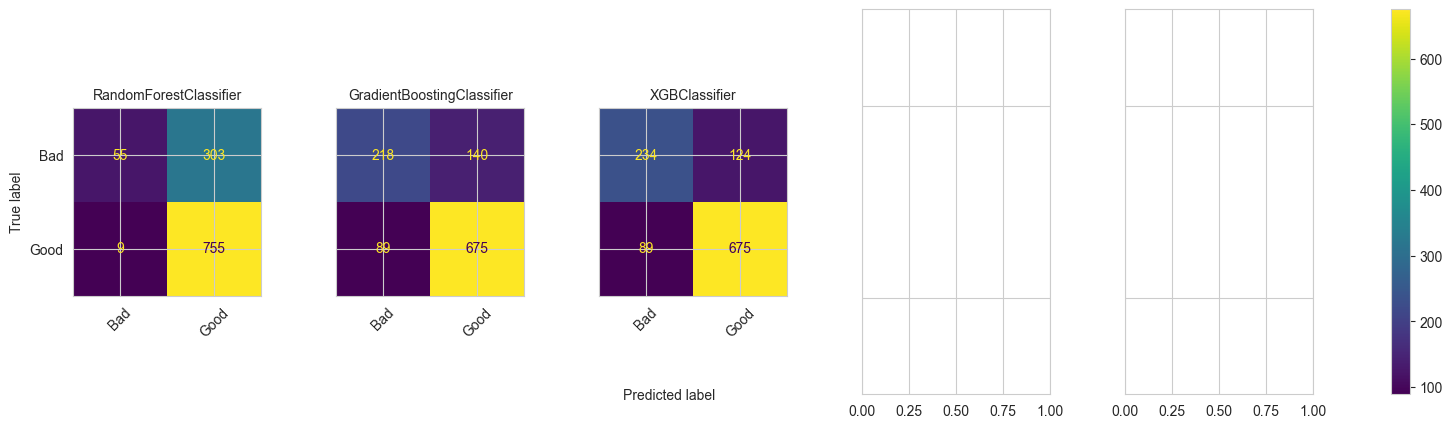

In [ ]:
#Plotting Confusion Matrices

# creating a class list
Class_cat = ['Bad','Good']

classifiers = {
    "RandomForestClassifier": RandomForestClassifier(max_depth=2, n_estimators=30,
                              min_samples_split=3, max_leaf_nodes=5, random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(objective='multi:softmax', num_class=3,
                                                      max_depth=3, eta=0.3, subsample=0.8,
                                                      colsample_bytree=0.8, gamma=0.1,
                                                      reg_lambda=1, reg_alpha=0),
}

f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=Class_cat)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key, fontsize=10)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.4)


f.colorbar(disp.im_, ax=axes)
plt.show()

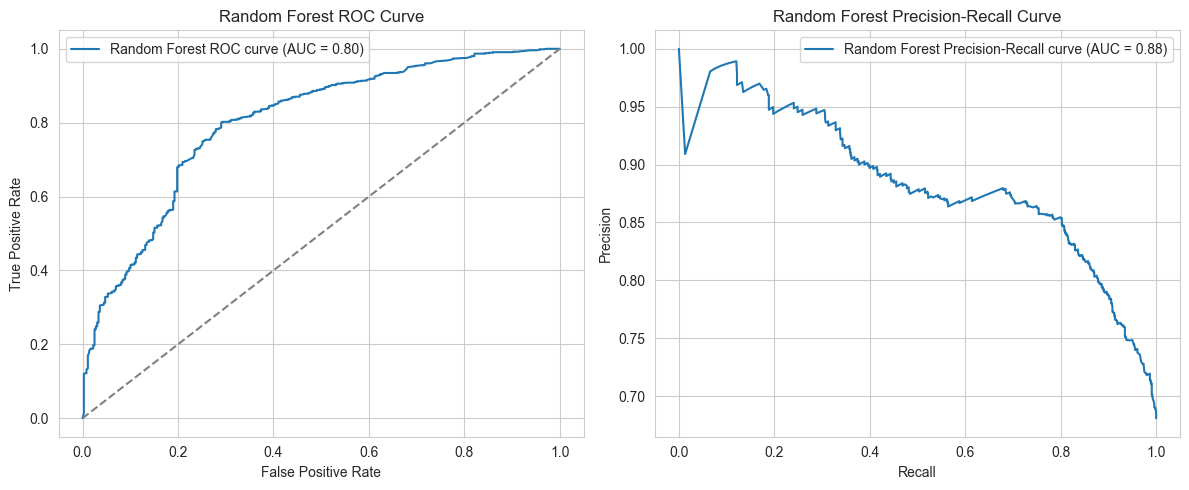

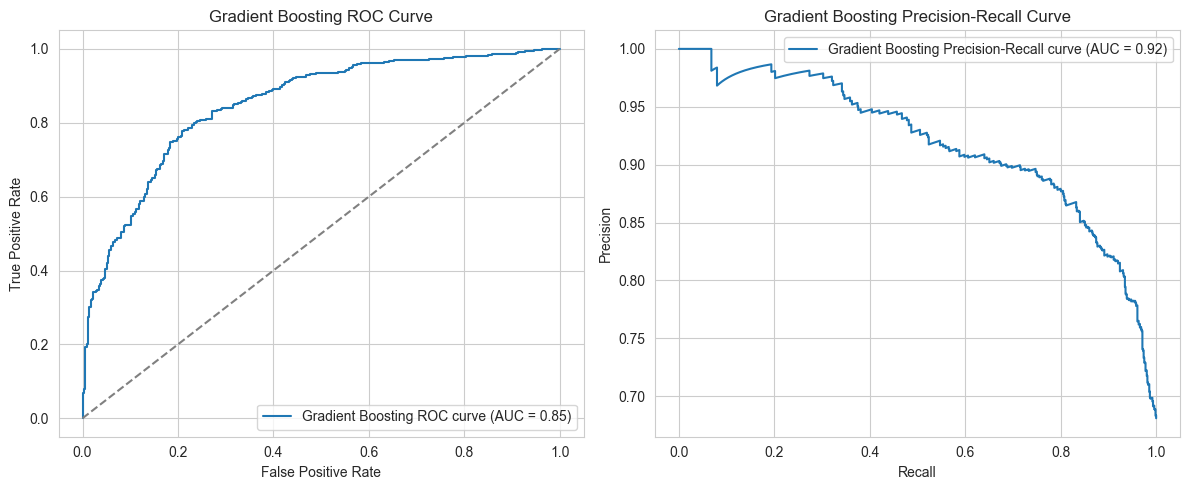

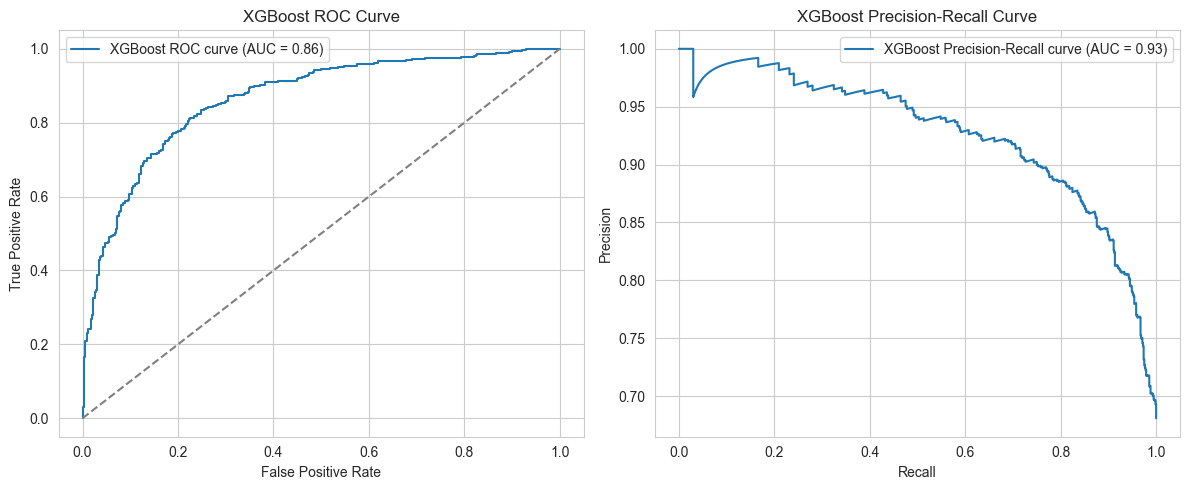

In [ ]:
# Define a function to plot ROC curve and Precision-Recall curve

def plot_roc_and_pr_curves(model, X_test, y_test, classifier_name):
    plt.figure(figsize=(12, 5))

    # ROC curve
    plt.subplot(1, 2, 1)
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label='{} ROC curve (AUC = {:.2f})'.format(classifier_name, auc_score))
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC Curve'.format(classifier_name))
    plt.legend()

    # Precision-Recall curve
    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label='{} Precision-Recall curve (AUC = {:.2f})'.format(classifier_name, pr_auc))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('{} Precision-Recall Curve'.format(classifier_name))
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot ROC curve and Precision-Recall curve for Random Forest
plot_roc_and_pr_curves(rf_pipeline, X_test, y_test, "Random Forest")

# Plot ROC curve and Precision-Recall curve for Gradient Boosting
plot_roc_and_pr_curves(gb_pipeline, X_test, y_test, "Gradient Boosting")

# Plot ROC curve and Precision-Recall curve for XGBoost
plot_roc_and_pr_curves(xg_pipeline, X_test, y_test, "XGBoost")

In [ ]:
# Define hyperparameter grids for each model with class weight options and determine best parameters and scores for each model

param_grid_rf = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__class_weight': [None, 'balanced', {0: 1, 1: 2}]  # Options: None, 'balanced', or custom
}

param_grid_gb = {
    'model__max_depth': [3, 6, 9],
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 0.9, 1.0]  # Adjust subsample to control for class imbalance
}

param_grid_xg = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__scale_pos_weight': [1, 2]  # For XGBoost, scale_pos_weight is used for class imbalance
}

#roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True, average='weighted')

# Perform grid search for each model
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_xg = GridSearchCV(xg_pipeline, param_grid_xg, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search objects
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)
grid_search_xg.fit(X_train, y_train)

# Print the best parameters and score for each model
print("Random Forest Best Parameters:", grid_search_rf.best_params_)
print("Random Forest Best Score:", grid_search_rf.best_score_)

print("Gradient Boosting Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting Best Score:", grid_search_gb.best_score_)

print("XGBoost Best Parameters:", grid_search_xg.best_params_)
print("XGBoost Best Score:", grid_search_xg.best_score_)

Random Forest Best Parameters: {'model__class_weight': None, 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_split': 2, 'model__n_estimators': 100}
Random Forest Best Score: 0.7925307200162486
Gradient Boosting Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 9, 'model__n_estimators': 200, 'model__subsample': 0.8}
Gradient Boosting Best Score: 0.8855245252361124
XGBoost Best Parameters: {'model__learning_rate': 0.2, 'model__n_estimators': 200, 'model__scale_pos_weight': 1}
XGBoost Best Score: 0.8


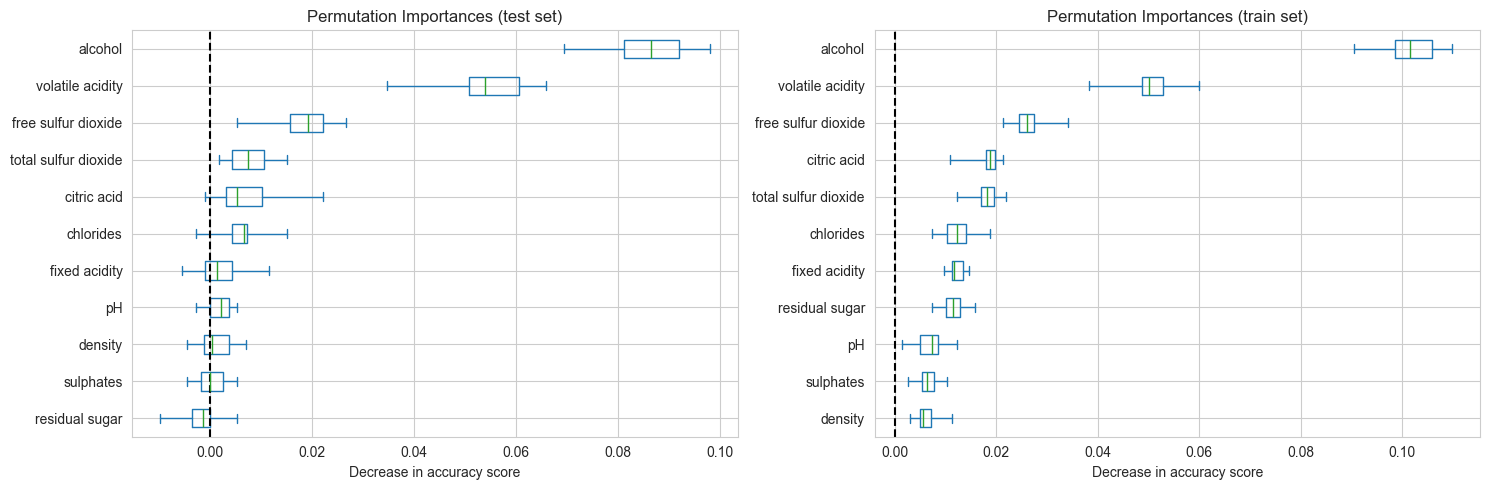

In [ ]:
# Determine Feature Importance using Permutation Importance using Gradient Boosting Classifier since the model had the best performance
# Plot the permutation importance

y = df_white_prepped['quality_good_bad']
X = df_white_prepped.drop(['quality_good_bad', 'Sweetness', 'Body_Type'], axis=1)


# splitting the data into Train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

#identify  cols in df_transformed dataframe, excluding 'income_binary'
cols = [col for col in df_white_prepped.columns if col not in ['quality_good_bad', 'Sweetness', 'Body_Type']]


#define and scale the preprocessing for numerical cols
transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

#Combine preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('col', transformer, cols)])

# Pipeline for Gradient Boosting Classifier
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', GradientBoostingClassifier(random_state=42))])

#calculate permutation importance for test data
gb = gb_pipeline.fit(X_train, y_train)
result_test = permutation_importance(
    gb, X_test, y_test, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_test = result_test.importances_mean.argsort()
importances_test = pd.DataFrame(
    result_test.importances[sorted_importances_idx_test].T,
    columns=X.columns[sorted_importances_idx_test],
)

#calculate permutation importance for training data
result_train = permutation_importance(
    gb, X_train, y_train, n_repeats=20, random_state=42, n_jobs=2
)

sorted_importances_idx_train = result_train.importances_mean.argsort()
importances_train = pd.DataFrame(
    result_train.importances[sorted_importances_idx_train].T,
    columns=X.columns[sorted_importances_idx_train],
)

f, axs = plt.subplots(1,2,figsize=(15,5))

importances_test.plot.box(vert=False, whis=10, ax = axs[0])
axs[0].set_title("Permutation Importances (test set)")
axs[0].axvline(x=0, color="k", linestyle="--")
axs[0].set_xlabel("Decrease in accuracy score")
axs[0].figure.tight_layout()

importances_train.plot.box(vert=False, whis=10, ax = axs[1])
axs[1].set_title("Permutation Importances (train set)")
axs[1].axvline(x=0, color="k", linestyle="--")
axs[1].set_xlabel("Decrease in accuracy score")
axs[1].figure.tight_layout()

##Goal 4: Identify the best predictive features to predict quality of wine

In [ ]:
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [ ]:
# Handling outliers with z_score

from scipy import stats
import numpy as np

print('Data observations before removing outliers:', df_white.shape[0])

# Calculate Z-scores for all columns
z_scores = np.abs(stats.zscore(df_white))

# Create a boolean mask where any element's absolute Z-score is greater than 3
outlier_mask = (z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)

# Apply the mask to filter the DataFrame
df_white_task4 = df_white[~outlier_mask]

print('Data after treating with Z-score:', df_white_task4.shape[0])

Data observations before removing outliers: 4898
Data after treating with Z-score: 4487


Text(0.5, 0.98, 'Data Distribution after Yeo-Johnson Transformation ')

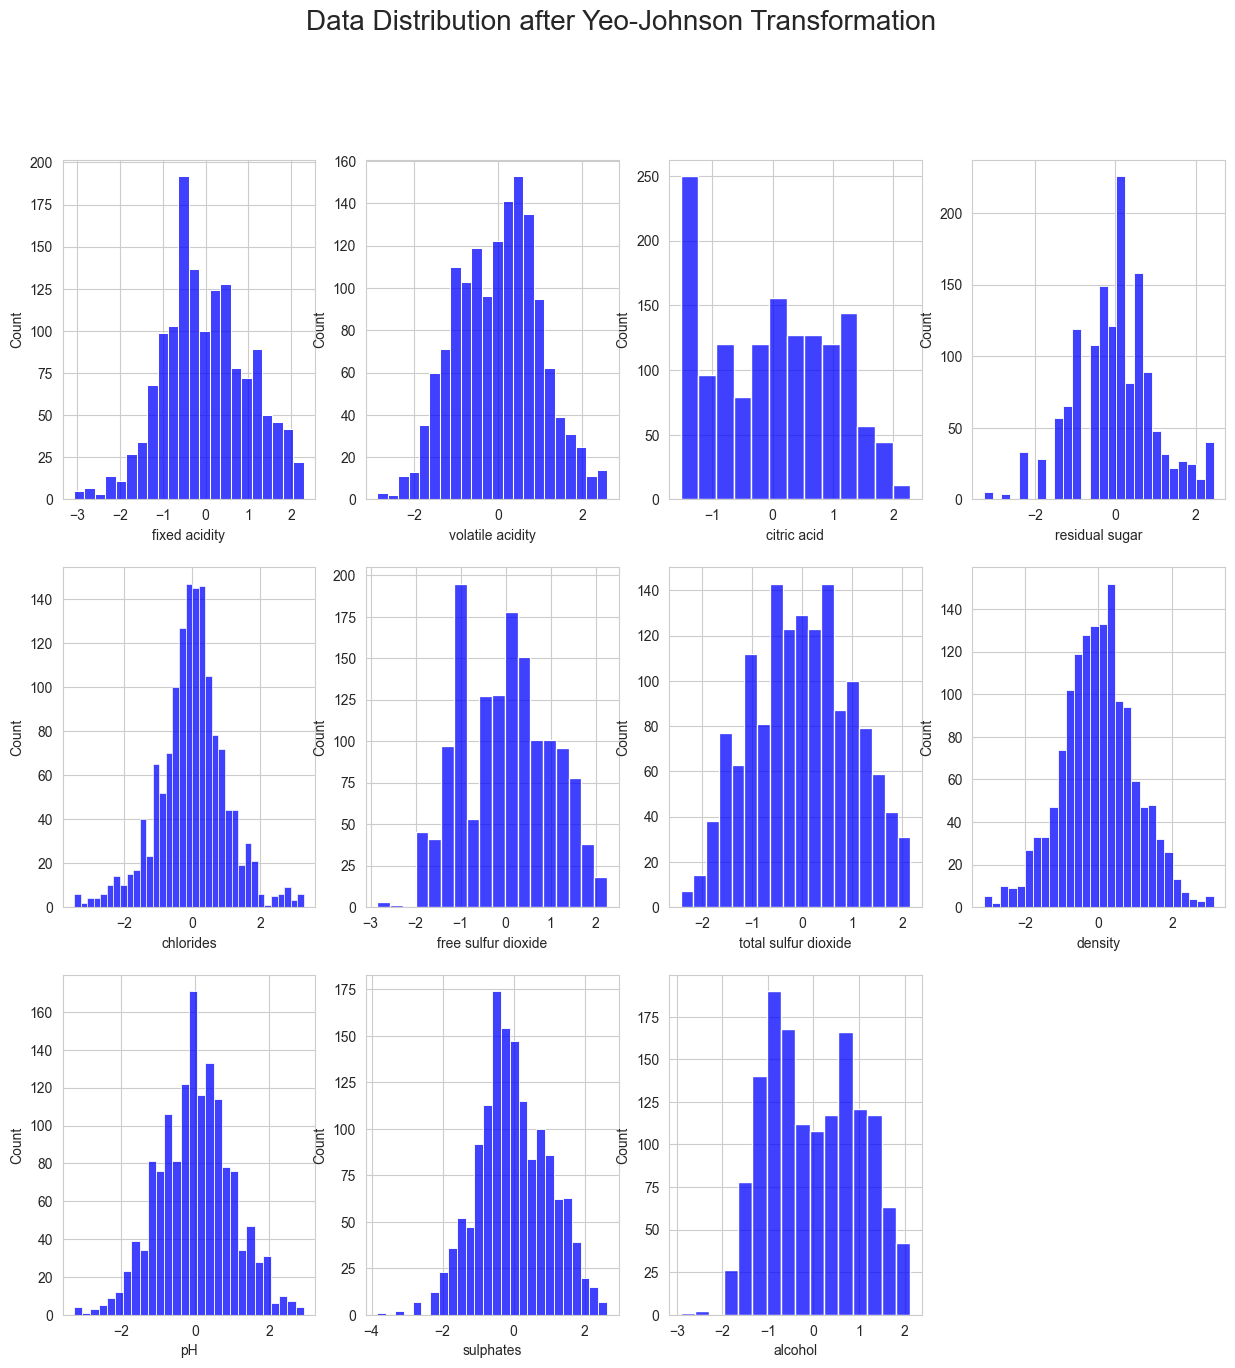

In [ ]:
#Show Yeo-Johnson Transformation distribution to improve skewness in the distribution

df_white_trf = df_white_task4.drop(['quality'], axis=1)

for i in df_white_trf.columns:
  power = PowerTransformer(method='yeo-johnson')
  power.fit(df_white_trf[[i]])
  df_white_trf[i] = power.transform(df_white_trf[[i]]).ravel()

#Check the Histogram Distribution
plt.figure(figsize=(15,15))
for i in range(0, len(no_target)):
  plt.subplot(3, 4, i+1)
  ax = sns.histplot(df_red_trf[no_target[i]], color='blue')
plt.suptitle('Data Distribution after Yeo-Johnson Transformation ', fontsize = 20)

In [ ]:
# Concatenate Data Frames to include Quality and Transformed data

quality = df_white_task4['quality']

# Create a DataFrame for each column
quality_df = pd.DataFrame(quality, columns=['quality'])

# Concatenate the three columns onto the large DataFrame
df_white_task4_prepped = pd.concat([df_white_trf, quality_df], axis=1)

# Show the updated DataFrame
df_white_task4_prepped.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.250030          0.114997     0.377049        1.854122   0.273201   
1      -0.663961          0.462606     0.182344       -1.114841   0.608120   
2       1.543295          0.234428     0.755823        0.418155   0.687947   
3       0.497240         -0.401734    -0.016067        0.677218   1.274984   
4       0.497240         -0.401734    -0.016067        0.677218   1.274984   

   free sulfur dioxide  total sulfur dioxide  density        pH  sulphates  \
0             0.698569              0.802470      0.0 -1.359372  -0.241088   
1            -1.445162             -0.083212      0.0  0.804800   0.162495   
2            -0.232609             -0.980417      0.0  0.541526  -0.347958   
3             0.813457              1.154594      0.0  0.063180  -0.801611   
4             0.813457              1.154594      0.0  0.063180  -0.801611   

    alcohol  quality  
0 -1.639966        6  
1 -0.837897        6  
2 -0.249573        6  
3 -0.436701        6  
4 -0.436701        6

In [ ]:
# Set up Train and Test for quality classification to determine if the target label is balanced or not

y = df_white_task4_prepped['quality']
X = df_white_task4_prepped.drop(['quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# how imbalanced the data is
print(np.bincount(y_train),np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[   0    0    0    0   96  983 1523  645  118] [  0   0   0   0  28 326 515 210  43]
(3365, 11)
(1122, 11)
(3365,)
(1122,)


In [ ]:
#Setting up Pipeline Transformer and Preprocessor

# Identify columns in df_transformed dataframe, excluding 'income_binary'
cols = [col for col in df_white_task4_prepped.columns if col not in ['quality']]

# Define and scale the preprocessing for numerical columns
transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(transformers=[
    ('num', transformer, cols)])

In [ ]:
#Setting up Pipeline and fitting the pipeline

# Pipeline for Linear Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', LinearRegression())])

# Pipeline for Decision Tree Regressor
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', DecisionTreeRegressor(random_state=42))
])

# Train the Linear Regression model
lr_pipeline.fit(X_train, y_train)

# Train the SVM model
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'density', 'pH', 'sulphates',
                                                   'alcohol'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [ ]:
# Predictions with Linear Regression
lr_train_pred = lr_pipeline.predict(X_train)
lr_preds = lr_pipeline.predict(X_test)

# Predictions with SVM
dt_train_pred = dt_pipeline.predict(X_train)
dt_preds = dt_pipeline.predict(X_test)

# Calculate MSE and R^2 score for Linear Regression
mse_lr = mean_squared_error(y_test, lr_preds)
r2_lr = r2_score(y_test, lr_preds)

# Calculate MSE and R^2 score for Decision Tree
mse_dt = mean_squared_error(y_test, dt_preds)
r2_dt = r2_score(y_test, dt_preds)


# Define the scorers
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

# Suppress warnings
warnings.filterwarnings("ignore")

# Evaluate Linear Regression pipeline performance using cross-validation
cv_results_lr = cross_validate(lr_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Evaluate SVM pipeline performance using cross-validation
cv_results_svm = cross_validate(dt_pipeline, X_train, y_train, cv=10, scoring=scoring)

# Print mean cross-validated scores for Linear Regression
print("\nLinear Regression:")
print("MSE:", mse_lr)
print("R^2 Score:", r2_lr)

# Print mean cross-validated scores for Decision Tree
print("\nDecision Tree:")
print("MSE:", mse_dt)
print("R^2 Score:", r2_dt)

#In summary, while interpreting these scores:

#Lower MSE and higher R^2 score indicate better model performance.
#MSE provides a measure of the average prediction error.
#R^2 score provides a measure of how well the features explain the variability in the target variable.


Linear Regression:
MSE: 0.5357350495991193
R^2 Score: 0.2610171302506368

Decision Tree:
MSE: 0.6853832442067737
R^2 Score: 0.05459522004198769


Feature: alcohol, Score: 0.41060
Feature: volatile acidity, Score: -0.15296
Feature: residual sugar, Score: 0.13925
Feature: free sulfur dioxide, Score: 0.11335
Feature: chlorides, Score: -0.07333
Feature: sulphates, Score: 0.04456
Feature: total sulfur dioxide, Score: -0.03766
Feature: pH, Score: 0.03049
Feature: fixed acidity, Score: -0.02755
Feature: citric acid, Score: 0.00743
Feature: density, Score: 0.00000


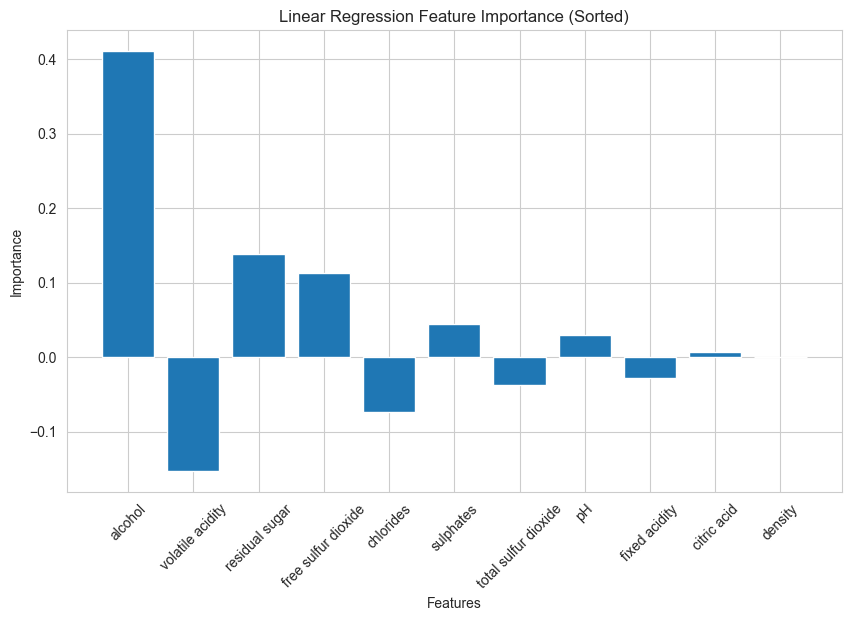

In [ ]:
# Linear Regression Feature Importance for Quality

# define dataset
y = df_white_task4_prepped['quality']
X = df_white_task4_prepped.drop(['quality'], axis=1)

# column Names
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Define the model
model = LinearRegression()
# Fit the model
model.fit(X, y)
# Get coefficients (importance)
importance = model.coef_

# Reverse the feature importance list
feature_importance_reverse = sorted(zip(column_names, importance), key=lambda x: abs(x[1]), reverse=True)

# Summarize Feature Importance in decreasing order
for feature, score in feature_importance_reverse:
    print('Feature: {}, Score: {:.5f}'.format(feature, score))

# Zip column names with importance scores and sort them based on scores
feature_importance = sorted(zip(column_names, importance), key=lambda x: abs(x[1]), reverse=True)
sorted_column_names, sorted_importance = zip(*feature_importance)

# Plot sorted feature importance
plt.figure(figsize=(10, 6))
plt.bar(sorted_column_names, sorted_importance)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Linear Regression Feature Importance (Sorted)')
plt.show()

Feature: alcohol, Score: 0.26758
Feature: free sulfur dioxide, Score: 0.11762
Feature: volatile acidity, Score: 0.11754
Feature: total sulfur dioxide, Score: 0.08555
Feature: sulphates, Score: 0.08367
Feature: pH, Score: 0.08099
Feature: residual sugar, Score: 0.07639
Feature: chlorides, Score: 0.06697
Feature: fixed acidity, Score: 0.05532
Feature: citric acid, Score: 0.04837
Feature: density, Score: 0.00000


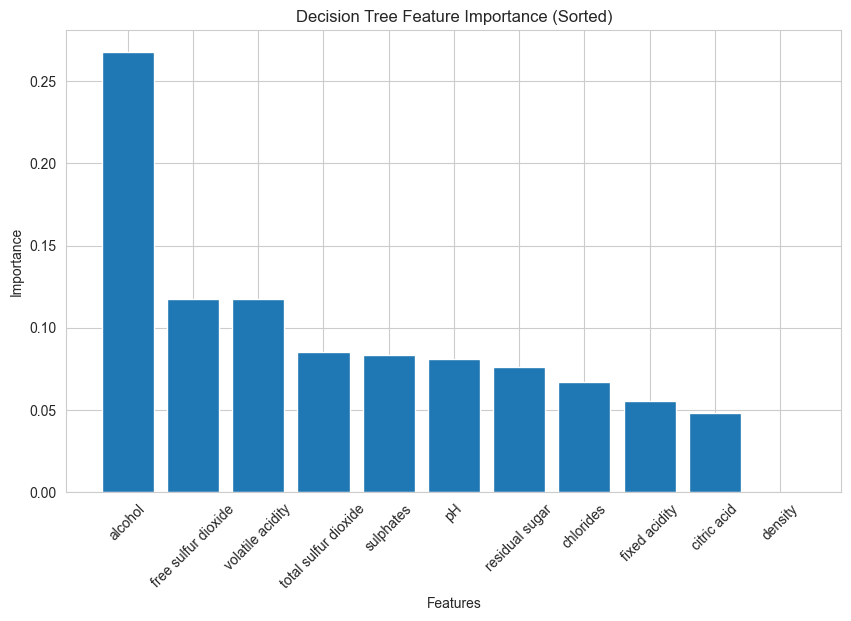

In [ ]:
# Decision Tree Feature Importance for Quality

# define dataset
y = df_white_task4_prepped['quality']
X = df_white_task4_prepped.drop(['quality'], axis=1)

# column names
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# Define the model
model = DecisionTreeRegressor(random_state=42)
# Fit the model
model.fit(X, y)
# Get feature importance
importance = model.feature_importances_

# Reverse the feature importance list
feature_importance_reverse = sorted(zip(column_names, importance), key=lambda x: abs(x[1]), reverse=True)

# Summarize Feature Importance in decreasing order
for feature, score in feature_importance_reverse:
    print('Feature: {}, Score: {:.5f}'.format(feature, score))

# Zip column names with importance scores and sort them based on scores
feature_importance = sorted(zip(column_names, importance), key=lambda x: x[1], reverse=True)
sorted_column_names, sorted_importance = zip(*feature_importance)

# Plot sorted feature importance
plt.figure(figsize=(10, 6))
plt.bar(sorted_column_names, sorted_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Define hyperparameter grids for each model and determine best parameters, scores for each model

# Define hyperparameters for Linear Regression
lr_param_grid = {
    'model__fit_intercept': [True, False],
}

# Define hyperparameters for Decision Tree
dt_param_grid = {
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

# Perform Grid Search with cross-validation for Linear Regression
lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=10, scoring='neg_mean_squared_error')
lr_grid_search.fit(X_train, y_train)

# Perform Grid Search with cross-validation for Decision Tree
dt_grid_search = GridSearchCV(dt_pipeline, dt_param_grid, cv=10, scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train, y_train)

# Get the best parameters and best score for Linear Regression
best_lr_params = lr_grid_search.best_params_
best_lr_score = -lr_grid_search.best_score_

# Get the best parameters and best score for Decision Tree
best_dt_params = dt_grid_search.best_params_
best_dt_score = -dt_grid_search.best_score_

# Print the best parameters and best score for Linear Regression
print("Best Parameters for Linear Regression:", best_lr_params)
print("Best MSE Score:", best_lr_score)

# Print the best parameters and best score for Decision Tree
print("Best Parameters for Decision Tree:", best_dt_params)
print("Best MSE Score:", best_dt_score)

Best Parameters for Linear Regression: {'model__fit_intercept': True}
Best MSE Score: 0.5375149121709308
Best Parameters for Decision Tree: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}
Best MSE Score: 0.5329227962628109


##Results

###Model Evaluation and Comparison

**The table below depicts the overall results of the models before and after hyperparameter tuning by goal:**

**(BT - Before Tuning, AT - After Tuning)**

| Data       | #Train | #Test | Classification | Label | %   | Model Type         | BT-R^2  | BT-MSE  | BT-Accuracy | BT-AUC  | BT-Precision | AT-AUC  | AT-MSE  |
|------------|--------|-------|----------------|-------|-----|---------------------|------|------|----------|------|-----------|------|------|
| Red Wine   |        |       |                |       |     |                     |      |      |          |      |           |      |      |
| Goal 1     | 1088   | 363   | residual sugar <= 2.5 | 0     | 74  | Random Forest       | ---  | ---  | 0.77     | 0.56 | 0.81      | 0.94 | ---  |
|            |        |       | residual sugar > 2.5  | 1     | 26  | Gradient Boosting   | ---  | ---  | 0.85     | 0.75 | 0.79      | 0.99 | ---  |
|            |        |       |                |       |     | XGBoost             | ---  | ---  | 0.86     | 0.79 | 0.75      | 0.96 | ---  |
|            |        |       |                |       |     |                     |      |      |          |      |           |      |      |
| Goal 2     | 1088   | 363   | alcohol < 10   | 0     | 42  | Random Forest       | ---  | ---  | 0.76     | 0.74 | 0.77      | 0.85 | ---  |
|            |        |       | alcohol >= 10  | 1     | 58  | Gradient Boosting   | ---  | ---  | 0.84     | 0.84 | 0.86      | 0.94 | ---  |
|            |        |       |                |       |     | XGBoost             | ---  | ---  | 0.85     | 0.85 | 0.88      | 0.86 | ---  |
|            |        |       |                |       |     |                     |      |      |          |      |           |      |      |
| Goal 3     | 1088   | 363   | quality <= 5   | 0     | 46  | Random Forest       | ---  | ---  | 0.75     | 0.74 | 0.76      | 0.82 | ---  |
|            |        |       | quality > 5    | 1     | 54  | Gradient Boosting   | ---  | ---  | 0.77     | 0.77 | 0.79      | 0.88 | ---  |
|            |        |       |                |       |     | XGBoost             | ---  | ---  | 0.78     | 0.77 | 0.78      | 0.79 | ---  |
|            |        |       |                |       |     |                     |      |      |          |      |           |      |      |
| Goal 4     | 1088   | 363   | Prediction of  | ---   | 100 | Linear Regression   | 0.43 | 0.42 | ---      | ---  | ---       | ---  | 0.37 |
|            |        |       | Quality        |       |     | Decision Tree       | -0.03| 0.67 | ---      | ---  | ---       | ---  | 0.47 |
|            |        |       |                |       |     |                     |      |      |          |      |           |      |      |
| White Wine |        |       |                |       |     |                     |      |      |          |      |           |      |      |
| Goal 1     | 3365   | 1122  | residual sugar <= 2.5 | 0     | 53  | Random Forest       | ---  | ---  | 0.86     | 0.85 | 0.93      | 0.94 | ---  |
|            |        |       | residual sugar > 2.5  | 1     | 47  | Gradient Boosting   | ---  | ---  | 0.94     | 0.94 | 0.95      | 0.99 | ---  |
|            |        |       |                |       |     | XGBoost             | ---  | ---  | 0.96     | 0.96 | 0.96      | 0.96 | ---  |
|            |        |       |                |       |     |                     |      |      |          |      |           |      |      |
| Goal 2     | 3365   | 1122  | alcohol < 10   | 0     | 51  | Random Forest       | ---  | ---  | 0.84     | 0.84 | 0.86      | 0.93 | ---  |
|            |        |       | alcohol >= 10  | 1     | 49  | Gradient Boosting   | ---  | ---  | 0.92     | 0.92 | 0.94      | 0.98 | ---  |
|            |        |       |                |       |     | XGBoost             | ---  | ---  | 0.93     | 0.93 | 0.94      | 0.93 | ---  |
|            |        |       |                |       |     |                     |      |      |          |      |           |      |      |
| Goal 3     | 3365   | 1122  | quality <= 5   | 0     | 32  | Random Forest       | ---  | ---  | 0.79     | 0.54 | 0.7       | 0.79 | ---  |
|            |        |       | quality > 5    | 1     | 68  | Gradient Boosting   | ---  | ---  | 0.78     | 0.73 | 0.81      | 0.89 | ---  |
|            |        |       |                |       |     | XGBoost             | ---  | ---  | 0.8      | 0.75 | 0.83      | 0.81 | ---  |
|            |        |       |                |       |     |                     |      |      |          |      |           |      |      |
| Goal 4     | 3365   | 1122  | Prediction of  | ---   | 100 | Linear Regression   | 0.26 | 0.54 | ---      | ---  | ---       | ---  | 0.53 |
|            |        |       | Quality        |       |     | Decision Tree       | 0.05 | 0.69 | ---      | ---  | ---       | ---  | 0.53 |


**Goal 1 evaluation:**

After removing all outliers, improving the skewness of the distribution to become more normally distributed, creating a new binary classification field for "residual sugar," and split training and testing data, three models were selected for evaluation to predict the sweetness of wine (sweet vs dry). The Random Forest (RF) Classifier, Gradient Boosting (GB) Classifier, and XGBoost (XGB) Classifier were used for both red and white wines. After running the pipeline with each model, the RF and XGB were severely overfitted, so to combat this, we added parameters to reduce the overfitting such as min samples split, num estimators, max depth, max leaf nodes, etc. Introducing these parameters were somewhat successful in reducing the overfitting and the train accuracy was a little closer to the test accuracy.

Here are some obervations of the models (Red Wine):

*   Before tuning, the accuracy, AUC, and Precision were used as scoring metrics and determined that XGB had the highest Accuracy (86%) and AUC (79%), but RF had the highest Precision (81%) of the group.

*   After tuning, the AUC was used as the scoring metric and determined that GB had the highest AUC (99%) followed by XGB (96%). The best scoring parameters were: {'model__learning_rate': 0.2, 'model__max_depth': 9, 'model__n_estimators': 200, 'model__subsample': 0.8}.

*   GB was used to determine feature importance using permutation importance. The best five features that help predict if wine is considered to be sweet or dry are: density, alcohol, total sulfur dioxide, chlorides, and pH.

Here are some obervations of the models (White Wine):

*   Before tuning, the accuracy, AUC, and Precision were used as scoring metrics and it was determined that XGB had the highest Accuracy (96%) and AUC (96%), and Precision (96%).

*   After tuning, the AUC was used as the scoring metric and it was determined that GB had the highest AUC (99%) followed by XGB (96%). The best scoring parameters were: {'model__learning_rate': 0.2, 'model__max_depth': 9, 'model__n_estimators': 200, 'model__subsample': 0.8}.

*   Since GB had the best score, it was used to determine feature importance using permutation importance. The best five features that help predict if wine is considered to be good or bad are: density, alcohol, fixed acidity, pH, and sulphates.

*   Density, followed by alcohol, are the most predictive feature within both datasets in predicting sweet vs dry wines. The main differences between red and white wine features were that red wines rely more on total sulfur dioxide whereas white wine relies more on fixed acidity.


**Goal 2 evaluation:**

become more normally distributed, creating a new binary classification field for "residual sugar," and split training and testing data, three models were selected for evaluation to predict a light-body or full-body based on alcohol level. The RF Classifier, GB Classifier, and XGB Classifier were used for both red and white wines. After running the pipeline with each model, the RF and XGB were severely overfitted, so to combat this, we added parameters to reduce the overfitting such as min samples split, num estimators, max depth, max leaf nodes, etc. Introducing these parameters were somewhat successful in reducing the overfitting and the train accuracy was a little closer to the test accuracy.

Here are some obervations of the models (Red Wine):

*   Before tuning, the accuracy, AUC, and Precision were used as scoring metrics and determined that XGB had the highest Accuracy (85%) and AUC (77%), but GB had the highest Precision (79%) of the group.

*   After tuning, the AUC was used as the scoring metric and determined that GB had the highest AUC (88%) followed by RF (82%). The best scoring parameters were: {'model__learning_rate': 0.2, 'model__max_depth': 9, 'model__n_estimators': 200, 'model__subsample': 0.9}.

*   GB was used to determine feature importance using permutation importance. The best five features that help predict if wine is considered to be light-bodied or full-bodied are: density, fixed acidity, residual sugar, sulphates, and pH.

Here are some obervations of the models (White Wine):

*   Before tuning, the accuracy, AUC, and Precision were used as scoring metrics and it was determined that XGB had the highest Accuracy (93%) and AUC (93%), and Precision (94%).

*   After tuning, the AUC was used as the scoring metric and it was determined that GB had the highest AUC (98%) followed by XGB (93%). The best scoring parameters were: {'model__learning_rate': 0.2, 'model__max_depth': 9, 'model__n_estimators': 200, 'model__subsample': 0.8}.

*   Since GB had the best score, it was used to determine feature importance using permutation importance. The best five features that help predict if wine is considered to be light or full bodied are: density, residual sugar, pH, and chlorides.

*   Density, followed by residual sugar, are the most predictive feature within both datasets in predicting light vs full bodied wines. The main differences between red and white wine features were that red wines rely more on total sulphates whereas white wine relies more on fixed chlorides.

**Goal 3 evaluation:**

After removing all outliers, improving the skewness of the distribution to become more normally distributed, creating a new binary classification field for "quality," and split training and testing data, three models were selected for evaluation to predict quality of wine (good vs bad). The RF Classifier, GB Classifier, and XGB Classifier were used for both red and white wines. After running the pipeline with each model, the RF and XGB were severely overfitted, so to combat this, we added parameters to reduce the overfitting such as min samples split, num estimators, max depth, max leaf nodes, etc. Introducing these parameters were successful in reducing the overfitting and the train accuracy was similar to the test accuracy.

Here are some obervations of the models (Red Wine):

*   Before tuning, the accuracy, AUC, and Precision were used as scoring metrics and determined that XGB had the highest Accuracy (78%) and AUC (77%), but GB had the highest Precision (79%) of the group.

*   After tuning, the AUC was used as the scoring metric and determined that GB had the highest AUC (88%) followed by RF (82%). The best scoring parameters were: {'model__learning_rate': 0.2, 'model__max_depth': 9, 'model__n_estimators': 200, 'model__subsample': 1.0}.

*   Since GB had the best score, it was used to determine feature importance using permutation importance. The best five features that help predict if wine is considered to be good or bad are: alcohol, sulphates, volatile acidity, total sulfur dioxide and density.

Here are some obervations of the models (White Wine):

*   Before tuning, the accuracy, AUC, and Precision were used as scoring metrics and it was determined that XGB had the highest Accuracy (80%) and AUC (75%), and Precision (83%).

*   After tuning, the AUC was used as the scoring metric and it was determined that GB had the highest AUC (89%) followed by XGB (81%). The best scoring parameters were: {'model__learning_rate': 0.2, 'model__max_depth': 9, model__n_estimators': 200, 'model__subsample': 0.9}.

*   Since GB had the best score, it was used to determine feature importance using permutation importance. The best five features that help predict if wine is considered to be good or bad are: alcohol, volatile acidity, free sulfur dioxide, total sulfur dioxide and citric acid.

*   Alcohol, by far is the most predictive feature within both datasets. The two differences between red and white wine features were that red wines rely more on sulphates and density whereas white wine relies more on free sulfur dioxide and citric acid.

**Goal 4 evaluation:**

After removing all outliers, improving the skewness of the distribution to become more normally distributed, and split training and testing data, two models were selected for evaluation to identify the best features to predict quality of wine. The Linear Regression (LR) and Decision Tree Regressor (DT) were used for both datasets. We ran the data through the pipeline using a standard scaler and had successful results.

Here are some obervations of the models (Red Wine):

*   Before tuning, the R^2 score and Mean Squared Error (MSE) were used as scoring metrics and it was determined that LR had the highest R^2 score (0.43) and lowest MSE (0.42) score indicating better model performance than DT. The higher R^2 score for LR means the features explained the variability much better than DT and the lower MSE score means the LR did a better job at measuring the average prediction error.

*   After tuning, the MSE was used as the scoring metric and it was determined that LR had a much lower MSE (0.37) so LR performed at a better rate. The best scoring parameters were: {'model__fit_intercept': True}, {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}.

*   We used both LR and DT to determine feature importance. According to LR, the best five features that help predict quality of wine are: alcohol (.22), sulphates (.21), volatile acidity (-.13), density (-.12), and fixed acidity (.11). According to DT, the best five features that help predict quality are: alcohol (.28), sulphates (.15), volatile acidity (.10), total sulphur dioxide (.07), and chlorides (.07).

Here are some obervations of the models (White Wine):

*   Before tuning, the R^2 score and Mean Squared Error (MSE) were used as scoring metrics and it was determined that LR had the highest R^2 score (0.26) and lowest MSE (0.54) score indicating better model performance than DT. The higher R^2 score for LR means the features explained the variability much better than DT and the lower MSE score means the LR did a better job at measuring the average prediction error.

*   After tuning, the MSE was used as the scoring metric and it was determined that LR and DT had the same exact MSE (0.53) so both models performed at the same rate. The best scoring parameters were: {'model__fit_intercept': True, 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 4, 'model__min_samples_split': 10}.

*   Since both models had the same score, both were used to determine feature importance. According to LR, the best five features that help predict quality of wine are: alcohol (.41), volatile acidity (-.15), residual sugar (.13), free sulfur dioxide (.11) and chlorides (-.07). According to DT, the best five features that help predict quality are: alcohol (.26), free sulfur dioxide (.11), volatile acidity (.11), total sulphur dioxide (.08), and sulphates (.08).

*   Again, alcohol was by far the most predictive feature within both datasets.  The difference between red and white wine features was that red wines rely more on chlorides whereas white wine relies more on free sulfur dioxide. In both cases, density had absolutely no bearing on quality at all.

##Conclusion

In conclusion, this analysis provides valuable insights into the factors influencing wine characteristics and quality. Gradient Boosting consistently outperformed Random Forest and XGBoost after hyperparameter tuning, indicating its robustness in predicting wine quality. Alcohol content emerged as the most predictive feature across both red and white wines, followed by factors like sulphates, volatile acidity, and residual sugar. These findings can guide winemakers, researchers, and enthusiasts in understanding the physicochemical attributes that contribute to the sweetness, body, and overall quality of red and white wines. Further exploration and refinement of predictive models could lead to more accurate assessments and informed decision-making in the wine industry.

##References

Johnson, Philip, and John Burgee. “Predicting Wine Quality project.” Wikipedia, the free encyclopedia, https://www.kaggle.com/code/rielumboh/predicting-wine-quality-project. Accessed 3 June 2024.

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 2009, 47(4):547-553. ISSN: 0167-9236.